In [1]:
from scipy.stats import chi2
from scipy.stats import gamma
from scipy.stats import norm
from scipy.stats import skewnorm
from scipy.stats import lognorm
from scipy.stats import halfnorm
from scipy.stats import crystalball
from scipy.stats import laplace_asymmetric
from scipy.stats import halfcauchy

In [2]:
def crystalballfit(args, x):
#     df = args
    beta, m, loc, scale = args
#     print(df)
    rv = crystalball(beta = beta, m = m, loc = loc, scale = scale)
    return rv.pdf(x)

In [3]:
def lstsq_crystalballfit(args, x, y):
#     print(args, x, y)
    return crystalballfit(args, x) - y

In [4]:
def laplace_asymmetricfit(args, x):
#     df = args
    kappa, loc, scale, b = args
#     print(df)
    rv = laplace_asymmetric(kappa = kappa, loc = loc, scale = scale)
    return rv.pdf(x) + b

In [5]:
def lstsq_laplace_asymmetricfit(args, x, y):
#     print(args, x, y)
    return laplace_asymmetricfit(args, x) - y

In [6]:
def gammafit(args, x):
#     df = args
    a, loc, scale = args
#     print(df)
    rv = gamma(a = a, loc = loc, scale = scale)
    return rv.pdf(x)

In [7]:
def lstsq_gammafit(args, x, y):
#     print(args, x, y)
    return gammafit(args, x) - y

In [8]:
def skewnormfit(args, x):
#     df = args
    a, loc, scale, b, c, d = args
#     print(df)
    rv = skewnorm(a = a, loc = loc, scale = scale)
    return rv.pdf(x) + b + c*x + d*x*x

In [9]:
def lstsq_skewnormfit(args, x, y):
#     print(args, x, y)
    return skewnormfit(args, x) - y

In [10]:
def lognormfit(args, x):
#     df = args
    s, loc, scale, b, c = args
#     print(df)
    rv = lognorm(s = s, loc = loc, scale = scale)
    return rv.pdf(x) + b + c*x

In [11]:
def lstsq_lognormfit(args, x, y):
#     print(args, x, y)
    return lognormfit(args, x) - y

In [12]:
def normfit(args, x):
#     df = args
    loc, scale, a, b, c = args
#     print(df)
    rv = norm(loc = loc, scale = scale)
    return rv.pdf(x) + a + b*x +c*x*x

In [13]:
def lstsq_normfit(args, x, y):
#     print(args, x, y)
    return normfit(args, x) - y

In [14]:
def normfit2(args, x):
#     df = args
    loc, scale, a, b, c, d = args
#     print(df)
    rv = norm(loc = loc, scale = scale)
    return rv.pdf(x) + a + b*x + c*x*x + d*x*x*x

In [15]:
def lstsq_normfit2(args, x, y):
#     print(args, x, y)
    return normfit2(args, x) - y

In [16]:
def halfnormfit(args, x):
#     df = args
    scale, a, b, c = args
#     print(df)
    rv = halfnorm(scale = scale)
    return rv.pdf(x) + a + b*x + c*x*x

In [17]:
def lstsq_halfnormfit(args, x, y):
#     print(args, x, y)
    return halfnormfit(args, x) - y

In [18]:
def halfnormfit2(args, x):
#     df = args
    scale, a, b = args
#     print(df)
    rv = halfnorm(scale = scale)
    return rv.pdf(x) + a + b*x

In [19]:
def lstsq_halfnormfit2(args, x, y):
#     print(args, x, y)
    return halfnormfit2(args, x) - y

In [20]:
def halfcauchyfit(args, x):
#     df = args
    scale, a, b, c = args
#     print(df)
    rv = halfcauchy(scale = scale)
    return rv.pdf(x) + a + b*x + c*x*x

In [21]:
def lstsq_halfcauchyfit(args, x, y):
#     print(args, x, y)
    return halfcauchyfit(args, x) - y

In [22]:
def probFit(dist, bins, fit, res_lsq):
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    unchist = np.sqrt(dist)/np.sum(dist)/np.diff(bincenters)[0]
    chi2fit = np.sum((hist - fit)**2/unchist**2)
    dof = len(hist) - len(res_lsq.x)
    pvalue = 1-chi2.cdf(chi2fit, dof)
    return pvalue, chi2fit, dof

In [23]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares

In [24]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [25]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}",     # xcolor for colours
		"figure.autolayout": True
}
matplotlib.rcParams.update(pgf_with_latex)

def nphistmean(hist, bins):
    s=0
    for i in range(len(hist)):
        s += hist[i] * ((bins[i] + bins[i+1]) / 2) 
    mean = s / np.sum(hist)
    return mean

In [26]:
def extendedBins(bins, left, right):
    binwidth = np.diff(bins)[0]
    leftbins = bins[0] - (np.linspace(1, left+1, left+1)*binwidth)[::-1]
    rightbins = np.linspace(1, right+1, right +1)*binwidth + bins[-1]
    return np.array([*leftbins, *bins, *rightbins])

In [58]:
parent_epg = "/Volumes/Extreme SSD/nov2021/convPkl_FD/epg/"
epg_3987 = pd.read_pickle(parent_epg + "3987" + "_epg.pkl")
epg_4076 = pd.read_pickle(parent_epg + "4076" + "_epg.pkl")

In [59]:
dvcsSimInb = epg_3987
bkgSimInb = epg_4076

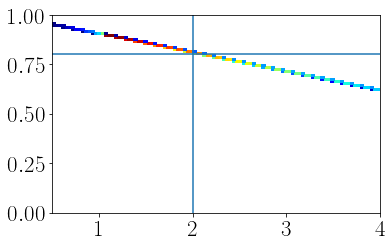

In [29]:
plt.hist2d(dvcsSimInb.Ep, dvcsSimInb.y, bins = [np.linspace(0.5, 4, 101), np.linspace(0,1, 101)], cmap = cmap, cmin =1)
plt.axhline(0.8)
plt.axvline(2)
plt.show()

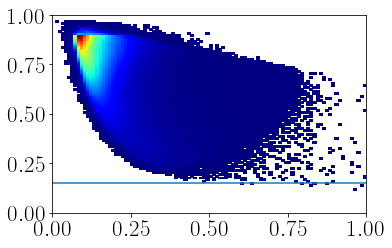

In [82]:
plt.hist2d(dvcsSimInb.xB, dvcsSimInb.y, bins = [np.linspace(0, 1, 101), np.linspace(0,1, 101)], cmap = cmap, cmin =1)
plt.axhline(0.15)
plt.show()

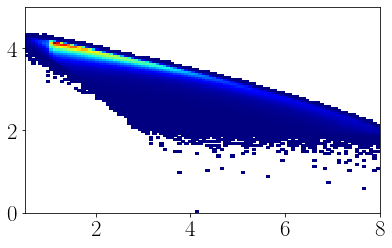

In [37]:
plt.hist2d(dvcsSimInb.Ep, dvcsSimInb.W, bins = [np.linspace(0.5, 8, 101), np.linspace(0,5, 101)], cmap = cmap, cmin =1)
plt.show()

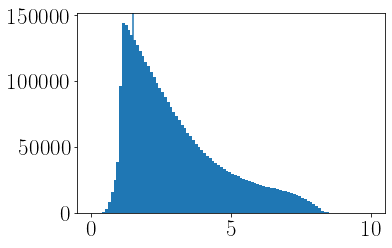

In [55]:
plt.hist(dvcsSimInb.Ep, bins = np.linspace(0, 10, 101))
plt.axvline(1.5)
plt.show()

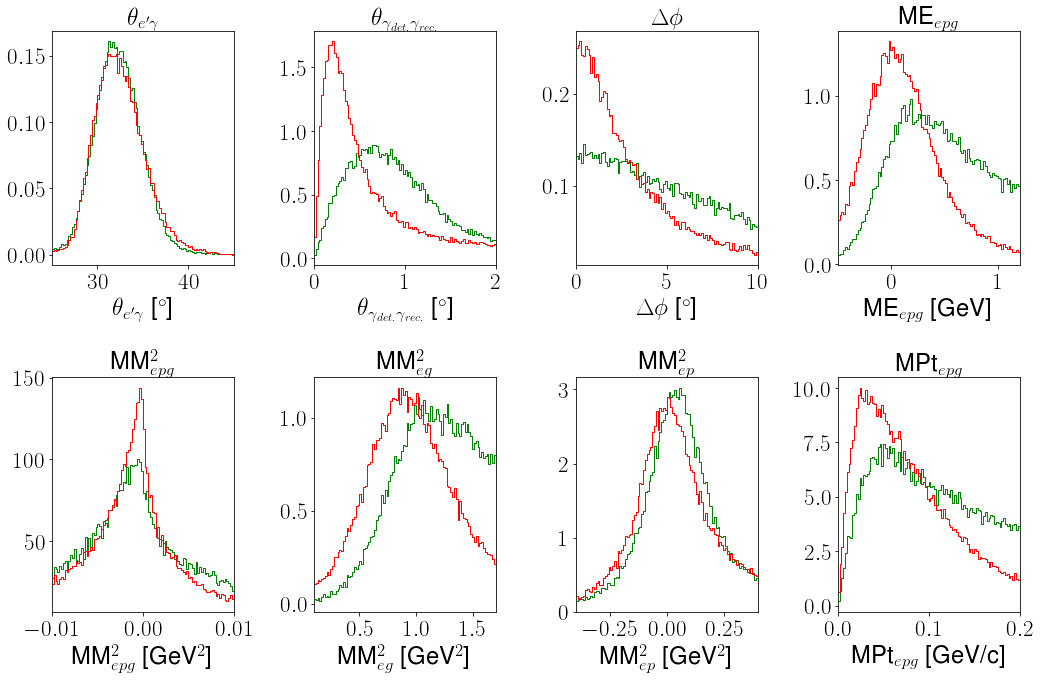

<Figure size 432x288 with 0 Axes>

In [103]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [25, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [45, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

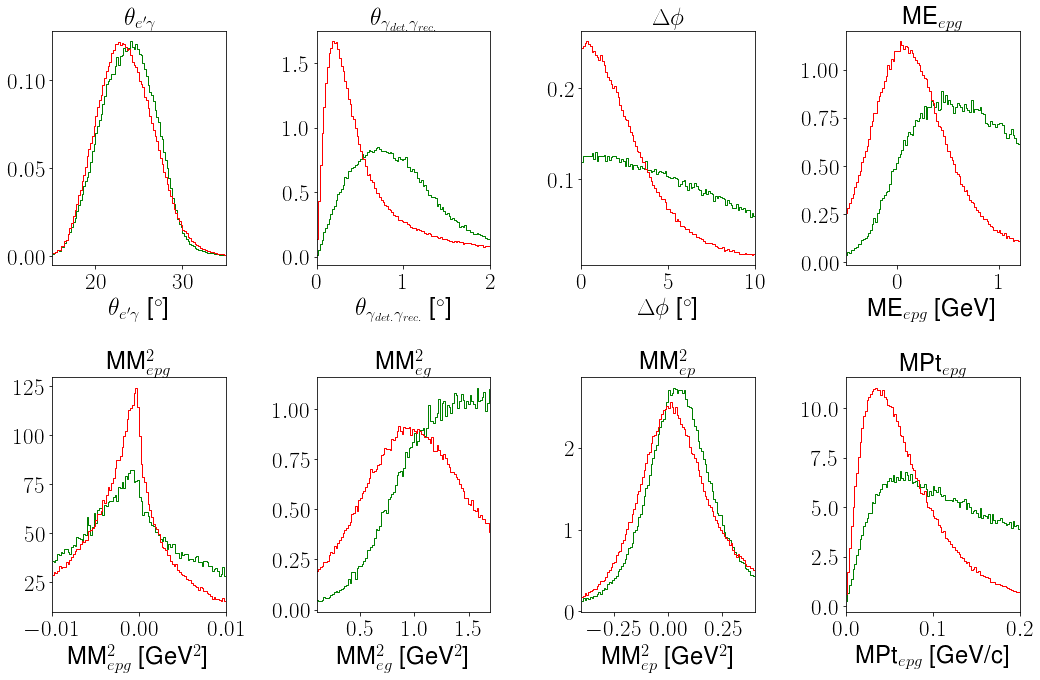

<Figure size 432x288 with 0 Axes>

In [102]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [15, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

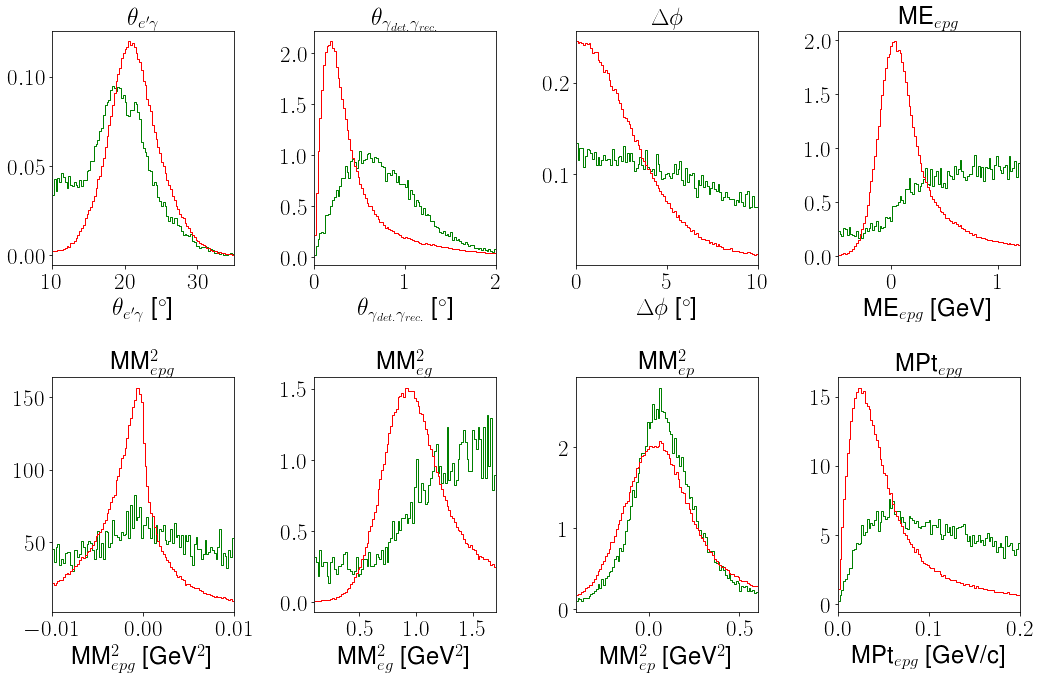

<Figure size 432x288 with 0 Axes>

In [104]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 2, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

## CDFT cuts

In [788]:
dvcsSimInbCDFT = dvcsSimInb.loc[(dvcsSimInb.Ee>2)&(dvcsSimInb.Ge>3)&(dvcsSimInb.Pp>0.25)&(dvcsSimInb.Pp<0.8)&((dvcsSimInb.Psector>7)&(dvcsSimInb.Ptheta<60))& (dvcsSimInb.Gsector>7)]
bkgSimInbCDFT = bkgSimInb.loc[(bkgSimInb.Ee>2)&(bkgSimInb.Ge>3)&(bkgSimInb.Pp>0.25)&(bkgSimInb.Pp<0.8)&((bkgSimInb.Psector>7)&(bkgSimInb.Ptheta<60))& (bkgSimInb.Gsector>7)]

In [789]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimInbCDFT.MM2_ep, bins = np.linspace(-0.4, 0.4, 101))
    else:
        dist, bins = np.histogram(dvcsSimInbCDFT.MM2_ep, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0, 0.3, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf((1-0.95**(1/8))/2, loc = loc, scale = scale)
    ub = norm.ppf((1+0.95**(1/8))/2, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.053471302748551164 118.2287041350321 95
[ 0.03238992  0.17721651 -0.06022477  0.32056273  1.74711956] -0.45088090763321226 0.5156607545951435 0.053471302748551164
0.0 335.37885002774743 95
0.0 447.9551723782748 95
0.0 494.3428220198815 95
0.0 493.2222002896956 95
0.0 493.0220960041932 95
0.0 495.74932177037454 95
0.0 495.8783038875048 95
0.0 497.39688857763053 95
0.0 497.4297870297943 95


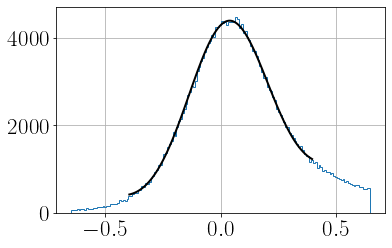

In [793]:
dvcsSimInbCDFT.MM2_ep.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [794]:
loc-3*scale

-0.5257222526125342

In [795]:
loc+3*scale

0.5982702915091644

In [796]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.MM2_ep<0.598)&(dvcsSimInbCDFT.MM2_ep>-0.526)]
bkgSimInbCDFT = bkgSimInbCDFT.loc[(bkgSimInbCDFT.MM2_ep<0.598)&(bkgSimInbCDFT.MM2_ep>-0.526)]

In [800]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimInbCDFT.MM2_eg, bins = np.linspace(0.5, 1.5, 101))
    else:
        dist, bins = np.histogram(dvcsSimInbCDFT.MM2_eg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.908, 0.244, -0.471, 0.526, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.01, loc = loc, scale = scale)
    ub = norm.ppf(0.99, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

[ 0.9114211   0.24204958 -0.2385717   0.00605942  0.26271205] 0.3483295596022573 1.474512631734127 1.8398002277209002e-07


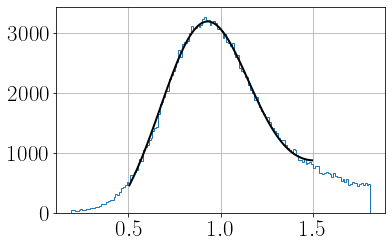

In [801]:
dvcsSimInbCDFT.MM2_eg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
x = np.linspace(0.5, 1.5, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [802]:
print(params_opt[0]-3*params_opt[1], params_opt[0]+3*params_opt[1])

0.1852723424881474 1.637569848848237


In [803]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.MM2_eg<1.638)&(dvcsSimInbCDFT.MM2_eg>0.185)]
bkgSimInbCDFT = bkgSimInbCDFT.loc[(bkgSimInbCDFT.MM2_eg<1.638)&(bkgSimInbCDFT.MM2_eg>0.185)]

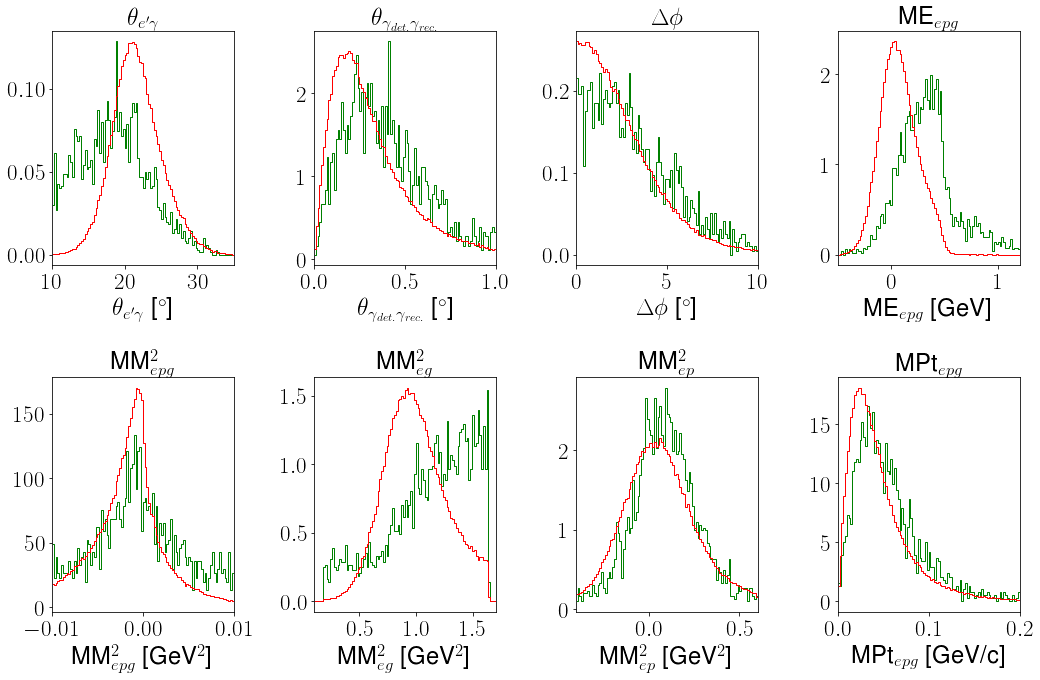

<Figure size 432x288 with 0 Axes>

In [804]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [808]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimInbCDFT.ME_epg, bins = np.linspace(-0.422, 0.466, 101))
    else:
        dist, bins = np.histogram(dvcsSimInbCDFT.ME_epg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.1, 0.14, -0.471, 0.526, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.99, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

[ 0.02224726  0.16195889 -0.01613077  1.16375066  0.18711206] -0.24415141834624354 0.3990199829847006 9.071933426696432e-09
[ 0.02351398  0.15993265 -0.02630568  1.06561266  0.78290211] -0.2395518120080285 0.3955729555881793 0.00019566730945752564
[ 0.02333553  0.15958662 -0.02102951  1.07967988  0.77070783] -0.2391611095388847 0.39458953038249805 0.00022760108640496046
[ 0.02334105  0.15948359 -0.02056058  1.07925618  0.78715433] -0.23898610815095267 0.3943553671044308 0.0010827182390705792


In [809]:
print(params_opt[0]-3*params_opt[1], params_opt[0]+3*params_opt[1])

-0.45510971781394105 0.5017918271171722


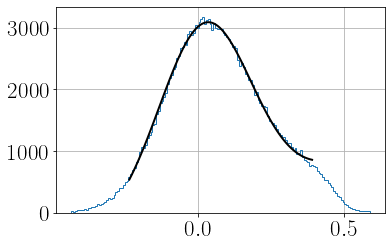

In [810]:
dvcsSimInbCDFT.ME_epg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [812]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.ME_epg<0.502)&(dvcsSimInbCDFT.ME_epg>-0.455)]
bkgSimInbCDFT = bkgSimInbCDFT.loc[(bkgSimInbCDFT.ME_epg<0.502)&(bkgSimInbCDFT.ME_epg>-0.455)]

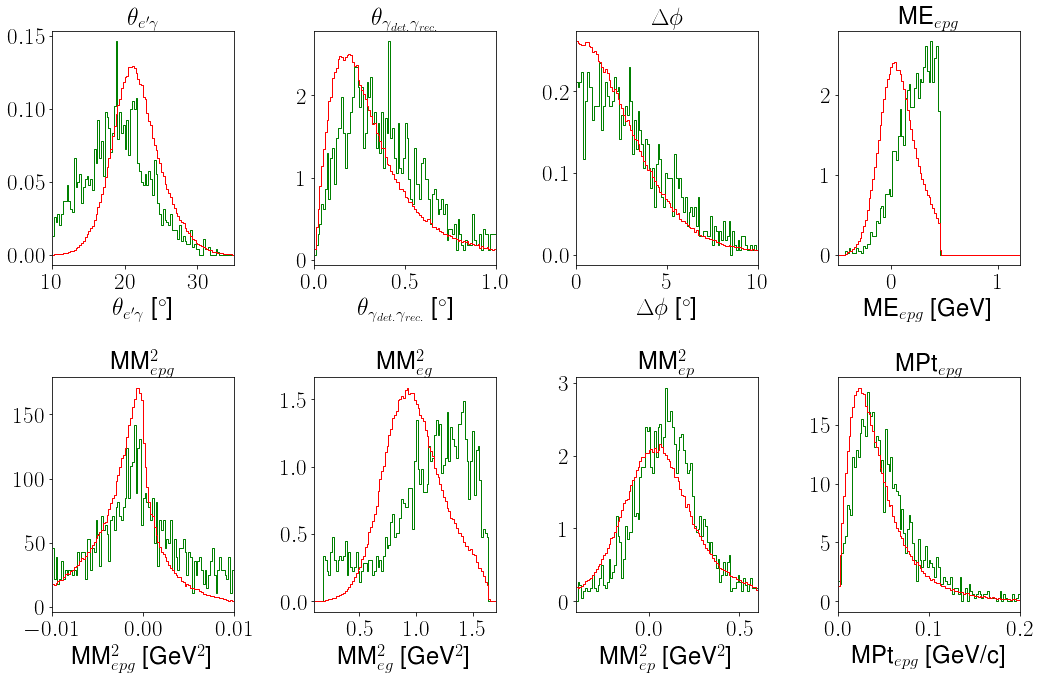

<Figure size 432x288 with 0 Axes>

In [813]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [816]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimInbCDFT.coneAngle, bins = np.linspace(10, 30, 101))
    else:
        dist, bins = np.histogram(dvcsSimInbCDFT.coneAngle, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [20, 5, -0.471, 0.526, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.99, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

[ 2.08976368e+01  2.95345503e+00 -5.47610656e-02  2.95172008e-03
 -1.17321404e-05] 16.039635554688843 27.768400620457516 3.448352714485736e-13
[ 2.09070206e+01  2.91881184e+00 -2.79518748e-02  4.69063703e-04
  4.58865781e-05] 16.106002371500217 27.69719234366719 7.138767355030495e-11
[ 2.09071021e+01  2.90944098e+00 -2.25418961e-02 -4.23730939e-05
  5.82241160e-05] 16.121497513788263 27.675473916791653 6.236459126895966e-10


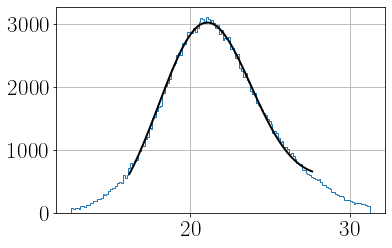

In [817]:
dvcsSimInbCDFT.coneAngle.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [818]:
print(params_opt[0]-3*params_opt[1], params_opt[0]+3*params_opt[1])

12.178779116621584 29.635425021065842


In [819]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.coneAngle<29.635)&(dvcsSimInbCDFT.coneAngle>12.179)]
bkgSimInbCDFT = bkgSimInbCDFT.loc[(bkgSimInbCDFT.coneAngle<29.635)&(bkgSimInbCDFT.coneAngle>12.179)]

In [820]:
len(dvcsSimInbCDFT)

201724

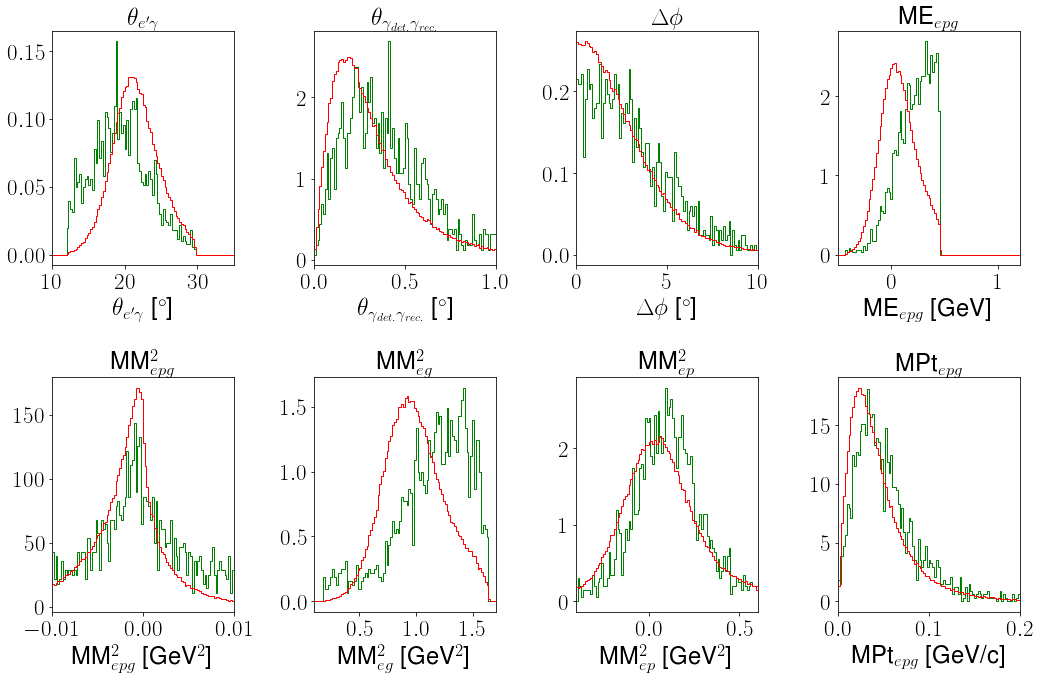

<Figure size 432x288 with 0 Axes>

In [821]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [824]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimInbCDFT.MPt, bins = np.linspace(0.005, 0.15, 101))
        params = [1, 0, 0.03, 0, 0, 0]
    else:
        dist, bins = np.histogram(dvcsSimInbCDFT.MPt, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.002
    ub = loc+3*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 0.002 0.11074253650252915
0.21175128535542287 0.002 0.10266947470638317
[ 3.17357566e+00  6.29197282e-03  3.21258340e-02 -5.19296848e+00
  1.86288920e+02 -1.15590099e+03] 0.002 0.10266947470638317 0.21175128535542287
0.09823031234451463 0.002 0.1006725443251131
0.11032879125216277 0.002 0.10034820295708108
0.18896387572066675 0.002 0.10032326950857769
0.22920889698050972 0.002 0.10030081293475455
[ 3.01246724e+00  6.17592363e-03  3.13749631e-02 -5.61151585e+00
  2.17142608e+02 -1.42762025e+03] 0.002 0.10030081293475455 0.22920889698050972
0.36348129410133634 0.002 0.10032255149656638
[ 3.01476493e+00  6.17773610e-03  3.13816051e-02 -5.60494939e+00
  2.16849866e+02 -1.42522656e+03] 0.002 0.10032255149656638 0.36348129410133634
0.23562403067858895 0.002 0.10030100287275728
0.3522127740999902 0.002 0.10032142118291767
0.2570027287533282 0.002 0.10030512094514915


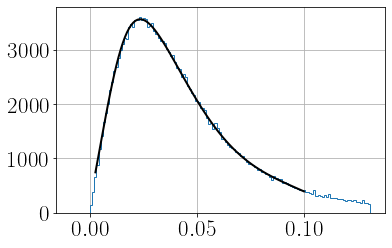

In [825]:
dvcsSimInbCDFT.MPt.hist(bins = extendedBins(bins_opt, 10, 30), histtype = 'step')
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [826]:
skewnorm.ppf(0.9974, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

0.10068198882310014

In [827]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.MPt<0.1)]
bkgSimInbCDFT = bkgSimInbCDFT.loc[(bkgSimInbCDFT.MPt<0.1)]

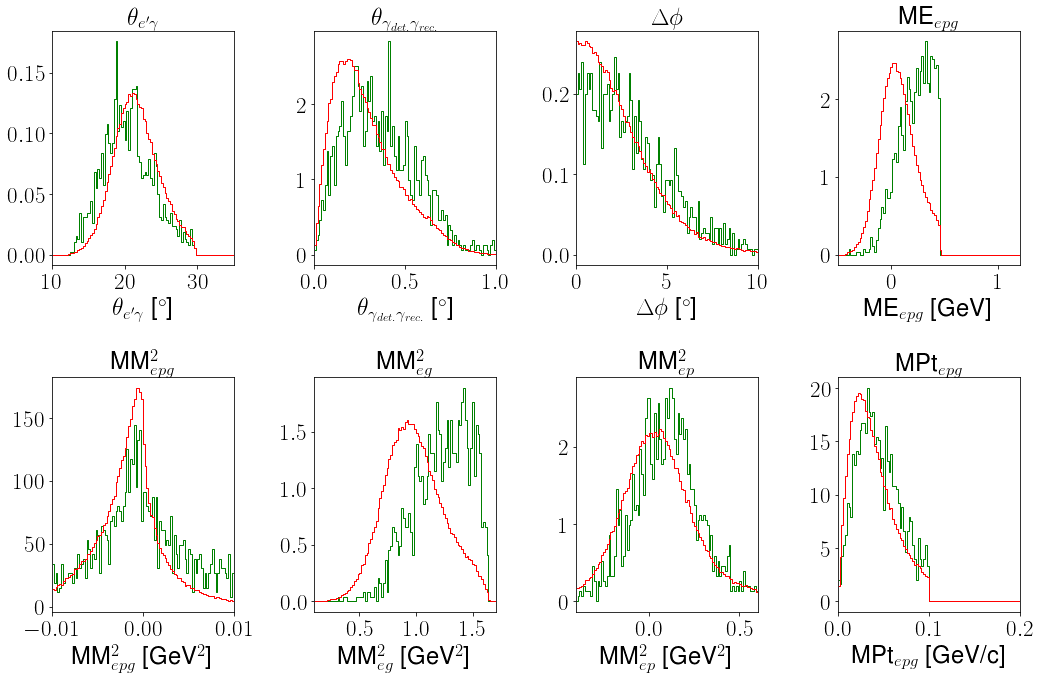

<Figure size 432x288 with 0 Axes>

In [828]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [833]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimInbCDFT.reconGam, bins = np.linspace(0.005, 0.85, 101))
        params = [1, 0.3, 0.03, 0, 0, 0]
    else:
        dist, bins = np.histogram(dvcsSimInbCDFT.reconGam, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.005
    ub = skewnorm.ppf(0.99, a = a, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(lb, ub, pvalue)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.005 0.6317723248746112 0.0
0.005 0.5873261807321344 0.06382516247412007
[ 2.70381809  0.03679911  0.21372809 -1.08167968  6.55175266 -6.67632331] 0.005 0.5873261807321344 0.06382516247412007
0.005 0.5661085164475 0.49656662347541713
[ 2.47518698  0.03455587  0.20636175 -1.20802693  7.89170799 -8.54373299] 0.005 0.5661085164475 0.49656662347541713
0.005 0.5561084533590576 0.4439228161156824
0.005 0.5514518307013536 0.28513777204211566
0.005 0.5514730956760026 0.3435087240121797
0.005 0.551377636931594 0.3053703737546124
0.005 0.5513930832202372 0.29771187482246275
0.005 0.5514072101499863 0.31707005996022986
0.005 0.5514768936278875 0.31485920556623226


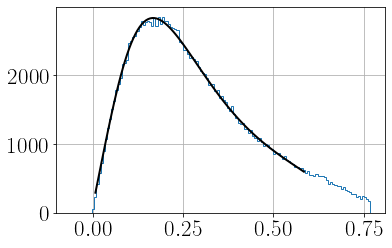

In [834]:
dvcsSimInbCDFT.loc[:, "reconGam"].hist(bins = extendedBins(bins_opt, 10, 30), histtype = 'step')
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [835]:
skewnorm.ppf(0.9974, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

0.6560047416928201

In [836]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[dvcsSimInbCDFT.reconGam<0.656]
bkgSimInbCDFT = bkgSimInbCDFT.loc[bkgSimInbCDFT.reconGam<0.656]

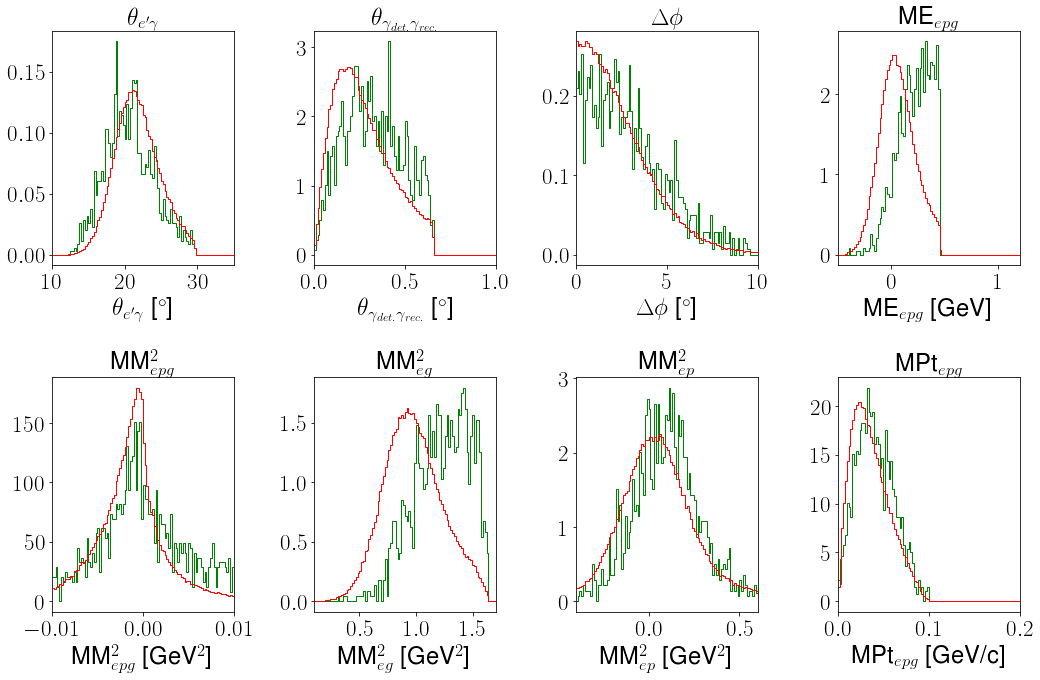

<Figure size 432x288 with 0 Axes>

In [837]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [838]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimInbCDFT.coplanarity, bins = np.linspace(0, 10, 101))
        params = [3, 0, 0, 0]
    else:
        dist, bins = np.histogram(dvcsSimInbCDFT.coplanarity, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_halfnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    scale, a, b, c = params
    lb = 0
    ub = 3*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  halfnormfit(res_lsq.x, bincenters), res_lsq)
    print(lb, ub, pvalue)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0 8.429317529175309 0.0020600254069472745
[ 2.80977251e+00 -2.01988261e-02  7.67005903e-03 -5.43441678e-04] 0 8.429317529175309 0.0020600254069472745
0 8.483664326757422 2.8648813599985168e-05
0 8.494368886806114 4.2801678833970236e-05
0 8.49518433505954 0.0003855871970833702
0 8.49232115654045 0.00039837261276187697
0 8.496469714192019 0.00015984688574077754
0 8.49054415043863 0.0002916499343997847
0 8.496624744892218 8.38484527647676e-05
0 8.489925504947333 0.0002587530276381145
0 8.495962275991973 6.48352008773001e-05


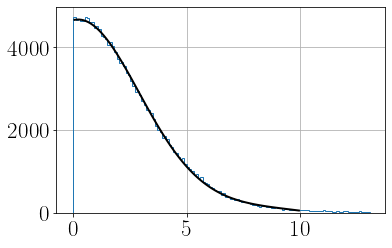

In [839]:
dvcsSimInbCDFT.coplanarity.hist(bins = extendedBins(bins_opt, 0, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.04, 0.04, 100)
# plt.plot(bincenters, crystalballfit(res_lsq.x, bincenters), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, halfnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [840]:
3*scale

8.495962275991973

In [841]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[dvcsSimInbCDFT.coplanarity<8.496]
bkgSimInbCDFT = bkgSimInbCDFT.loc[bkgSimInbCDFT.coplanarity<8.496]

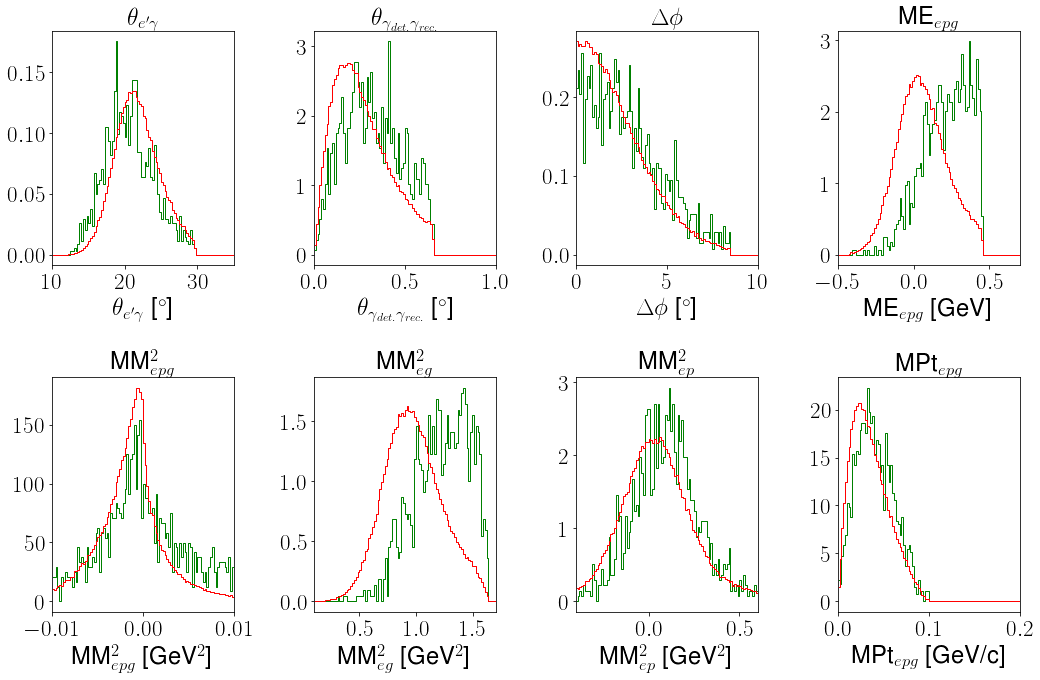

<Figure size 432x288 with 0 Axes>

In [842]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [843]:
dvcsSimInbCDFT.MM2_epg.mean()+3*dvcsSimInbCDFT.MM2_epg.std()

0.012393103496241165

In [844]:
dvcsSimInbCDFT.MM2_epg.mean()-3*dvcsSimInbCDFT.MM2_epg.std()

-0.015349996897409929

In [845]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.MM2_epg<0.0124)&(dvcsSimInbCDFT.MM2_epg>-0.0153)]
bkgSimInbCDFT = bkgSimInbCDFT.loc[(bkgSimInbCDFT.MM2_epg<0.0124)&(bkgSimInbCDFT.MM2_epg>-0.0153)]

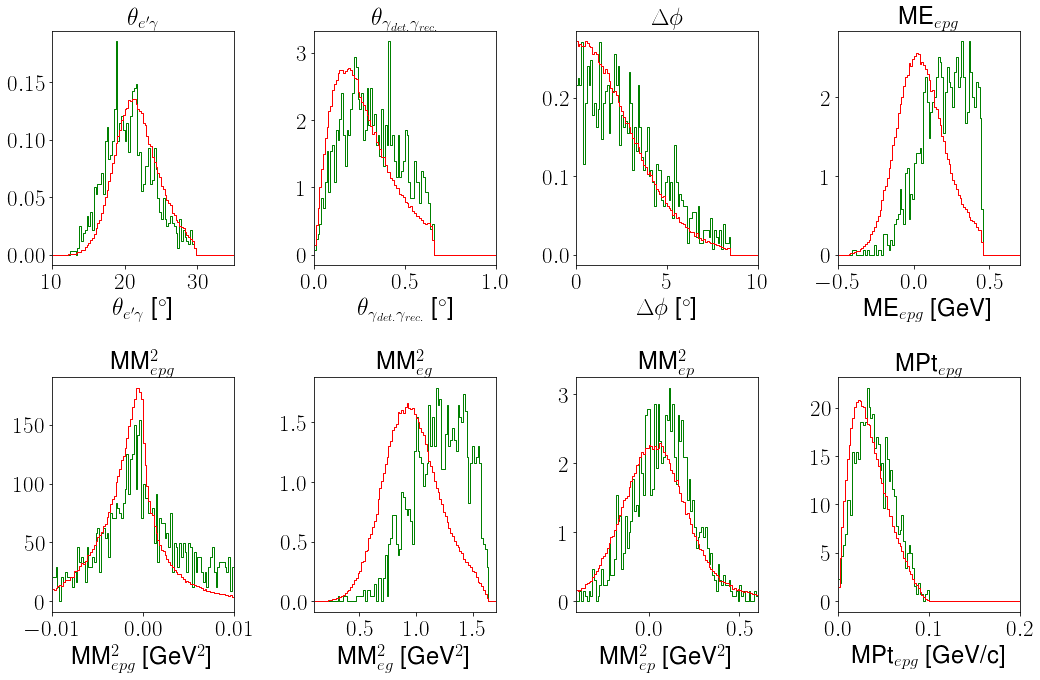

<Figure size 432x288 with 0 Axes>

In [846]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [847]:
len(dvcsSimInbCDFT)

171785

## CDFD cuts

In [848]:
dvcsSimInbCD = copy(dvcsSimInb.loc[(dvcsSimInb.Ee>2)&(dvcsSimInb.Ge>3)&(dvcsSimInb.Pp>0.25)&(dvcsSimInb.Pp<0.8)&((dvcsSimInb.Psector>7)&(dvcsSimInb.Ptheta<60))& (dvcsSimInb.Gsector<7)])
bkgSimInbCD = copy(bkgSimInb.loc[(bkgSimInb.Ee>2)&(bkgSimInb.Ge>3)&(bkgSimInb.Pp>0.25)&(bkgSimInb.Pp<0.8)&((bkgSimInb.Psector>7)&(bkgSimInb.Ptheta<60))& (bkgSimInb.Gsector<7)])

In [849]:
len(dvcsSimInbCD)

328958

In [863]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimInbCD.MM2_ep, bins = np.linspace(-0.6, 0.6, 101))
        params = [0, 0.3, 0, 0, 0]
    else:
        dist, bins = np.histogram(dvcsSimInbCD.MM2_ep, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0, 0.3, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.03, loc = loc, scale = scale)
    ub = norm.ppf(0.985, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        dist_opt = dist
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

[ 0.00811338  0.14465638 -0.11037939  0.48031383  4.77915005] -0.26395541604413425 0.32203080170325693 2.736699755701011e-13
[ 0.00775585  0.14292377 -0.09072365  0.50670671  5.04705191] -0.26105426987544905 0.3179133540145207 1.7950640973651844e-11
[ 0.00766444  0.1423959  -0.08667047  0.51339846  5.16621455] -0.26015285943691874 0.3166764067198809 5.124403124057153e-10
[ 0.00761134  0.14215146 -0.08691622  0.51671     5.24814289] -0.2597462142035514 0.31609285263391634 4.809937670380293e-09
[ 0.00757252  0.14202809 -0.08726233  0.51860873  5.29389487] -0.25955300109720164 0.315786304873855 2.5025188699068224e-08
[ 0.00754742  0.14194862 -0.08773932  0.51961865  5.32644921] -0.2594286237159903 0.31558874959049454 1.0573731212826232e-07


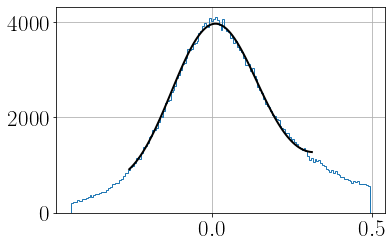

In [864]:
dvcsSimInbCD.MM2_ep.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [866]:
params_opt

array([ 0.00754742,  0.14194862, -0.08773932,  0.51961865,  5.32644921])

In [867]:
print(params_opt[0]-3*params_opt[1], params_opt[0]+3*params_opt[1])

-0.41829842149219043 0.4333932714784303


In [868]:
dvcsSimInbCD = dvcsSimInbCD.loc[(dvcsSimInbCD.MM2_ep<0.433)&(dvcsSimInbCD.MM2_ep>-0.418)]
bkgSimInbCD = bkgSimInbCD.loc[(bkgSimInbCD.MM2_ep<0.433)&(bkgSimInbCD.MM2_ep>-0.418)]

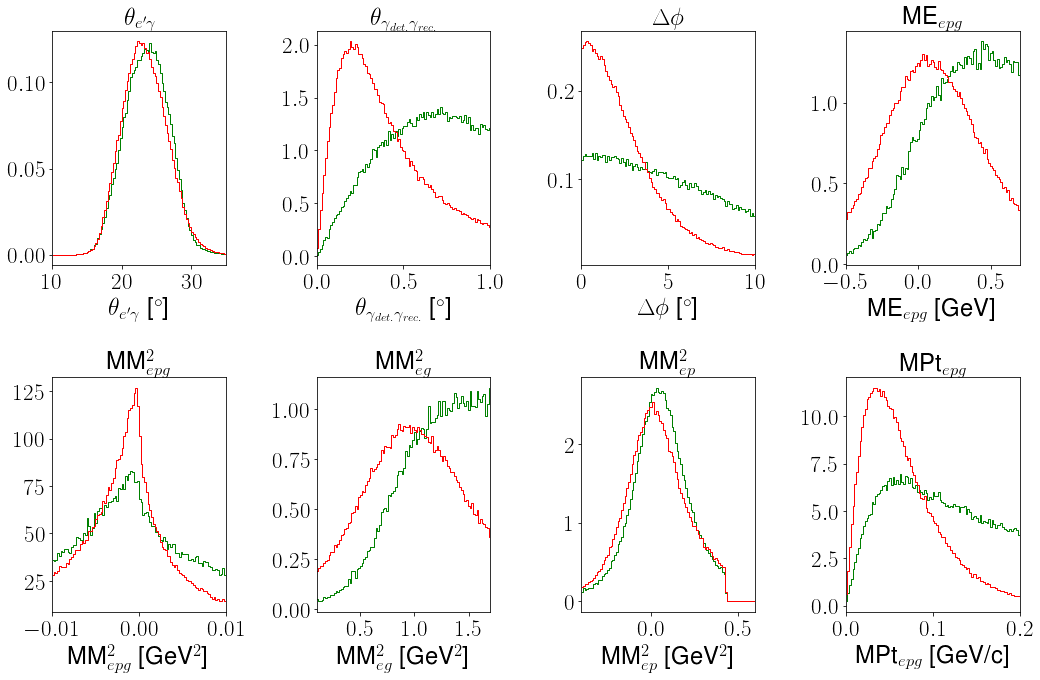

<Figure size 432x288 with 0 Axes>

In [869]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [872]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimInbCD.MM2_eg, bins = np.linspace(-0.5, 2.5, 101))
        params = [0.908, 0.5, -0.471, 0.526, 0]
    else:
        dist, bins = np.histogram(dvcsSimInbCD.MM2_eg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, hist))
    params = res_lsq.x
    loc, scale, a, b, c = params
    lb = norm.ppf(0.01, loc = loc, scale = scale)
    ub = norm.ppf(0.99, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

[ 0.96611396  0.49220587 -0.00396145 -0.08286025  0.06672044] -0.17892811405283737 2.111156037267884 1.1102230246251565e-16
[ 0.96556658  0.49119504 -0.0030665  -0.08435518  0.06799673] -0.1771239521453678 2.1082571192736212 1.3322676295501878e-15
[ 0.96538153  0.49094878 -0.00292318 -0.08479898  0.06838751] -0.17673611931209499 2.1074991696600147 1.9606538614880265e-13


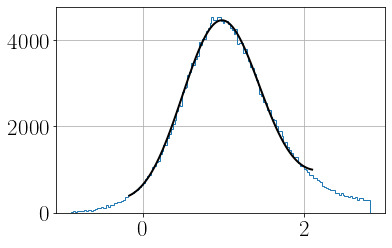

In [873]:
dvcsSimInbCD.MM2_eg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [874]:
print(params_opt[0]-3*params_opt[1], params_opt[0]+3*params_opt[1])

-0.507464806921088 2.4382278572690077


In [875]:
dvcsSimInbCD = dvcsSimInbCD.loc[(dvcsSimInbCD.MM2_eg<2.438)&(dvcsSimInbCD.MM2_eg>-0.507)]
bkgSimInbCD = bkgSimInbCD.loc[(bkgSimInbCD.MM2_eg<2.438)&(bkgSimInbCD.MM2_eg>-0.507)]

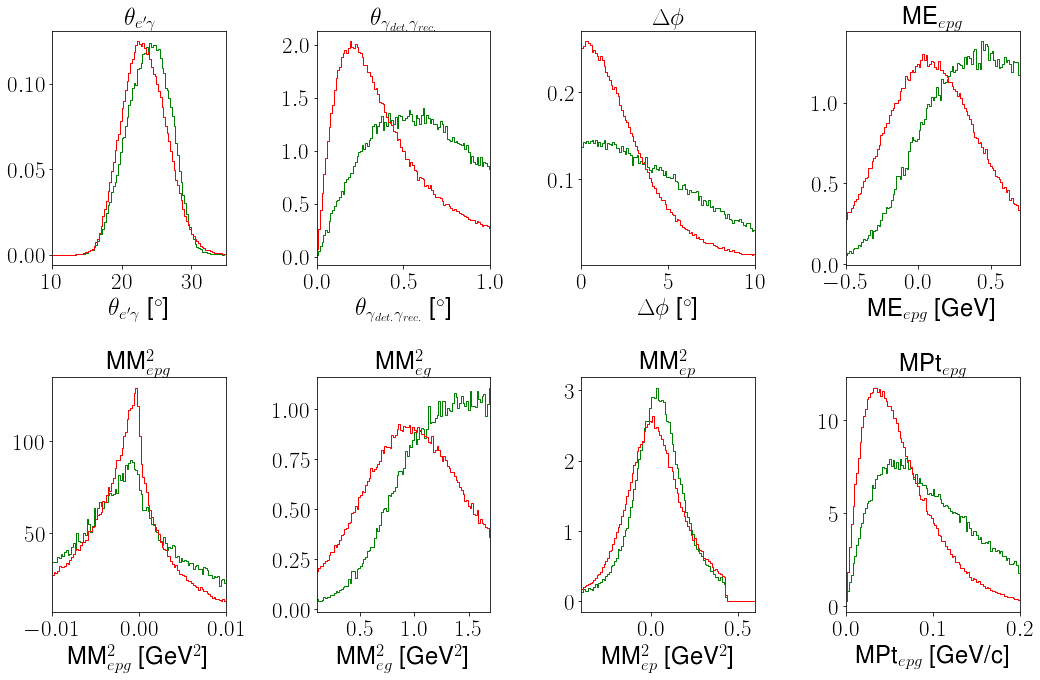

<Figure size 432x288 with 0 Axes>

In [876]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [879]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimInbCD.ME_epg, bins = np.linspace(-0.8, 0.8, 101))
    else:
        dist, bins = np.histogram(dvcsSimInbCD.ME_epg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.1, 0.14, -0.471, 0.526, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.01, loc = loc, scale = scale)
    ub = norm.ppf(0.99, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

[ 0.06351489  0.33576486 -0.02430685  0.08108974  0.17016166] -0.7175909837323702 0.8446207670504984 0.00033358236352065695


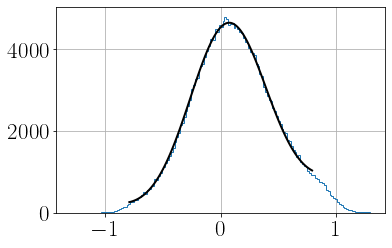

In [880]:
dvcsSimInbCD.ME_epg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [881]:
print(params_opt[0]-3*params_opt[1], params_opt[0]+3*params_opt[1])

-0.9437796975650254 1.0708094808831539


In [882]:
dvcsSimInbCD = dvcsSimInbCD.loc[(dvcsSimInbCD.ME_epg<1.071)&(dvcsSimInbCD.ME_epg>-0.944)]
bkgSimInbCD = bkgSimInbCD.loc[(bkgSimInbCD.ME_epg<1.071)&(bkgSimInbCD.ME_epg>-0.944)]

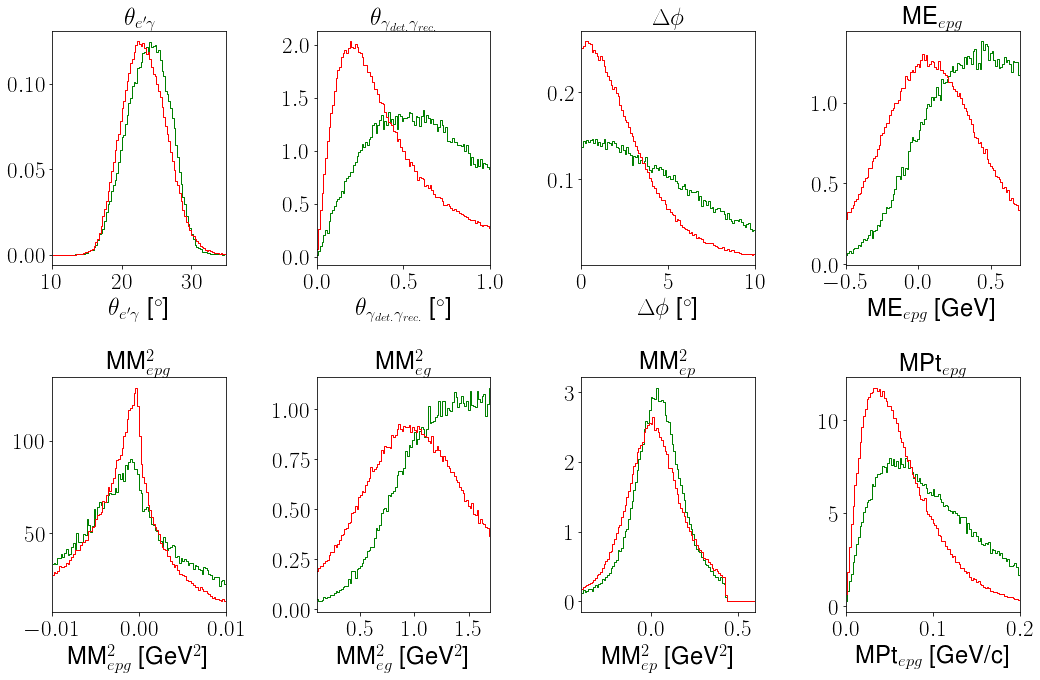

<Figure size 432x288 with 0 Axes>

In [883]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [884]:
len(dvcsSimInbCD)

257842

In [890]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimInbCD.coneAngle, bins = np.linspace(15, 35, 101))
        params = [20, 5, 0, 0, 0]
    else:
        dist, bins = np.histogram(dvcsSimInbCD.coneAngle, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, hist))
    params = res_lsq.x
    loc, scale, a, b, c = params
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

[ 2.28408999e+01  3.35374390e+00 -1.83024482e-01  1.53901873e-02
 -3.07877658e-04] 15.95315206589128 29.728647820384012 2.469947024685837e-09


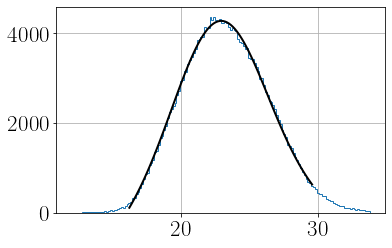

In [891]:
dvcsSimInbCD.coneAngle.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [892]:
print(params_opt[0]-3*params_opt[1], params_opt[0]+3*params_opt[1])

12.77966824885902 32.902131637416275


In [893]:
dvcsSimInbCD = dvcsSimInbCD.loc[(dvcsSimInbCD.coneAngle<32.902)&(dvcsSimInbCD.coneAngle>12.780)]
bkgSimInbCD = bkgSimInbCD.loc[(bkgSimInbCD.coneAngle<32.902)&(bkgSimInbCD.coneAngle>12.780)]

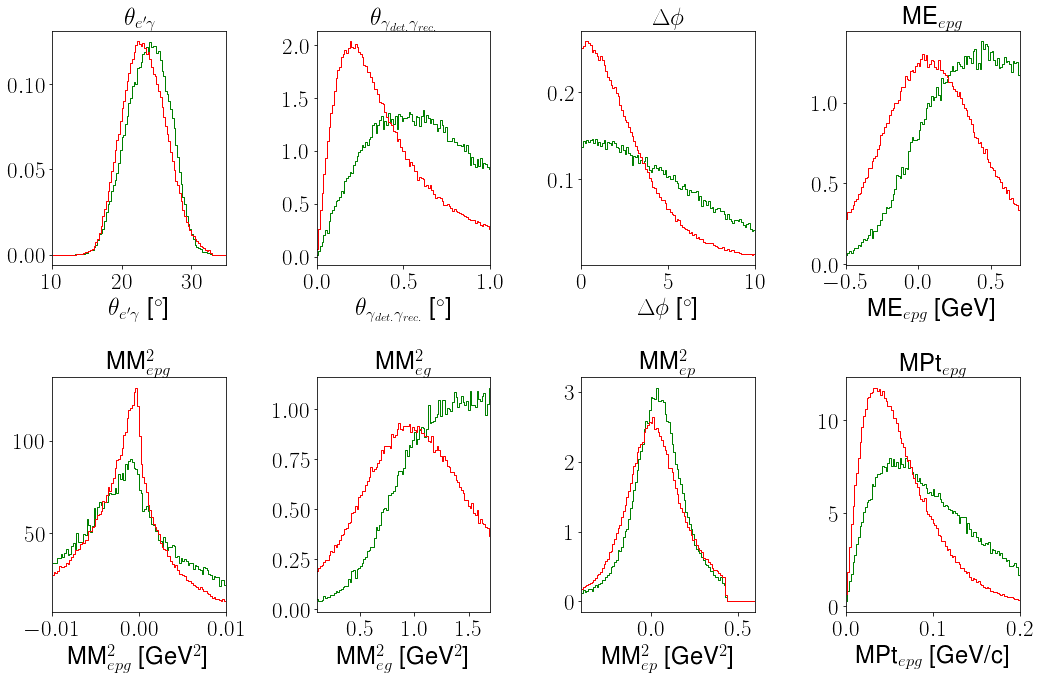

<Figure size 432x288 with 0 Axes>

In [894]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [895]:
len(dvcsSimInbCD)

257261

In [898]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimInbCD.MPt, bins = np.linspace(0.004, 0.2, 101))
        params = [1, 0, 0.03, 0, 0, 0]
    else:
        dist, bins = np.histogram(dvcsSimInbCD.MPt, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.002
    ub = loc + 3*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

1.745750877191199e-09 0.002 0.17936682524132097
[ 4.38913048e+00  9.65588069e-03  5.65703149e-02 -1.73473572e+00
  3.77459755e+01 -1.40842090e+02] 0.002 0.17936682524132097 1.745750877191199e-09
1.1102230246251565e-16 0.002 0.17332865423900803
4.4545478417035156e-11 0.002 0.1712858114568938
4.496403249731884e-14 0.002 0.1704762608481274
1.2303491558895985e-12 0.002 0.17012378498402664
5.007227965592165e-11 0.002 0.16996569316000054
9.521672339474208e-11 0.002 0.1699912892258318
7.221012676694727e-11 0.002 0.17001219480819546
3.8742009600412075e-11 0.002 0.17001606925164628
4.8311687983471074e-11 0.002 0.1700020054041146


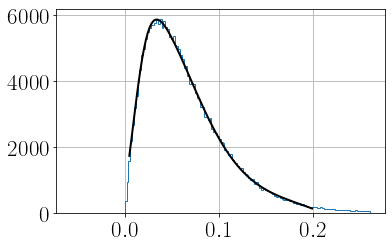

In [899]:
dvcsSimInbCD.MPt.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [900]:
skewnorm.ppf(0.9974, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

0.18001476796588792

In [901]:
dvcsSimInbCD = dvcsSimInbCD.loc[(dvcsSimInbCD.MPt<0.18)]
bkgSimInbCD = bkgSimInbCD.loc[(bkgSimInbCD.MPt<0.18)]

In [902]:
len(dvcsSimInbCD)

250567

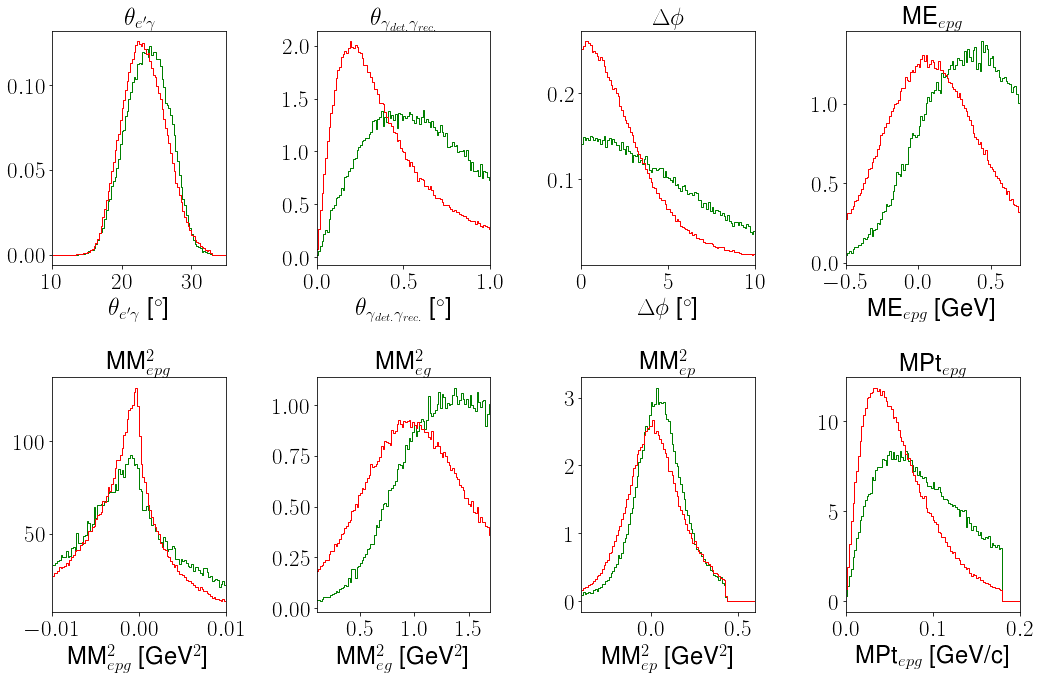

<Figure size 432x288 with 0 Axes>

In [903]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [906]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimInbCD.reconGam, bins = np.linspace(0.01, 1.2, 101))
        params = [10, 0.3, 0.03, 0, 0, 0]
    else:
        dist, bins = np.histogram(dvcsSimInbCD.reconGam, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.01
    ub = skewnorm.ppf(0.998, a = a, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(i, lb, ub, pvalue)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0 0.01 1.0013570463631507 3.275157922644212e-14
[ 3.98018422  0.04110377  0.31073822 -0.69503227  2.25043207 -1.29908956] 0.01 1.0013570463631507 3.275157922644212e-14
1 0.01 0.9439263748981871 0.5656293534506733
[ 3.5323257   0.03876773  0.29290958 -0.80360219  3.02241189 -1.98242819] 0.01 0.9439263748981871 0.5656293534506733
2 0.01 0.9290568764514948 0.43709106836412326
3 0.01 0.924212999474303 0.11957359664916611
4 0.01 0.9223242758007579 0.6476590159304112
[ 3.38404962  0.03814626  0.28612024 -0.84083834  3.37288885 -2.32689755] 0.01 0.9223242758007579 0.6476590159304112
5 0.01 0.9217804630718454 0.8174155547723645
[ 3.3797091   0.03812479  0.28595121 -0.84193549  3.38430813 -2.33900809] 0.01 0.9217804630718454 0.8174155547723645
6 0.01 0.9220953061773604 0.8672006823112199
[ 3.38419068  0.0381789   0.28603559 -0.84048264  3.3774193  -2.33278524] 0.01 0.9220953061773604 0.8672006823112199
7 0.01 0.9216974358246424 0.8023910400125327
8 0.01 0.9221275733868565 0.8774978210478827
[ 3

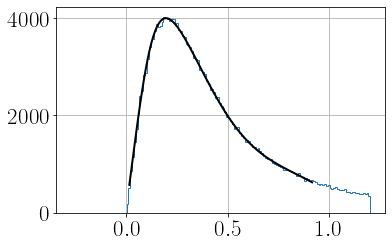

In [907]:
dvcsSimInbCD.reconGam.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [908]:
skewnorm.ppf(0.9974, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

0.899593256697966

In [909]:
dvcsSimInbCD = dvcsSimInbCD.loc[(dvcsSimInbCD.reconGam<0.9)]
bkgSimInbCD = bkgSimInbCD.loc[(bkgSimInbCD.reconGam<0.9)]

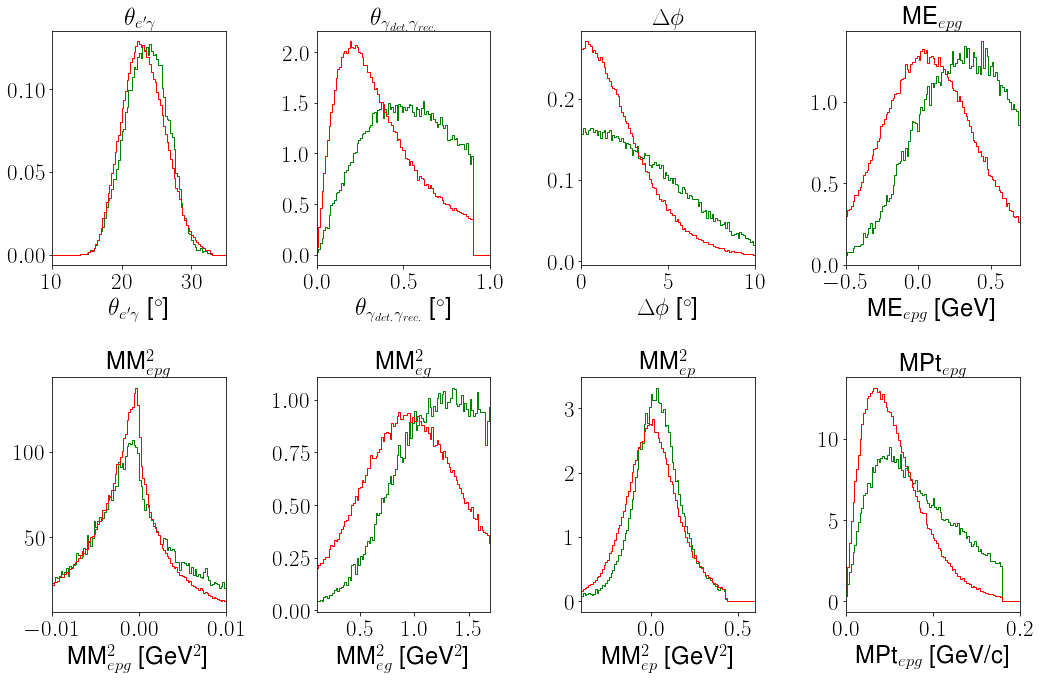

<Figure size 432x288 with 0 Axes>

In [910]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [911]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimInbCD.coplanarity, bins = np.linspace(0, 7, 101))
        params = [3, 0, 0, 0]
    else:
        dist, bins = np.histogram(dvcsSimInbCD.coplanarity, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_halfnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    scale, a, b, c = params
    lb = 0
    ub = 3*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  halfnormfit(res_lsq.x, bincenters), res_lsq)
    print(lb, ub, pvalue)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0 8.535104673696411 1.9409113026447322e-05
[ 2.84503489e+00 -9.84250565e-05 -3.16625849e-03  8.05883973e-04] 0 8.535104673696411 1.9409113026447322e-05
0 8.12752430733395 0.0
0 8.554508479154705 0.0
0 8.096877860486833 0.0
0 8.57610868595662 0.0
0 8.073227124128849 0.0
0 8.583204106741302 0.0
0 8.067597931401593 0.0
0 8.580561546584322 0.0
0 8.069105998853512 0.0


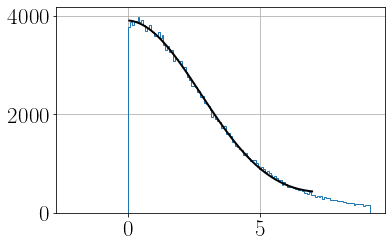

In [912]:
dvcsSimInbCD.coplanarity.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, halfnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [913]:
print(3*params_opt[0])

8.535104673696411


In [914]:
dvcsSimInbCD = dvcsSimInbCD.loc[(dvcsSimInbCD.coplanarity<8.535)]
bkgSimInbCD = bkgSimInbCD.loc[(bkgSimInbCD.coplanarity<8.535)]

In [915]:
print(dvcsSimInbCD.MM2_epg.mean()-3*dvcsSimInbCD.MM2_epg.std(), dvcsSimInbCD.MM2_epg.mean()+3*dvcsSimInbCD.MM2_epg.std())

-0.028199961059108606 0.024824046808876826


In [916]:
dvcsSimInbCD = dvcsSimInbCD.loc[(dvcsSimInbCD.MM2_epg<0.0248)&(dvcsSimInbCD.MM2_epg>-0.0282)]
bkgSimInbCD = bkgSimInbCD.loc[(bkgSimInbCD.MM2_epg<0.0248)&(bkgSimInbCD.MM2_epg>-0.0282)]

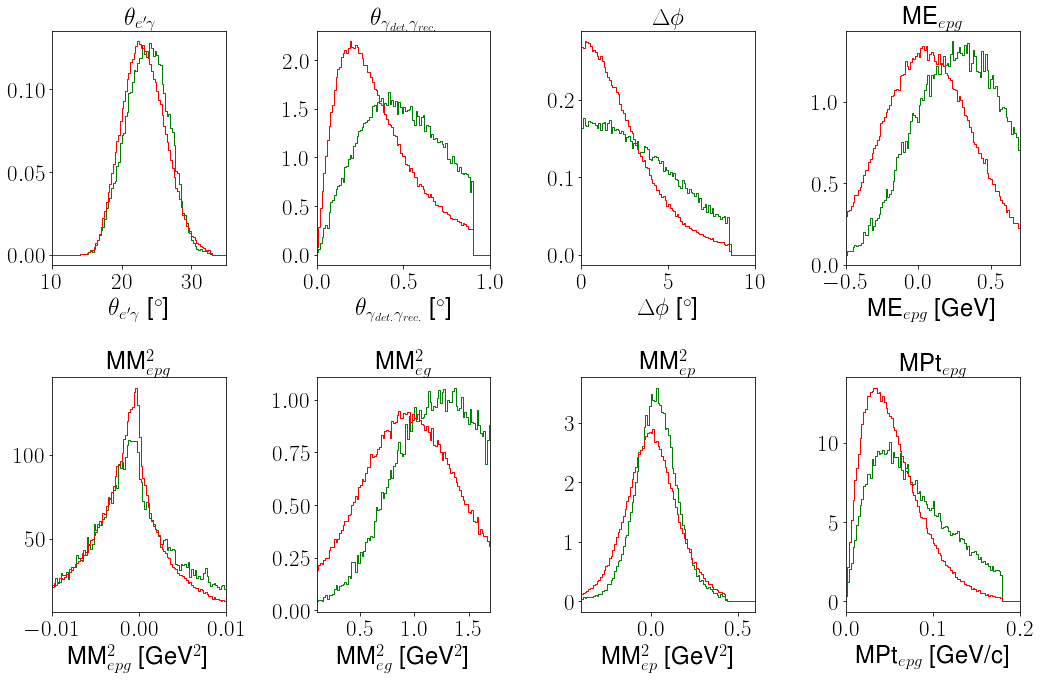

<Figure size 432x288 with 0 Axes>

In [917]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [918]:
len(dvcsSimInbCD)

200595

## FDFD cuts

In [60]:
dvcsSimInbFD = copy(dvcsSimInb.loc[(dvcsSimInb.Ee>2)&(dvcsSimInb.Ge>3)&(dvcsSimInb.Pp>0.35)&(dvcsSimInb.Pp<0.8)&((dvcsSimInb.Psector<7)&(dvcsSimInb.Ptheta<32))& (dvcsSimInb.Gsector<7)])
bkgSimInbFD = copy(bkgSimInb.loc[(bkgSimInb.Ee>2)&(bkgSimInb.Ge>3)&(bkgSimInb.Pp>0.35)&(bkgSimInb.Pp<0.8)&((bkgSimInb.Psector<7)&(bkgSimInb.Ptheta<32))& (bkgSimInb.Gsector<7)])

In [920]:
len(dvcsSimInbFD)

62745

In [921]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimInbFD.MM2_ep, bins = np.linspace(-0.6, 0.6, 101))
        params = [0, 0.8, 0, 0, 0]
    else:
        dist, bins = np.histogram(dvcsSimInbFD.MM2_ep, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, hist))
    params = res_lsq.x
    loc, scale, a, b, c = params
    lb = norm.ppf(0.01, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        dist_opt = dist
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

[-9.52304330e-04  1.17297662e-01 -7.97658851e-02  9.70876268e-01
  9.44325053e+00] -0.27382746993953777 0.19198517972735601 3.7211406821335835e-05
[-6.69147540e-04  1.14405248e-01 -5.91254144e-02  9.73007338e-01
  1.09375417e+01] -0.26681555385007477 0.1875107401727242 0.001733914043970719
[-1.27632821e-04  1.13577680e-01 -4.35771738e-02  9.03553968e-01
  1.11106266e+01] -0.26434882672664645 0.186691025713498 0.014926947284422898
[-2.94286366e-04  1.13199858e-01 -4.36931903e-02  9.36113820e-01
  1.14351240e+01] -0.2636365354177551 0.1859029106717516 0.06509015524132578
[-6.44261628e-04  1.12919014e-01 -4.70504916e-02  9.97806811e-01
  1.18515733e+01] -0.26333317014008484 0.1850909883530172 0.09873277421813165
[-1.16076149e-03  1.12756031e-01 -4.81678841e-02  1.07881826e+00
  1.21745657e+01] -0.2634705142533724 0.18430640489316072 0.1613216906286311


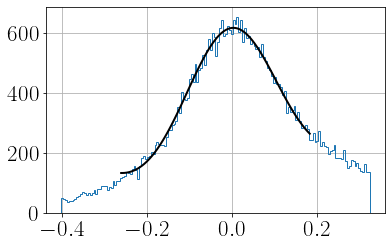

In [922]:
dvcsSimInbFD.MM2_ep.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [923]:
print(params_opt[0]-5*params_opt[1], params_opt[0]+5*params_opt[1])

-0.56494091597749 0.562619392998632


In [61]:
dvcsSimInbFD = dvcsSimInbFD.loc[(dvcsSimInbFD.MM2_ep<0.563)&(dvcsSimInbFD.MM2_ep>-0.565)]
bkgSimInbFD = bkgSimInbFD.loc[(bkgSimInbFD.MM2_ep<0.563)&(bkgSimInbFD.MM2_ep>-0.565)]

In [925]:
len(dvcsSimInbFD)

53489

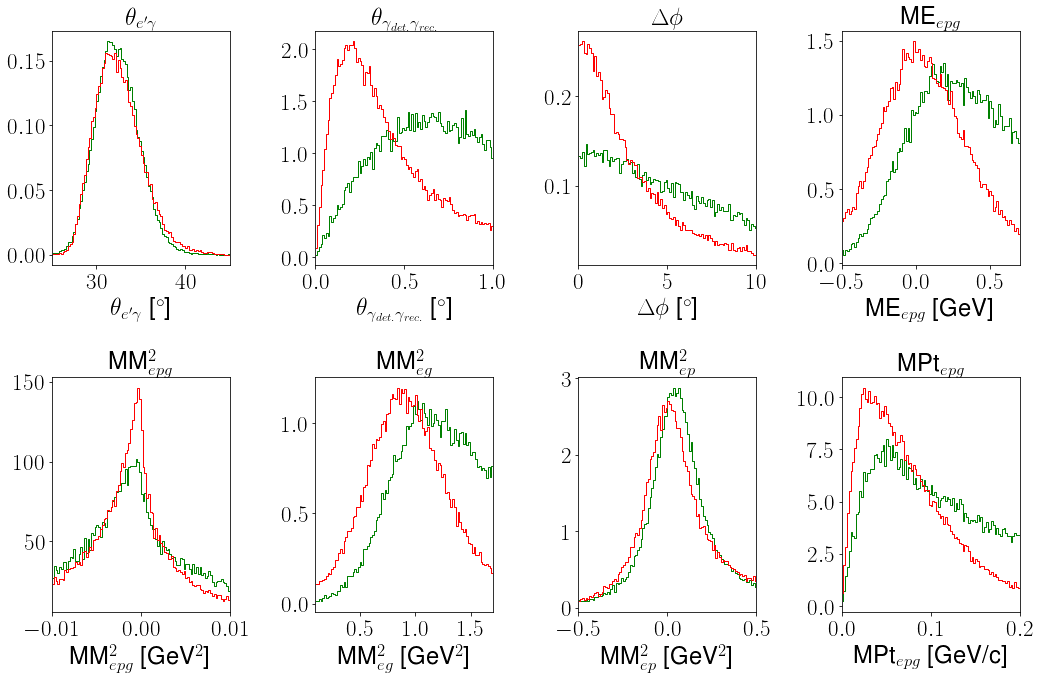

<Figure size 432x288 with 0 Axes>

In [926]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [25, 0, 0, -0.5, -0.01, 0.1, -0.5 , 0]
binends = [45, 1, 10, 0.7, 0.01, 1.7, 0.5, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [927]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimInbFD.MM2_eg, bins = np.linspace(-0.5, 2.5, 101))
        params = [0.908, 0.244, -0.471, 0.526, 0]
    else:
        dist, bins = np.histogram(dvcsSimInbFD.MM2_eg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, hist))
    params = res_lsq.x
    loc, scale, a, b, c = params
    lb = norm.ppf(0.01, loc = loc, scale = scale)
    ub = norm.ppf(0.99, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

[ 0.89007035  0.34431018  0.02004494 -0.17592497  0.13710549] 0.08908510318931728 1.6910555957029914 0.0008702429871725315
[ 0.88748325  0.33959667  0.03182695 -0.20346635  0.159749  ] 0.0974632501161884 1.6775032477779588 0.27240493898779583


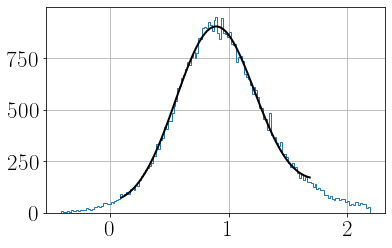

In [928]:
dvcsSimInbFD.MM2_eg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [929]:
print(params_opt[0]-5*params_opt[1], params_opt[0]+5*params_opt[1])

-0.8105001172694097 2.585466615163557


In [62]:
dvcsSimInbFD = dvcsSimInbFD.loc[(dvcsSimInbFD.MM2_eg<2.585)&(dvcsSimInbFD.MM2_eg>-0.811)]
bkgSimInbFD = bkgSimInbFD.loc[(bkgSimInbFD.MM2_eg<2.585)&(bkgSimInbFD.MM2_eg>-0.811)]

In [931]:
len(dvcsSimInbFD)

52578

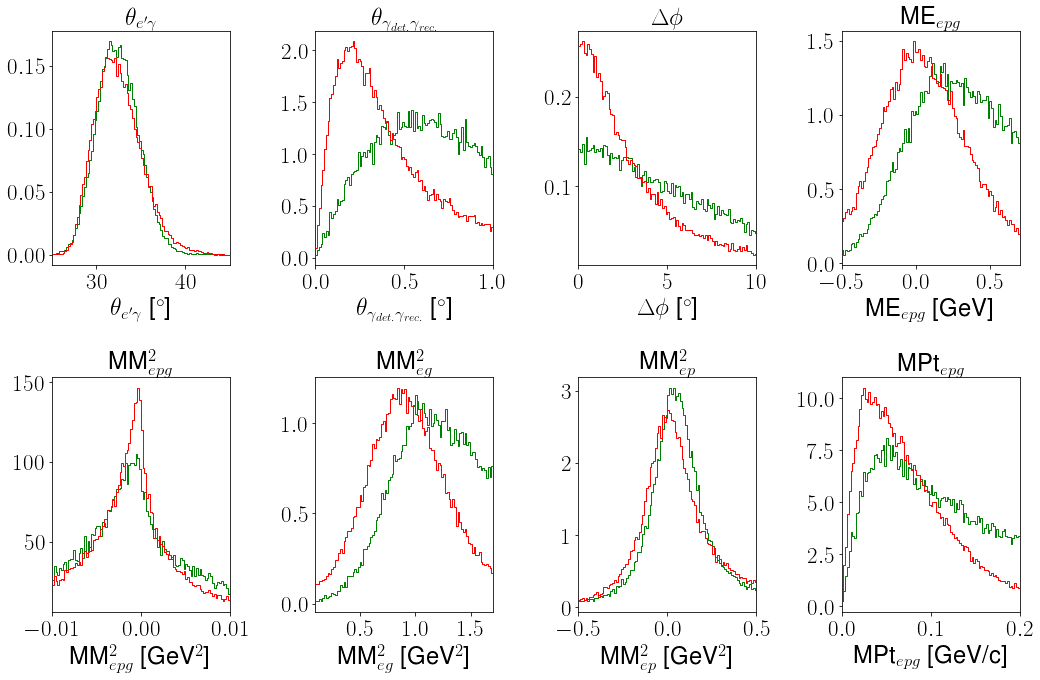

<Figure size 432x288 with 0 Axes>

In [932]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [25, 0, 0, -0.5, -0.01, 0.1, -0.5 , 0]
binends = [45, 1, 10, 0.7, 0.01, 1.7, 0.5, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [933]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimInbFD.ME_epg, bins = np.linspace(-1, 1, 101))
    else:
        dist, bins = np.histogram(dvcsSimInbFD.ME_epg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.1, 0.14, -0.471, 0.526, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.01, loc = loc, scale = scale)
    ub = norm.ppf(0.99, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

[ 0.01653075  0.28941192 -0.02923044  0.09679702  0.22424978] -0.6567420589779558 0.6898035501870987 0.017141324717939832
[ 0.01488592  0.2864704  -0.02753572  0.1093312   0.26199558] -0.6515438933182855 0.6813157298545627 0.13636248768498982


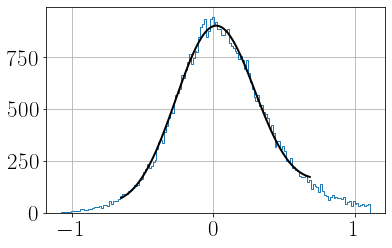

In [934]:
dvcsSimInbFD.ME_epg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [935]:
print(params_opt[0]-5*params_opt[1], params_opt[0]+5*params_opt[1])

-1.417466093705124 1.4472379302414013


In [63]:
dvcsSimInbFD = dvcsSimInbFD.loc[(dvcsSimInbFD.ME_epg<1.447)&(dvcsSimInbFD.ME_epg>-1.417)]
bkgSimInbFD = bkgSimInbFD.loc[(bkgSimInbFD.ME_epg<1.447)&(bkgSimInbFD.ME_epg>-1.417)]

In [937]:
len(dvcsSimInbFD)

52499

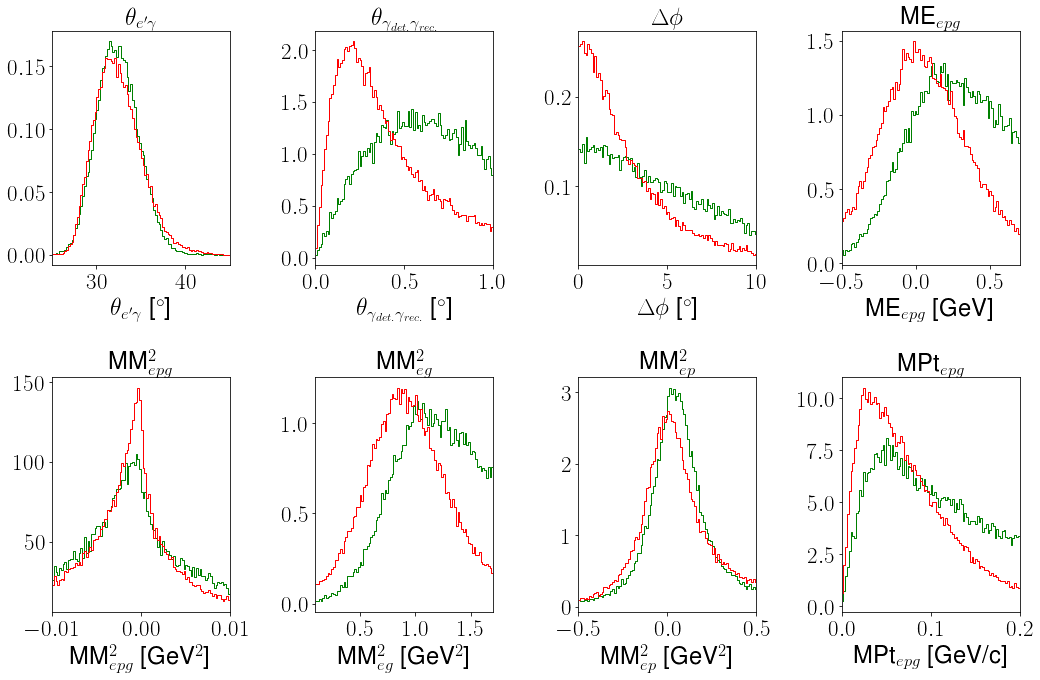

<Figure size 432x288 with 0 Axes>

In [938]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [25, 0, 0, -0.5, -0.01, 0.1, -0.5 , 0]
binends = [45, 1, 10, 0.7, 0.01, 1.7, 0.5, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [942]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimInbFD.coneAngle, bins = np.linspace(26, 40, 101))
    else:
        dist, bins = np.histogram(dvcsSimInbFD.coneAngle, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [31, 5, -0.471, 0.526, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.99, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

[ 3.14717663e+01  2.63075909e+00 -1.22032577e+00  7.11063288e-02
 -1.01793918e-03] 27.144552619546694 37.59182708433949 0.45957252370039936
[ 3.15007727e+01  2.61194794e+00 -1.08785074e+00  6.30414100e-02
 -8.96226357e-04] 27.20450068975581 37.57707226906696 0.530668400746906
[ 3.15014799e+01  2.61231137e+00 -1.08606528e+00  6.29407753e-02
 -8.94836724e-04] 27.204610066610275 37.57862488869491 0.5671082657249851


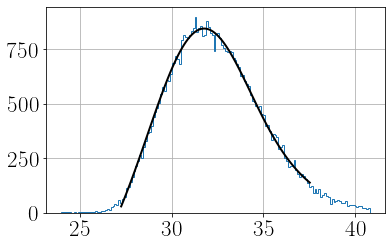

In [943]:
dvcsSimInbFD.coneAngle.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [944]:
print(params_opt[0]-5*params_opt[1], params_opt[0]+5*params_opt[1])

18.4399230580131 44.56303672900765


In [64]:
dvcsSimInbFD = dvcsSimInbFD.loc[(dvcsSimInbFD.coneAngle>18.440)&(dvcsSimInbFD.coneAngle<44.563)]
bkgSimInbFD = bkgSimInbFD.loc[(bkgSimInbFD.coneAngle>18.440)&(bkgSimInbFD.coneAngle<44.563)]

In [946]:
len(dvcsSimInbFD)

52495

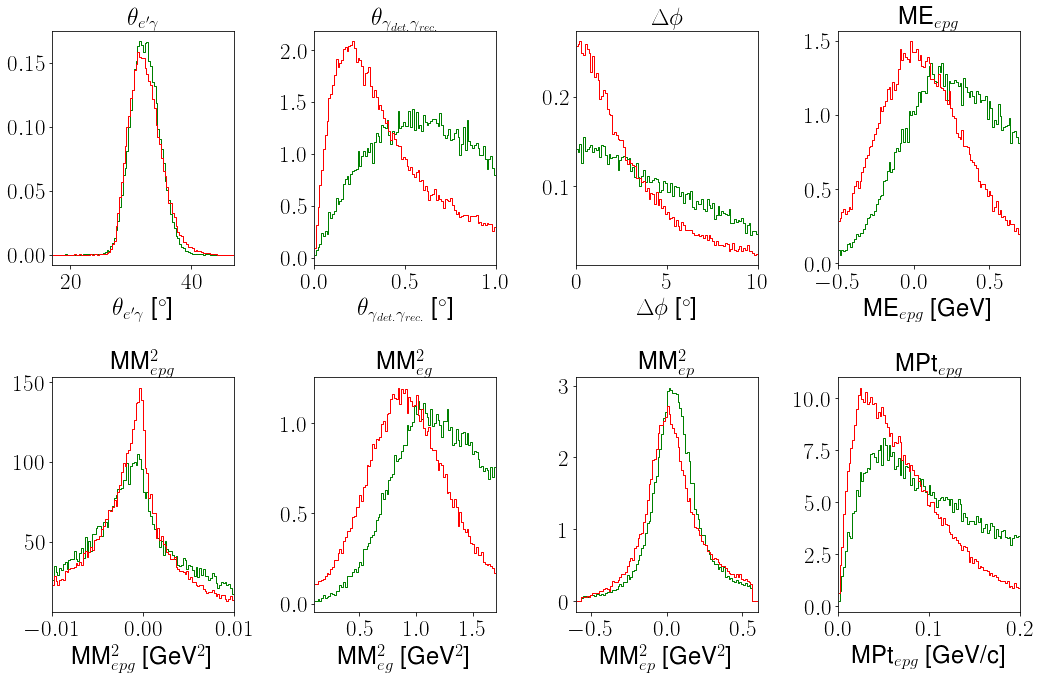

<Figure size 432x288 with 0 Axes>

In [947]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [17, 0, 0, -0.5, -0.01, 0.1,-0.6 , 0]
binends = [47, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [948]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimInbFD.MPt, bins = np.linspace(0.001, 0.2, 101))
        params = [1, 0, 0.03, 0, 0, 0]
    else:
        dist, bins = np.histogram(dvcsSimInbFD.MPt, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.001
    ub = loc + 3*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
#     print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

[ 7.18653922e+00  6.34449786e-03  6.73073815e-02 -2.41193789e+00
  4.51319429e+01 -1.49750323e+02] 0.001 0.20826664249463675 0.12966335993945854
[ 7.28411264e+00  6.47735774e-03  6.79686669e-02 -2.29744540e+00
  4.18302575e+01 -1.35981556e+02] 0.001 0.21038335833872326 0.28431198687546266
[ 7.22763275e+00  6.37781016e-03  6.77352894e-02 -2.37947602e+00
  4.33929740e+01 -1.41881360e+02] 0.001 0.20958367827607505 0.5252666796190752
[ 7.23055485e+00  6.37493150e-03  6.77318927e-02 -2.38171622e+00
  4.34335240e+01 -1.42030885e+02] 0.001 0.20957060958125012 0.6042512933150057


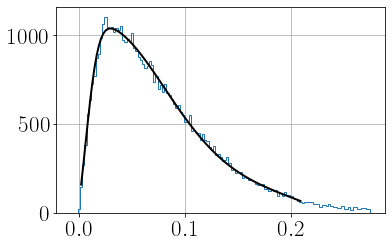

In [949]:
dvcsSimInbFD.MPt.hist(bins = extendedBins(bins_opt, 3, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [950]:
skewnorm.ppf(0.999999426696856, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

0.3450343949620289

In [65]:
dvcsSimInbFD = dvcsSimInbFD.loc[(dvcsSimInbFD.MPt<0.345)]
bkgSimInbFD = bkgSimInbFD.loc[(bkgSimInbFD.MPt<0.345)]

In [953]:
len(dvcsSimInbFD.loc[(dvcsSimInbFD.MPt<0.349)])

52014

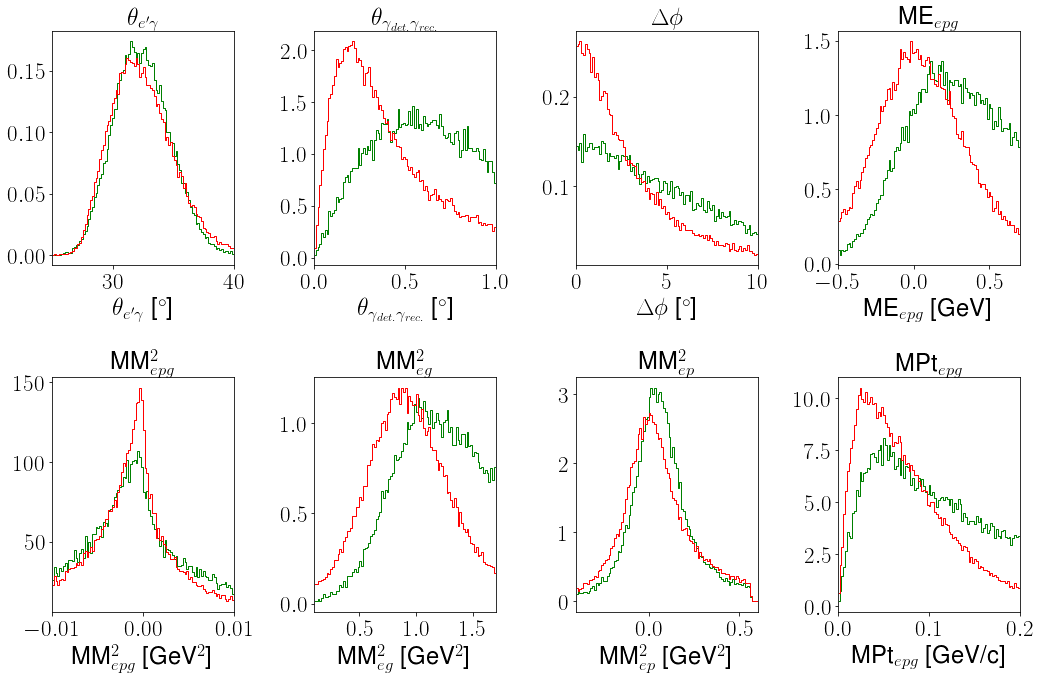

<Figure size 432x288 with 0 Axes>

In [954]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [25, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [955]:
pvalue_opt = 0
for i in range(0, 1):
    if i == 0:
        dist, bins = np.histogram(dvcsSimInbFD.reconGam, bins = np.linspace(0.005, 1.3, 101))
        params = [1, 0.3, 0.03, 0, 0, 0]
    else:
        dist, bins = np.histogram(dvcsSimInbFD.reconGam, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.001
    ub = loc+3*scale#skewnorm.ppf(0.9, a = a, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(lb, ub, pvalue)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.001 0.9622150430005231 0.0003568803260400877
[ 4.25687894  0.03444591  0.30925638 -0.74258523  2.25420744 -1.23118817] 0.001 0.9622150430005231 0.0003568803260400877


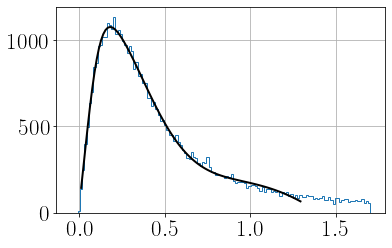

In [956]:
dvcsSimInbFD.reconGam.hist(bins = extendedBins(bins_opt, 3, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [957]:
skewnorm.ppf(0.999999426696856, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

1.5807277989147805

In [66]:
dvcsSimInbFD = dvcsSimInbFD.loc[(dvcsSimInbFD.reconGam<1.581)]
bkgSimInbFD = bkgSimInbFD.loc[(bkgSimInbFD.reconGam<1.581)]

In [959]:
len(dvcsSimInbFD)

45941

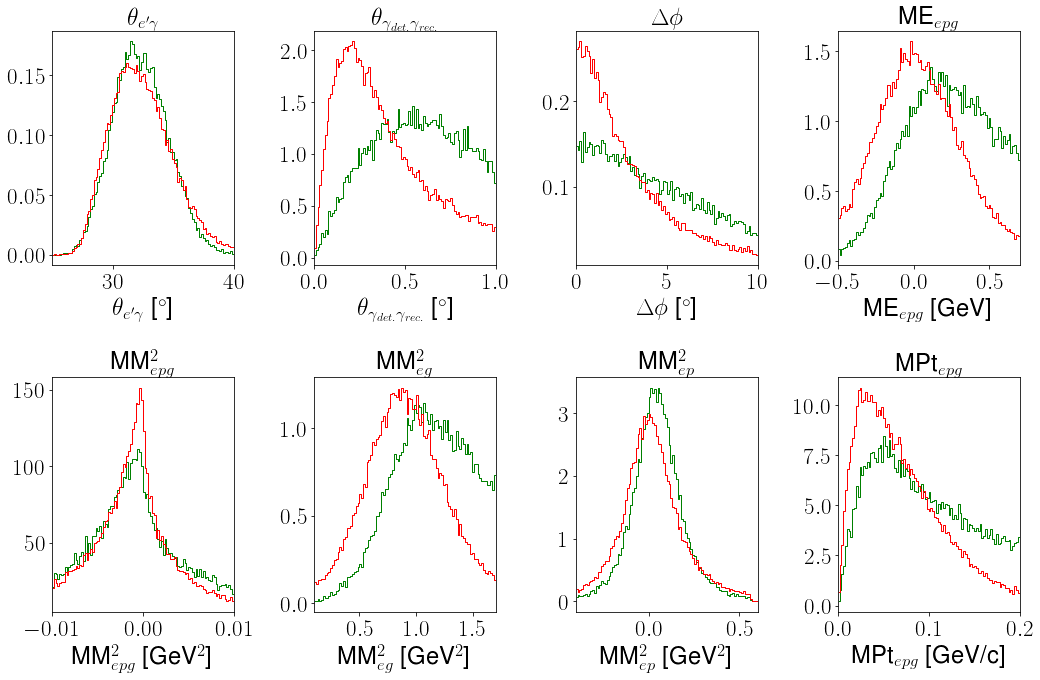

<Figure size 432x288 with 0 Axes>

In [960]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [25, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [961]:
len(dvcsSimInbFD)

45941

In [74]:
pvalue_opt = 0
for i in range(0, 5):
    if i == 0:
        dist, bins = np.histogram(dvcsSimInbFD.coplanarity, bins = np.linspace(0, 25, 101))
        params = [3, 0, 0, 0]
    else:
        dist, bins = np.histogram(dvcsSimInbFD.coplanarity, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_halfnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    scale, a, b, c = params
    lb = 0
    ub = 1.7*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  halfnormfit(res_lsq.x, bincenters), res_lsq)
    print(lb, ub, pvalue)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0 5.532862226603825 0.0
0 5.53748376741171 0.008108945301610326
[ 3.25734339  0.0862891  -0.05203473  0.00723431] 0 5.53748376741171 0.008108945301610326
0 5.5409548877903605 0.032166858711280666
[ 3.25938523  0.08634524 -0.05204369  0.00722843] 0 5.5409548877903605 0.032166858711280666
0 5.5731383572996425 0.012747721117869704
0 5.627757988529294 0.04155873707435309
[ 3.31044588  0.08982925 -0.05311268  0.00721816] 0 5.627757988529294 0.04155873707435309


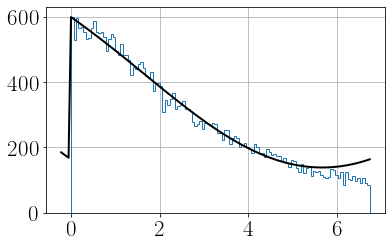

In [75]:
dvcsSimInbFD.coplanarity.hist(bins = extendedBins(bins_opt, 3, 20), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(extendedBins(bins_opt, 3, 20), halfnormfit(params_opt, extendedBins(bins_opt, 3, 20))*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [76]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimInbFD.coplanarity, bins = np.linspace(0, 25, 101))
        params = [ 2.15765391, 0, 0, 0]
    else:
        dist, bins = np.histogram(dvcsSimInbFD.coplanarity, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_halfcauchyfit, params, args=(bincenters, hist))
    params = res_lsq.x
    scale, a, b, c = params
    lb = 0
    ub = 4*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  halfcauchyfit(res_lsq.x, bincenters), res_lsq)
    print(lb, ub, pvalue)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0 11.384532947033604 0.2293570689410115
[ 2.84613324e+00  8.90210370e-03 -7.68558439e-04  1.72394996e-05] 0 11.384532947033604 0.2293570689410115
0 10.989843939558305 0.6497890389481846
[ 2.74746098e+00  2.75311440e-02 -3.41319107e-03  1.18968317e-04] 0 10.989843939558305 0.6497890389481846
0 10.940359441163276 0.8112722835515237
[ 2.73508986e+00  2.84542093e-02 -3.36721578e-03  1.03781138e-04] 0 10.940359441163276 0.8112722835515237
0 10.937837731954838 0.6319806177139675
0 10.936990740389145 0.537251020372262
0 10.935999939206678 0.5748303404155328
0 10.93628793202051 0.535674138517485
0 10.936085258727571 0.5388378088951009
0 10.936315046490053 0.5286060330016971
0 10.936035708957373 0.5439384105958429


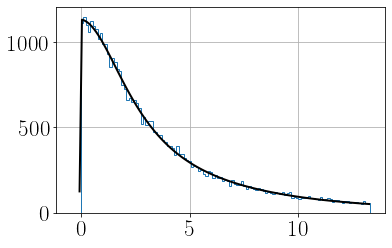

In [77]:
dvcsSimInbFD.coplanarity.hist(bins = extendedBins(bins_opt, 3, 20), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(extendedBins(bincenters_opt, 0, 20), halfcauchyfit(params_opt, extendedBins(bincenters_opt, 0, 20))*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [83]:
halfcauchy.ppf(0.994, scale = params_opt[0])

290.19345478810385

In [82]:
sum(dvcsSimInbFD.coplanarity>25)/len(dvcsSimInbFD)

0.042027597614591045

In [722]:
dvcsSimInbFD = dvcsSimInbFD.loc[(dvcsSimInbFD.coplanarity<10.95)]
bkgSimInbFD = bkgSimInbFD.loc[(bkgSimInbFD.coplanarity<10.95)]

In [781]:
len(dvcsSimInbFD.loc[(dvcsSimInbFD.coplanarity<10.95)])

57150

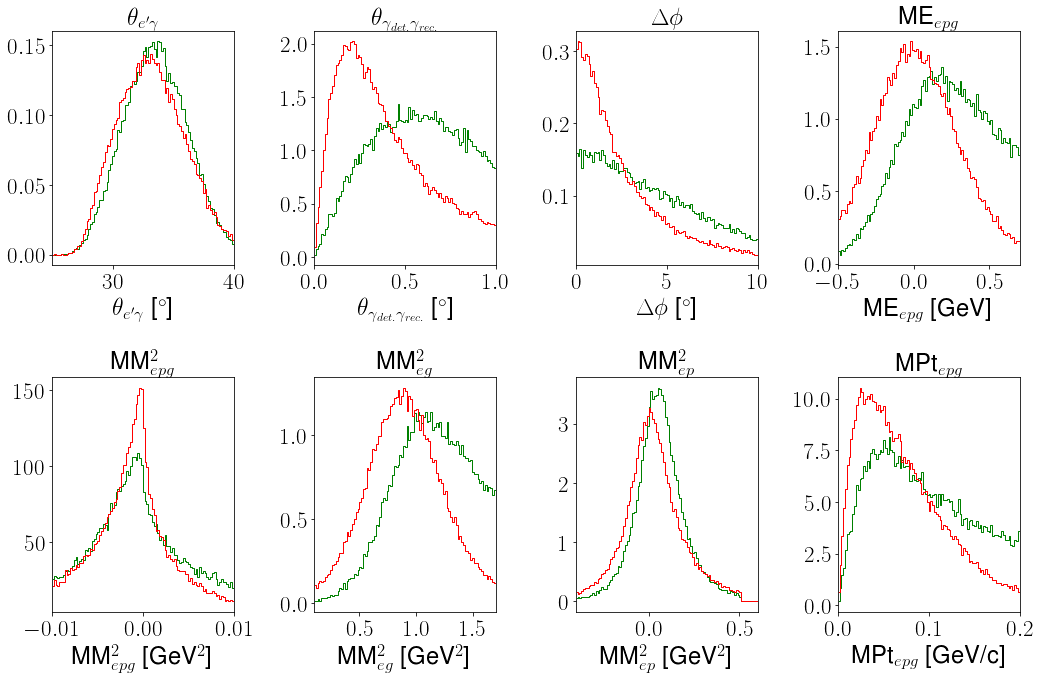

<Figure size 432x288 with 0 Axes>

In [783]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [25, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [967]:
dvcsSimInbFD.MM2_epg.mean()+3*dvcsSimInbFD.MM2_epg.std()

0.03032646150611348

In [968]:
dvcsSimInbFD.MM2_epg.mean()-3*dvcsSimInbFD.MM2_epg.std()

-0.03441509643134953

In [969]:
dvcsSimInbFD = dvcsSimInbFD.loc[(dvcsSimInbFD.MM2_epg<0.0303)&(dvcsSimInbFD.MM2_epg>-0.0303)]
bkgSimInbFD = bkgSimInbFD.loc[(bkgSimInbFD.MM2_epg<0.0344)&(bkgSimInbFD.MM2_epg>-0.0344)]

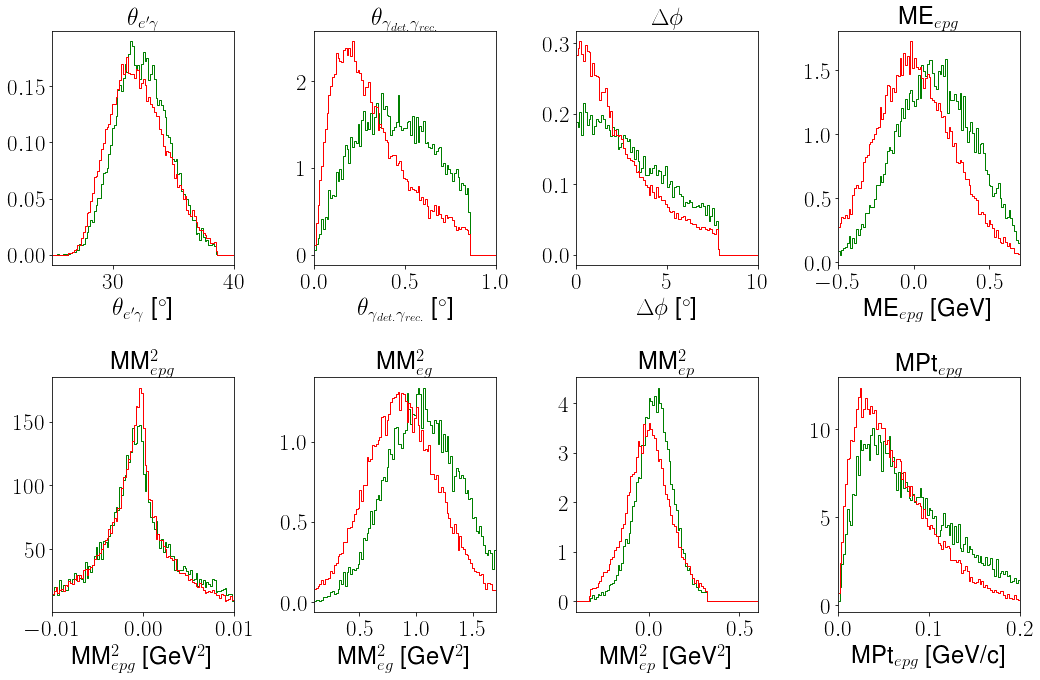

<Figure size 432x288 with 0 Axes>

In [2005]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [25, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [970]:
len(dvcsSimInbFD)

44721

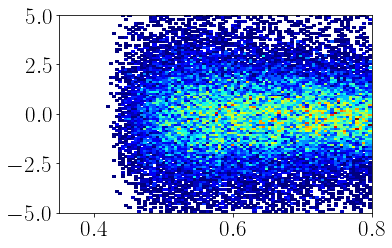

In [2009]:
plt.hist2d(dvcsSimInbFD.Pp, dvcsSimInbFD.Pvz - dvcsSimInbFD.Evz, bins = [np.linspace(0.35, 0.8, 101), np.linspace(-5, 5, 101)], cmap = cmap, cmin = 1)
plt.show()

In [2010]:
dvcsSimInbFD.Pp.min()

0.4197781432527128

In [2011]:
dvcsSimInbCDFT.Pp.min()

0.30137538204696523

In [2012]:
dvcsSimInbCD.Pp.min()

0.3074717148301049

In [2013]:
dvcsSimInbFD.Ptheta.max()

31.99978064933157

In [2014]:
dvcsSimInbCD.Ptheta.min()

34.090923839278204

In [2061]:
dvcsSimInbFD.Ptheta.min()

2.4770068687528086

In [2062]:
dvcsSimInbFD.Ptheta.max()

31.99978064933157

<AxesSubplot:>

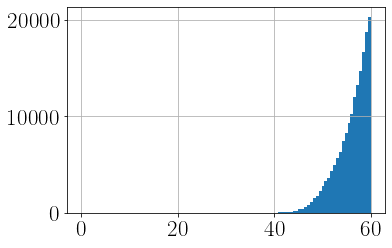

In [2017]:
dvcsSimInbCDFT.Ptheta.hist(bins = np.linspace(0, 60,101))

In [2019]:
dvcsSimInbCDFT.loc[dvcsSimInbCDFT.Ptheta>0].Ptheta.min()

38.0192002797524

<AxesSubplot:>

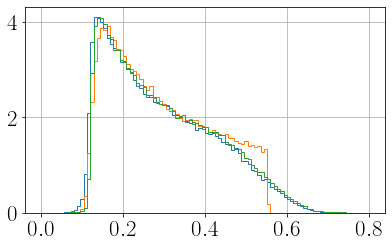

In [2041]:
dvcsSimInbCDFT.t2.hist(bins = np.linspace(0, 0.8, 101), density = True, histtype = 'step')
dvcsSimInbCDFT.t1.hist(bins = np.linspace(0, 0.8, 101), density = True, histtype = 'step')
dvcsSimInbCDFT.Gent2.hist(bins = np.linspace(0, 0.8, 101), density = True, histtype = 'step')

<AxesSubplot:>

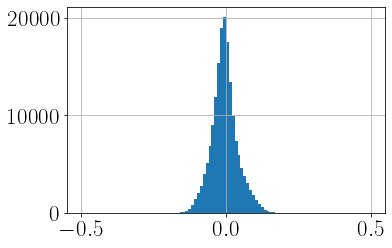

In [2030]:
(dvcsSimInbCDFT.t2 - dvcsSimInbCDFT.t1).hist(bins = np.linspace(-0.5, 0.5 ,101))

In [2034]:
def saveGenDVCSvars(df):
        #set up dvcs variables
        ele = [df['GenEpx'], df['GenEpy'], df['GenEpz']]
        df.loc[:, 'GenEp'] = mag(ele)
        df.loc[:, 'GenEe'] = getEnergy(ele, me)
        df.loc[:, 'GenEtheta'] = getTheta(ele)
        df.loc[:, 'GenEphi'] = getPhi(ele)

        pro = [df['GenPpx'], df['GenPpy'], df['GenPpz']]
        df.loc[:, 'GenPp'] = mag(pro)
        df.loc[:, 'GenPe'] = getEnergy(pro, M)
        df.loc[:, 'GenPtheta'] = getTheta(pro)
        df.loc[:, 'GenPphi'] = getPhi(pro)

        gam = [df['GenGpx'], df['GenGpy'], df['GenGpz']]
        df.loc[:, 'GenGp'] = mag(gam)
        df.loc[:, 'GenGe'] = getEnergy(gam, 0)
        df.loc[:, 'GenGtheta'] = getTheta(gam)
        df.loc[:, 'GenGphi'] = getPhi(gam)

        Ppt = mag([df['GenPpx'], df['GenPpy'], 0])

        VGS = [-df['GenEpx'], -df['GenEpy'], pbeam - df['GenEpz']]
        v3l = cross(beam, ele)
        v3h = cross(pro, VGS)
        v3g = cross(VGS, gam)
        VmissG = [-df["GenEpx"] - df["GenPpx"], -df["GenEpy"] - df["GenPpy"],
                  pbeam - df["GenEpz"] - df["GenPpz"]]
        VmissP = [-(df["GenEpx"] + df["GenGpx"]), -(df["GenEpy"] + df["GenGpy"]),
                  -(-pbeam + df["GenEpz"] + df["GenGpz"])]
        Vmiss = [-(df["GenEpx"] + df["GenPpx"] + df["GenGpx"]), -(df["GenEpy"] + df["GenPpy"] + df["GenGpy"]),
                 -(-pbeam + df["GenEpz"] + df["GenPpz"] + df["GenGpz"])]
        costheta = cosTheta(VGS, gam)

        df.loc[:, 'GenMpx'], df.loc[:, 'GenMpy'], df.loc[:, 'GenMpz'] = Vmiss

        # binning kinematics
        df.loc[:,'GenQ2'] = -((ebeam - df['GenEe'])**2 - mag2(VGS))
        df.loc[:,'Gennu'] = (ebeam - df['GenEe'])
        df.loc[:,'Geny'] = df['Gennu']/ebeam
        df.loc[:,'GenxB'] = df['GenQ2'] / 2.0 / M / df['Gennu']
        df.loc[:,'Gent1'] = 2 * M * (df['GenPe'] - M)
        df.loc[:,'Gent2'] = (M * df['GenQ2'] + 2 * M * df['Gennu'] * (df['Gennu'] - np.sqrt(df['Gennu'] * df['Gennu'] + df['GenQ2']) * costheta))\
        / (M + df['Gennu'] - np.sqrt(df['Gennu'] * df['Gennu'] + df['GenQ2']) * costheta)
        df.loc[:,'GenW'] = np.sqrt(np.maximum(0, (ebeam + M - df['GenEe'])**2 - mag2(VGS)))

        # trento angles
        df.loc[:,'Genphi1'] = angle(v3l, v3h)
        df.loc[:,'Genphi1'] = np.where(dot(v3l, pro) > 0, 360.0 -
                                  df['Genphi1'], df['Genphi1'])
        df.loc[:,'Genphi2'] = angle(v3l, v3g)
        df.loc[:,'Genphi2'] = np.where(dot(v3l, gam) <
                                  0, 360.0 - df['Genphi2'], df['Genphi2'])

        # exclusivity variables
        df.loc[:,'GenMM2_epg'] = (-M - ebeam + df["GenEe"] +
                             df["GenPe"] + df["GenGe"])**2 - mag2(Vmiss)
        df.loc[:,'GenME_epg'] = (M + ebeam - df["GenEe"] - df["GenPe"] - df["GenGe"])
        df.loc[:,'GenMM2_ep'] = (-M - ebeam + df["GenEe"] + df["GenPe"])**2 - mag2(VmissG)
        df.loc[:,'GenMM2_eg'] = (-M - ebeam + df["GenEe"] + df["GenGe"])**2 - mag2(VmissP)
        df.loc[:,'GenMPt'] = np.sqrt((df["GenEpx"] + df["GenPpx"] + df["GenGpx"])**2 +
                                (df["GenEpy"] + df["GenPpy"] + df["GenGpy"])**2)
        df.loc[:,'GenconeAngle'] = angle(ele, gam)
        df.loc[:,'GenreconGam'] = angle(gam, VmissG)
        df.loc[:,'Gencoplanarity'] = angle(v3h, v3g)
        return df

In [2048]:
dvcsSimInbCDFT = saveGenDVCSvars(dvcsSimInbCDFT)
dvcsSimInbCD = saveGenDVCSvars(dvcsSimInbCD)

<AxesSubplot:>

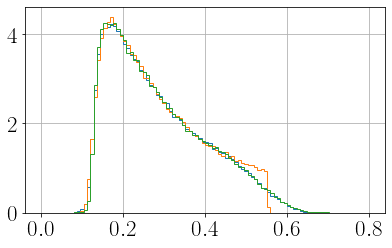

In [2049]:
dvcsSimInbCD.t2.hist(bins = np.linspace(0, 0.8, 101), density = True, histtype = 'step')
dvcsSimInbCD.t1.hist(bins = np.linspace(0, 0.8, 101), density = True, histtype = 'step')
dvcsSimInbCD.Gent2.hist(bins = np.linspace(0, 0.8, 101), density = True, histtype = 'step')

<AxesSubplot:>

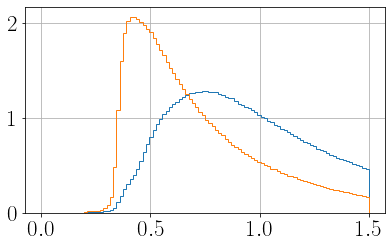

In [2046]:
bkgSimInb.Pp.hist(bins = np.linspace(0, 1.5, 101), density = True, histtype = 'step')
dvcsSimInb.Pp.hist(bins = np.linspace(0, 1.5, 101), density = True, histtype = 'step')


## test π0 simulation to data matching

In [125]:
parent_MC = "/Volumes/Extreme SSD/nov2021/convPkl_overlapped/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/nov2021/convPkl_overlapped/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/nov2021/convPkl_overlapped/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/nov2021/convPkl_overlapped/exp/"

df_4076_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4076.pkl")
exp_2g_corr = pd.read_pickle(parent_exp + "pi0_onesided.pkl")
# exp_2g_corr2 = pd.read_pickle(parent_exp + "pi0_onesided2.pkl")

In [126]:
pi0ExpInb = copy(exp_2g_corr)
# pi0ExpInb2 = copy(exp_2g_corr2)
pi0SimInb = copy(df_4076_2g_corr)

In [127]:
pi0ExpInbCDFT = pi0ExpInb.loc[(pi0ExpInb.Ge2>0.8)&((pi0ExpInb.Psector>7)&(pi0ExpInb.Ptheta<60))& (pi0ExpInb.Gsector>7)]
# pi0ExpInbCDFT2 = pi0ExpInb2.loc[(pi0ExpInb2.Ge2>0.8)&((pi0ExpInb2.Psector>7)&(pi0ExpInb2.Ptheta<60))& (pi0ExpInb2.Gsector>7)]
pi0SimInbCDFT = pi0SimInb.loc[(pi0SimInb.Ge2>0.8)&((pi0SimInb.Psector>7)&(pi0SimInb.Ptheta<60))& (pi0SimInb.Gsector>7)]

In [187]:
pi0ExpInbCDFT2 = pi0ExpInb.loc[(exp_2g_corr.Ge2>0.8)&((exp_2g_corr.Psector>7)&(exp_2g_corr.Ptheta<60))& (exp_2g_corr.Gsector>7)]


In [128]:
pi0ExpInbCD = pi0ExpInb.loc[(exp_2g_corr.Ge2>0.8)&((pi0ExpInb.Psector>7)&(pi0ExpInb.Ptheta<60))& (pi0ExpInb.Gsector<7)]
pi0SimInbCD = pi0SimInb.loc[(pi0SimInb.Ge2>0.8)&((pi0SimInb.Psector>7)&(pi0SimInb.Ptheta<60))& (pi0SimInb.Gsector<7)]

In [129]:
pi0ExpInbFD = pi0ExpInb.loc[(exp_2g_corr.Ge2>0.8)&(pi0ExpInb.Psector<7)& (pi0ExpInb.Gsector<7)]
pi0SimInbFD = pi0SimInb.loc[(pi0SimInb.Ge2>0.8)&(pi0SimInb.Psector<7)& (pi0SimInb.Gsector<7)]

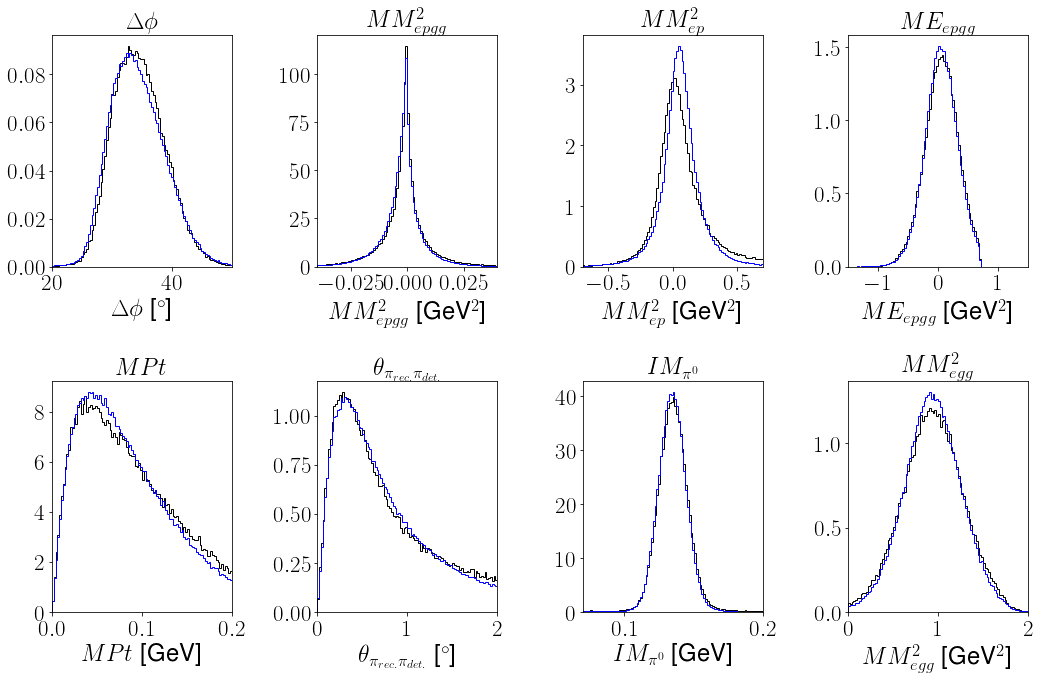

In [132]:
varstoplot = ["coneAngle1", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [20, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [50, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0ExpInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(pi0SimInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

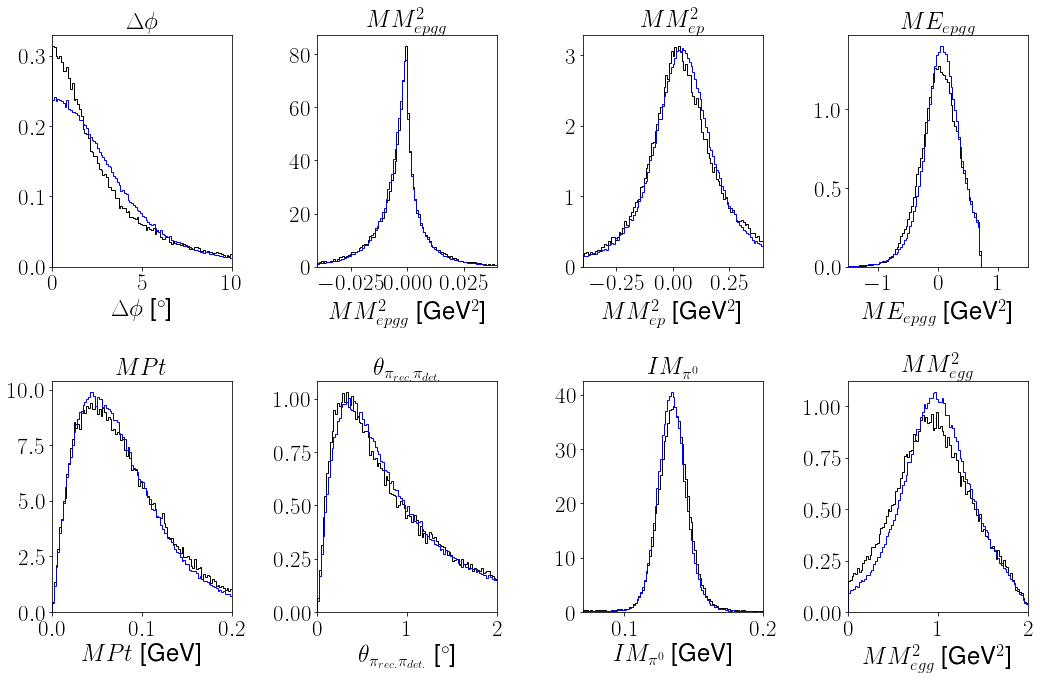

In [179]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.4, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.4, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0ExpInbCD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(pi0SimInbCD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

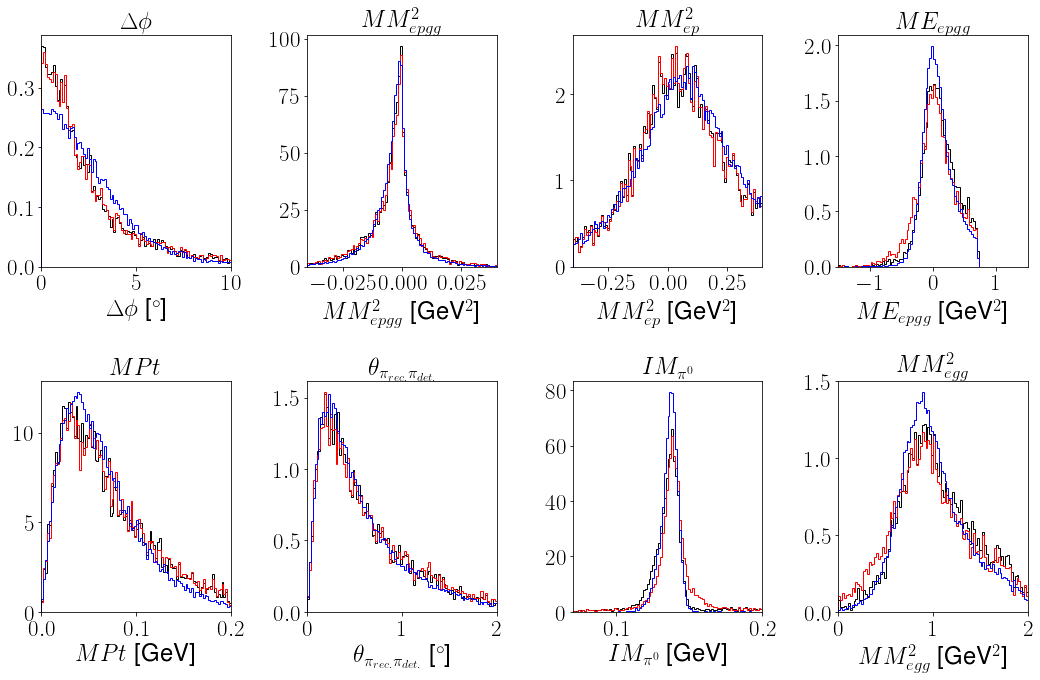

In [198]:
pi0ExpInbCDFT = pi0ExpInb.loc[(pi0ExpInb.Ge2>0.8)&((pi0ExpInb.Psector>7)&(pi0ExpInb.Ptheta<60))& (pi0ExpInb.Gsector2>7)]
pi0ExpInbCDFT2 = pi0ExpInb2.loc[(pi0ExpInb2.Ge2>0.8)&((pi0ExpInb2.Psector>7)&(pi0ExpInb2.Ptheta<60))& (pi0ExpInb2.Gsector2>7)]
pi0SimInbCDFT = pi0SimInb.loc[(pi0SimInb.Ge2>0.8)&((pi0SimInb.Psector>7)&(pi0SimInb.Ptheta<60))& (pi0SimInb.Gsector2>7)]

varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.4, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.4, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0ExpInbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(pi0ExpInbCDFT2.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='r', density=True, linewidth=1)
        axs[yind, xind].hist(pi0SimInbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [60]:
gam2 = [pi0ExpInbCDFT['Gpx2'], pi0ExpInbCDFT['Gpy2'], pi0ExpInbCDFT['Gpz2']]
gam = [pi0ExpInbCDFT['Gpx'], pi0ExpInbCDFT['Gpy'], pi0ExpInbCDFT['Gpz']]
openingAngle = angle(gam, gam2)

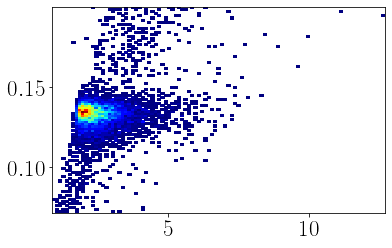

In [65]:
plt.hist2d(openingAngle, pi0ExpInbCDFT.Mpi0, bins = 101, cmin = 1, cmap = cmap)
plt.show()

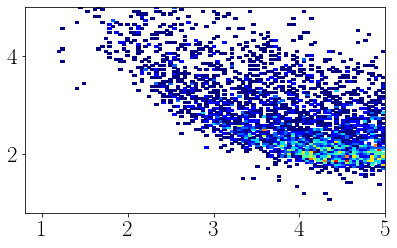

In [68]:
plt.hist2d(pi0ExpInbCDFT.Ge, openingAngle, bins = [np.linspace(0.8, 5, 101), np.linspace(0.8, 5, 101)], cmap = cmap, cmin = 1)
plt.show()

In [79]:
pi0ExpInbFTFT = pi0ExpInb.loc[(exp_2g_corr.Ge2>0.8) & (exp_2g_corr.Gsector>7)& (exp_2g_corr.Gsector2>7)]
pi0SimInbFTFT = pi0SimInb.loc[(pi0SimInb.Ge2>0.8) & (pi0SimInb.Gsector>7) & (pi0SimInb.Gsector2>7)]

In [80]:
sum(pi0ExpInbFT.Gsector2>7)

7922

<AxesSubplot:>

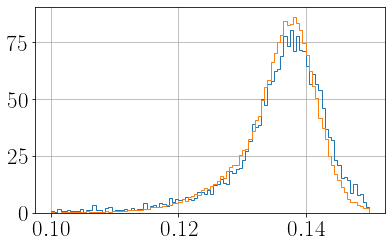

In [92]:
bins = np.linspace(0.1, 0.15, 101)
correctPi0(pi0ExpInbFT, 0.25, 0).Mpi0.hist(bins= bins, density = True, histtype = 'step')
pi0SimInbFT.Mpi0.hist(bins= bins, density = True, histtype = 'step')

In [91]:
def correctPi0(df_epgg, correction1=0, correction2 =0):
    #set up dvcs variables
    df_epgg = copy(df_epgg)

    df_epgg.loc[df_epgg.Gsector>7, 'Gp'] = df_epgg.loc[df_epgg.Gsector>7, 'Gp'] + correction1
    df_epgg.loc[:, "Gpx"] = df_epgg.loc[:, "Gp"]*np.sin(np.radians(df_epgg.loc[:, "Gtheta"]))*np.cos(np.radians(df_epgg.loc[:, "Gphi"]))
    df_epgg.loc[:, "Gpy"] = df_epgg.loc[:, "Gp"]*np.sin(np.radians(df_epgg.loc[:, "Gtheta"]))*np.sin(np.radians(df_epgg.loc[:, "Gphi"]))
    df_epgg.loc[:, "Gpz"] = df_epgg.loc[:, "Gp"]*np.cos(np.radians(df_epgg.loc[:, "Gtheta"]))
    df_epgg.loc[df_epgg.Gsector>7, 'Gp2'] = df_epgg.loc[df_epgg.Gsector>7, 'Gp2'] + correction2
    df_epgg.loc[:, "Gpx2"] = df_epgg.loc[:, "Gp2"]*np.sin(np.radians(df_epgg.loc[:, "Gtheta2"]))*np.cos(np.radians(df_epgg.loc[:, "Gphi2"]))
    df_epgg.loc[:, "Gpy2"] = df_epgg.loc[:, "Gp2"]*np.sin(np.radians(df_epgg.loc[:, "Gtheta2"]))*np.sin(np.radians(df_epgg.loc[:, "Gphi2"]))
    df_epgg.loc[:, "Gpz2"] = df_epgg.loc[:, "Gp2"]*np.cos(np.radians(df_epgg.loc[:, "Gtheta2"]))
    gam = [df_epgg['Gpx'], df_epgg['Gpy'], df_epgg['Gpz']]
    gam2 = [df_epgg['Gpx2'], df_epgg['Gpy2'], df_epgg['Gpz2']]

    df_epgg.loc[:, "openingAngle"] = angle(gam, gam2)
    df_epgg.loc[:, "Mpi0"] = pi0InvMass(gam, gam2)

    return df_epgg

In [109]:
len(pi0ExpInb.loc[(pi0ExpInb.Gsector<7)&(pi0ExpInb.Gsector2>7)])

7222

In [110]:
len(pi0ExpInb.loc[(pi0ExpInb.Gsector>7)&(pi0ExpInb.Gsector2<7)])

4068

In [111]:
len(pi0ExpInb.loc[(pi0ExpInb.Gsector>7)&(pi0ExpInb.Gsector2>7)])

29694

In [123]:
pi0ExpInb = pi0ExpInb.loc[pi0ExpInb.Ge2>0.8]
pi0SimInb = pi0SimInb.loc[pi0SimInb.Ge2>0.8]

<AxesSubplot:>

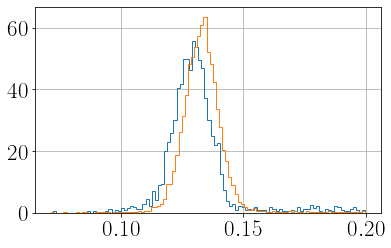

In [140]:
pi0ExpInb.loc[(pi0ExpInb.Gsector<7)&(pi0ExpInb.Gsector2>7)].Mpi0.hist(bins = 101, histtype = 'step', density = True)
pi0SimInb.loc[(pi0SimInb.Gsector<7)&(pi0SimInb.Gsector2>7)].Mpi0.hist(bins = 101, histtype = 'step', density = True)

<AxesSubplot:>

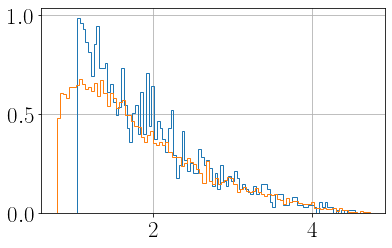

In [135]:
(pi0ExpInb.loc[(pi0ExpInb.Gsector<7)&(pi0ExpInb.Gsector2>7)].Ge2+0.25).hist(bins = 101, histtype = 'step', density = True)
pi0SimInb.loc[(pi0SimInb.Gsector<7)&(pi0SimInb.Gsector2>7)].Ge2.hist(bins = 101, histtype = 'step', density = True)

In [138]:
len(pi0ExpInb.loc[(pi0ExpInb.Gsector<7)&(pi0ExpInb.Gsector2>7)])

2185

In [139]:
len(pi0ExpInb.loc[(pi0ExpInb.Gsector>7)&(pi0ExpInb.Gsector2>7)])

8747

In [149]:
len(pi0ExpInbCDFT)

6816

## Refining π0 cuts

In [27]:
parent_epgg = "/Volumes/Extreme SSD/nov2021/convPkl_overlapped/epgg/"
epgg_4076 = pd.read_pickle(parent_epgg + "4076" + "_epgg.pkl")

In [155]:
pi0SimInb = copy(epgg_4076)

In [231]:
pi0SimInbFD = pi0SimInb.loc[(pi0SimInb.Ge2>0.8)&(pi0SimInb.Psector<7)& (pi0SimInb.Gsector<7) ]#& (pi0SimInb.coneAngle1>18.440) & (pi0SimInb.coneAngle1<44.563) & (pi0SimInb.coneAngle2 > 18.440) & (pi0SimInb.coneAngle2 < 44.563)]

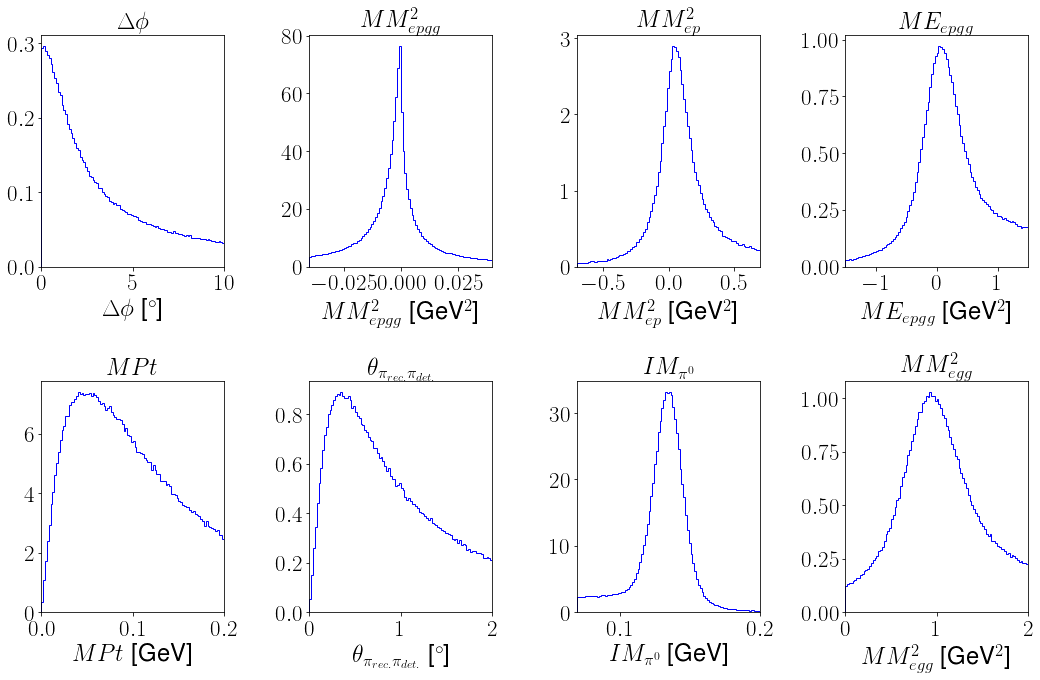

In [232]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [233]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbFD.Mpi0, bins = np.linspace(0.1, 0.2, 101))
    else:
        dist, bins = np.histogram(pi0SimInbFD.Mpi0, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.13, 0.05, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 44123.431117726 95
0.15301153035560477 109.09237166221172 95
[ 1.34572523e-01  9.62321323e-03  1.64099104e+02 -2.36336548e+03
  8.53359246e+03] 0.11874374551543317 0.15040129990017334 0.15301153035560477
0.36963904296988626 98.97692959763617 95
[ 1.34575684e-01  9.40507183e-03  1.48778179e+02 -2.10587844e+03
  7.55953239e+03] 0.1191057170745086 0.1500456500979727 0.36963904296988626
0.026169028401905936 123.53589855843514 95
0.07548231250171944 115.44632308822854 95
0.050002354879380206 118.75124683478391 95
0.07820546342096246 115.15025401521844 95
0.05330482227561206 118.25312371379584 95
0.11729835185180382 111.60537999703189 95
0.0569221954449739 117.7362779575753 95


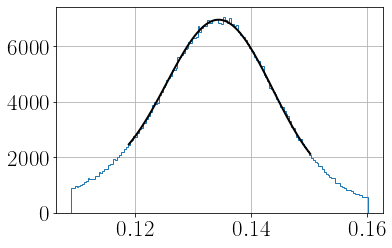

In [234]:
pi0SimInbFD.Mpi0.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [235]:
print(loc+3*scale, loc-3*scale)

0.16266037307231485 0.10649836097412525


In [236]:
pi0SimInbFD = pi0SimInbFD.loc[(pi0SimInbFD.Mpi0<0.163) & (pi0SimInbFD.Mpi0>0.106)]

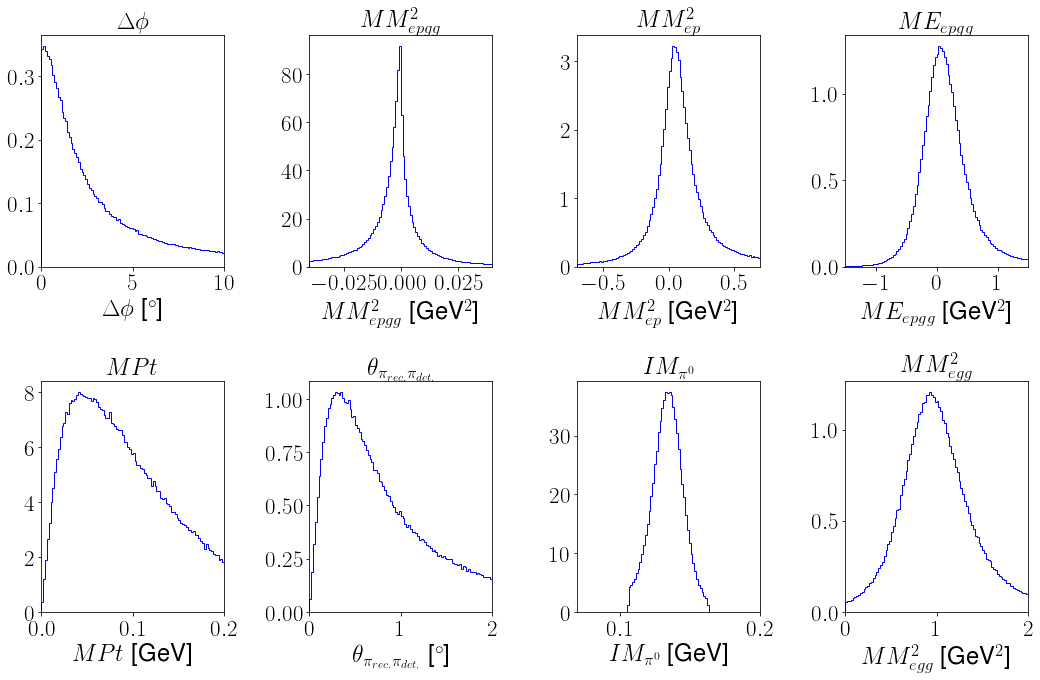

In [237]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [238]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbFD.MM2_ep, bins = np.linspace(-0.5, 0.5, 101))
    else:
        dist, bins = np.histogram(pi0SimInbFD.MM2_ep, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [1, 0.5, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 31632.279117590857 95
0.0 474.124993587769 95
0.0005063545470360697 146.9250468523662 95
[ 0.04524352  0.08144638 -0.09710172 -2.34811014 44.57890394] -0.08872384915864252 0.17921088309635574 0.0005063545470360697
0.06149486637552015 117.12065860510101 95
[ 4.45362168e-02  7.85536805e-02  2.64310239e-02 -2.64208881e+00
  5.25565047e+01] -0.08467308958018219 0.17374552309694166 0.06149486637552015
0.13878224993603383 110.03534860383255 95
[ 4.41374634e-02  7.73814794e-02  5.99590264e-02 -2.81967287e+00
  5.73747039e+01] -0.08314374375323522 0.17141867050631074 0.13878224993603383
0.19839355269774905 106.44981352735752 95
[ 4.39295348e-02  7.69382968e-02  7.67736917e-02 -2.84118779e+00
  5.90367569e+01] -0.08262270170212488 0.17048177127250758 0.19839355269774905
0.544918186330511 92.7937329161376 95
[ 4.38917969e-02  7.67947037e-02  8.56405668e-02 -2.84238569e+00
  5.94072192e+01] -0.08242424994101978 0.1702078438233715 0.544918186330511
0.272857936847397 102.87325014781176 95
0.326

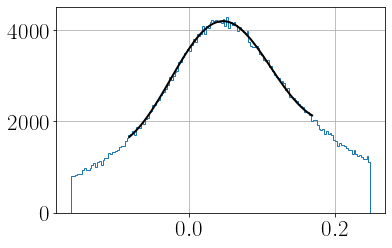

In [239]:
pi0SimInbFD.MM2_ep.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [240]:
print(loc+5*scale, loc-5*scale)

0.4276342346571393 -0.33997946127608564


In [241]:
pi0SimInbFD = pi0SimInbFD.loc[(pi0SimInbFD.MM2_ep<0.428) & (pi0SimInbFD.MM2_ep>-0.340)]

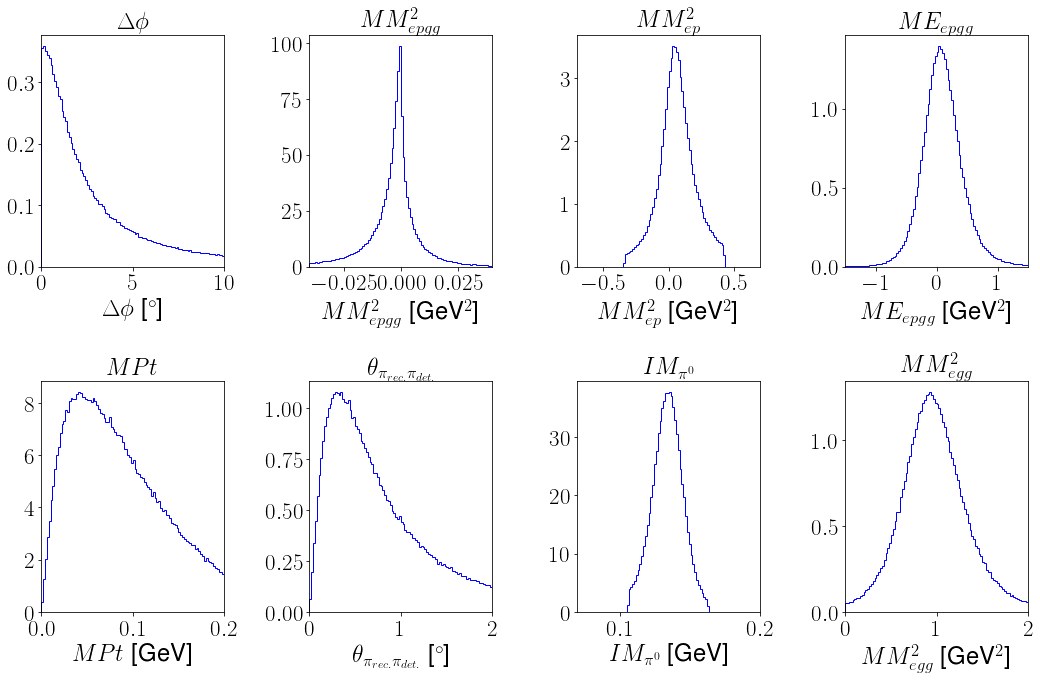

In [242]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [243]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbFD.MM2_egg, bins = np.linspace(0, 2, 101))
    else:
        dist, bins = np.histogram(pi0SimInbFD.MM2_egg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [1, 0.5, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 3752.3073060907227 95
0.007941389515004116 131.42301862834276 95
[ 0.92594041  0.27494735  0.33162992 -0.8087313   0.50007992] 0.4736922570243821 1.378188562086772 0.007941389515004116
0.20180084911038132 106.26894220676996 95
[ 0.92288028  0.26570261  0.44318293 -0.99845768  0.62606517] 0.4858383711435514 1.3599221877360712 0.20180084911038132
0.2126773616568901 105.70476550032129 95
[ 0.92151263  0.26250393  0.50821323 -1.14011192  0.71415288] 0.48973208753865033 1.3532931680662894 0.2126773616568901
0.6414568988493254 89.44701093751219 95
[ 0.92096805  0.26063512  0.56815516 -1.27933962  0.79419077] 0.4922614355452249 1.3496746641622028 0.6414568988493254
0.6501760189674566 89.13684152725044 95
[ 0.92070869  0.26011556  0.5745747  -1.29090504  0.8028372 ] 0.4928566644043595 1.3485607165382874 0.6501760189674566
0.6914044329736984 87.63809982395507 95
[ 0.92064782  0.25984601  0.58327863 -1.31014818  0.81369667] 0.4932391735696724 1.3480564692035057 0.6914044329736984
0.737145990

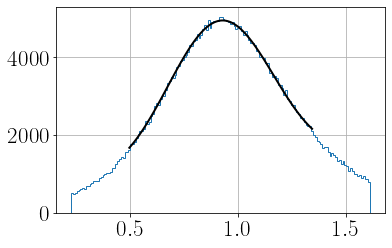

In [244]:
pi0SimInbFD.MM2_egg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [245]:
print(loc+3*scale, loc-3*scale)

1.7007114691011929 0.1408170909300266


In [246]:
pi0SimInbFD = pi0SimInbFD.loc[(pi0SimInbFD.MM2_egg<1.7) & (pi0SimInbFD.MM2_egg>0.141)]

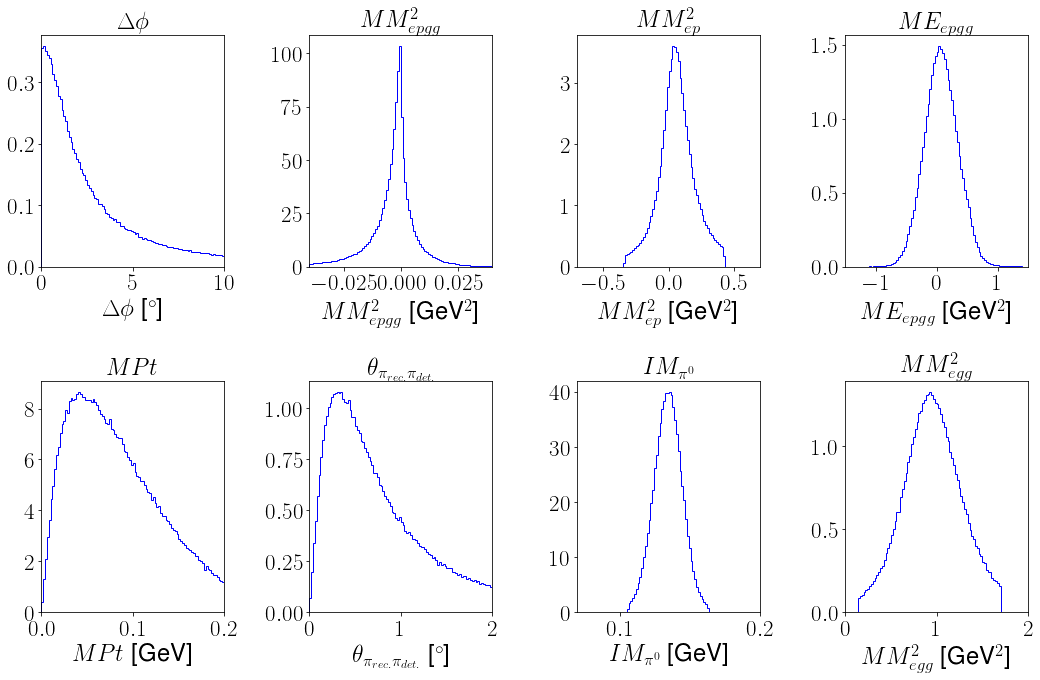

In [247]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [248]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbFD.ME_epgg, bins = np.linspace(-1, 1, 101))
    else:
        dist, bins = np.histogram(pi0SimInbFD.ME_epgg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.13, 0.05, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 1296.919475387925 95
0.22751142563060178 104.9647779755167 95
[0.05130661 0.25121934 0.05196005 0.1076621  0.33203341] -0.3619124315748674 0.4645256461293465 0.22751142563060178
0.7019549584570861 87.2441015110583 95
[0.05065435 0.24579168 0.07955393 0.11019524 0.45308234] -0.3536369891138903 0.4549456938596789 0.7019549584570861
0.646012001091653 89.285219492629 95
0.4686771927921254 95.41721499748887 95
0.4398720051671665 96.42634395003512 95
0.4377848379260163 96.5001083193087 95
0.38060296041785746 98.56770343387889 95
0.3900712564115504 98.21807965314673 95
0.386176696589841 98.36148455146275 95


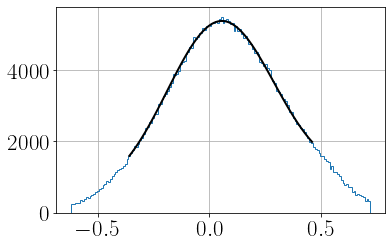

In [249]:
pi0SimInbFD.ME_epgg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [250]:
print(loc+3*scale, loc-3*scale)

0.7824707204442507 -0.6823242445626208


In [251]:
pi0SimInbFD = pi0SimInbFD.loc[(pi0SimInbFD.ME_epgg<0.782) & (pi0SimInbFD.ME_epgg>-0.682)]

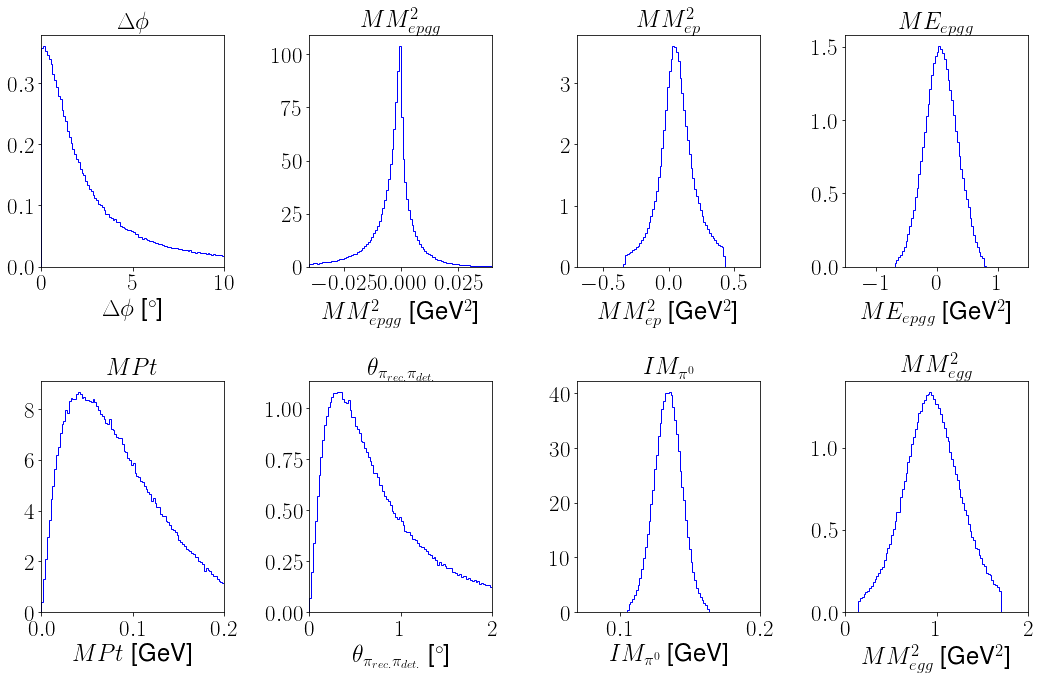

In [252]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [253]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbFD.MPt, bins = np.linspace(0.005, 0.15, 101))
        params = [1, 0, 0.03, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimInbFD.MPt, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.002
    ub = loc+3*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.4316795586247095 0.002 0.2056300367649862
[ 4.53440707e+00  4.01232409e-03  6.72059042e-02 -4.35789744e+00
  1.10273034e+02 -4.46587079e+02] 0.002 0.2056300367649862 0.4316795586247095
1.8934974513884484e-06 0.002 0.23494804764616817
0.0 0.002 0.25164347760300937
0.0 0.002 0.25993448897899857
0.0 0.002 0.26350405368385255
0.0 0.002 0.2647389480926871
0.0 0.002 0.26515170108370334
0.0 0.002 0.26533242267970286
0.0 0.002 0.26540424453027534
0.0 0.002 0.2653719938738319


In [254]:
skewnorm.ppf(0.9974, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

0.20639979696172722

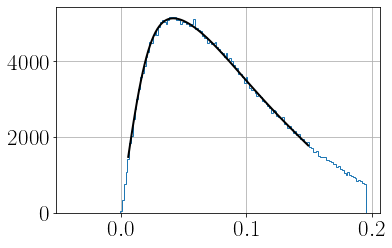

In [255]:
pi0SimInbFD.MPt.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [256]:
pi0SimInbFD = pi0SimInbFD.loc[(pi0SimInbFD.MPt<0.206)]

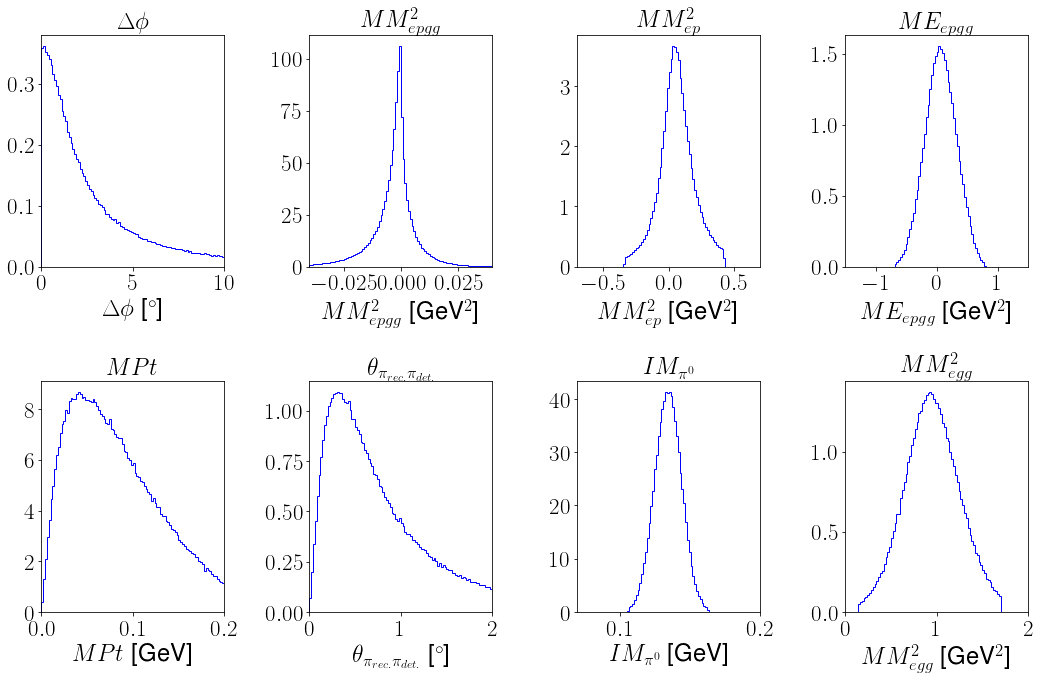

In [257]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [258]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbFD.reconPi, bins = np.linspace(0.005, 2, 101))
        params = [1, 0, 0.3, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimInbFD.reconPi, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.002
    ub = loc+3*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 0.002 1.6617602013382324
0.0009451282171407671 0.002 1.545991776010106
[ 4.28009007  0.04071753  0.50175808 -0.55946115  1.25413026 -0.49395121] 0.002 1.545991776010106 0.0009451282171407671
0.18982755230315462 0.002 1.5071960056057696
[ 4.11585749  0.03904216  0.48938462 -0.58832592  1.39845246 -0.57759786] 0.002 1.5071960056057696 0.18982755230315462
0.016326127948839142 0.002 1.4906495439804124
0.09807842642062903 0.002 1.484039621272619
0.0506420478619104 0.002 1.483835208460983
0.04235838466493391 0.002 1.4847397955111097
0.15272930134414808 0.002 1.484108417432609
0.0463723943434432 0.002 1.4843163426478614
0.059737889073768535 0.002 1.4843589009127611


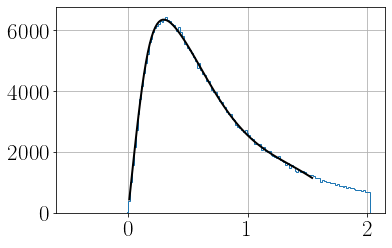

In [259]:
pi0SimInbFD.reconPi.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [260]:
skewnorm.ppf(0.9974, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

1.5128012988163444

In [261]:
pi0SimInbFD = pi0SimInbFD.loc[(pi0SimInbFD.reconPi<1.513)]

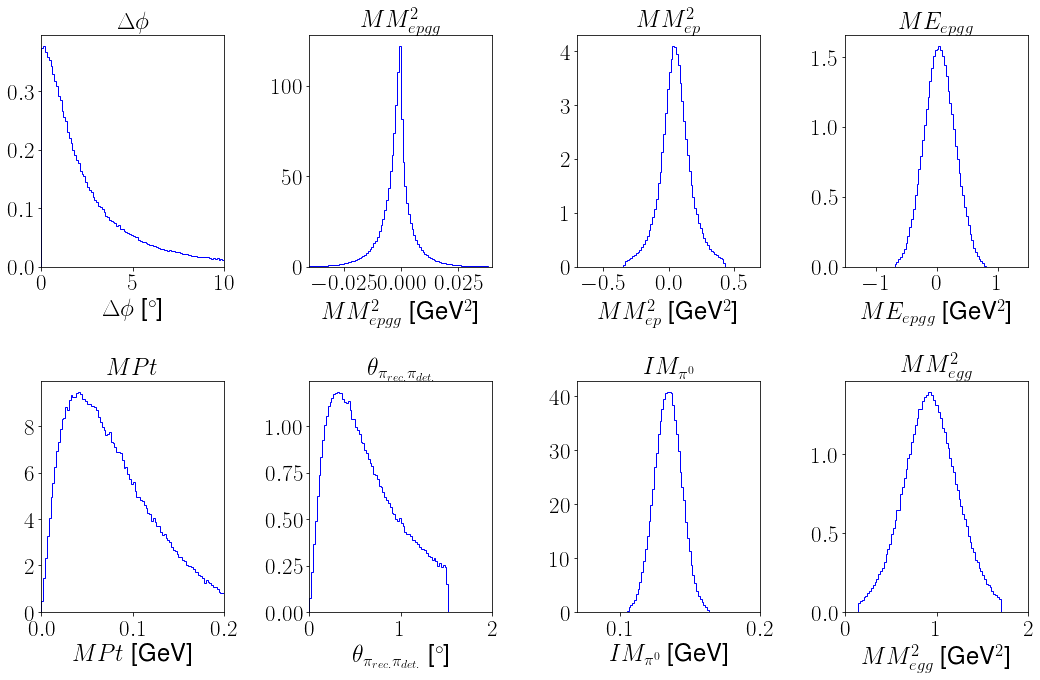

In [262]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [263]:
pi0SimInbFD.MM2_epgg.mean()+3*pi0SimInbFD.MM2_epgg.std()

0.021159355629968898

In [264]:
pi0SimInbFD.MM2_epgg.mean()-3*pi0SimInbFD.MM2_epgg.std()

-0.024878839290675792

In [265]:
pi0SimInbFD = pi0SimInbFD.loc[(pi0SimInbFD.MM2_epgg>-0.0249) & (pi0SimInbFD.MM2_epgg<0.0212)]

In [269]:
len(pi0SimInbFD)

340841

In [318]:
pi0SimInbCD = pi0SimInb.loc[(pi0SimInb.Ge2>0.8)&((pi0SimInb.Psector>7)&(pi0SimInb.Ptheta<60)) & (pi0SimInb.Gsector<7) ]# & (pi0SimInb.coneAngle1>12.780) & (pi0SimInb.coneAngle1<32.902) & (pi0SimInb.coneAngle2 > 12.780) & (pi0SimInb.coneAngle2 < 32.902)]

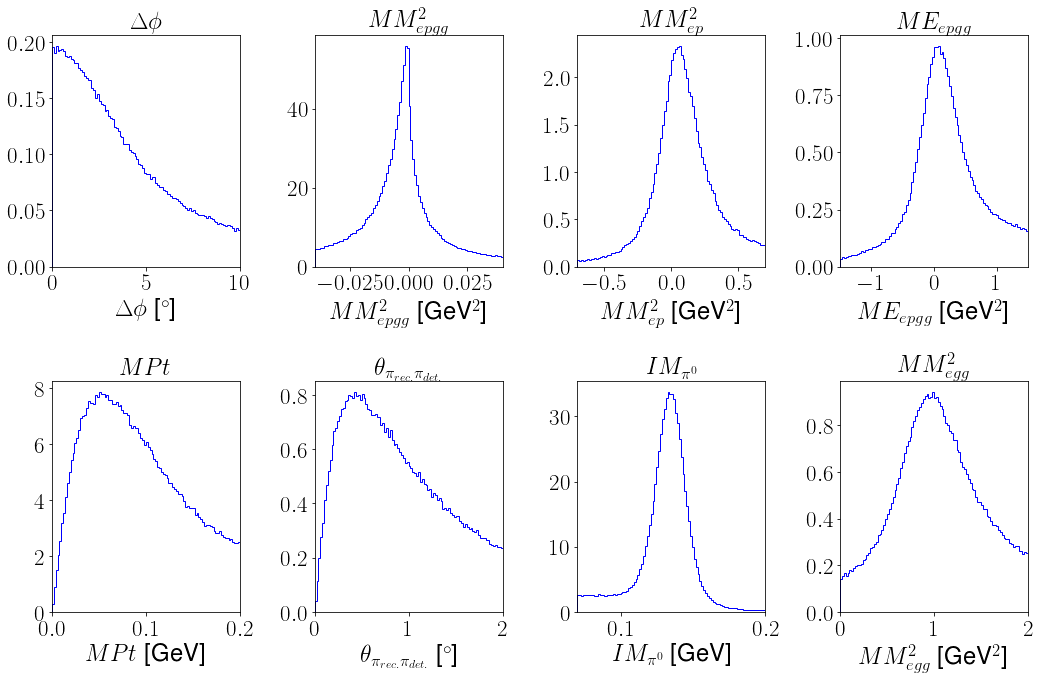

In [319]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimInbCD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [320]:
len(pi0SimInbCD)

711835

In [321]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbCD.MM2_ep, bins = np.linspace(-0.5, 0.5, 101))
    else:
        dist, bins = np.histogram(pi0SimInbCD.MM2_ep, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [1, 0.5, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 10330.228392212022 95
0.0 377.45446353106 95
3.3306690738754696e-16 252.71473396357308 95
[ 0.04746829  0.11785559 -0.05038615 -0.14913512 14.19111703] -0.14638689679710565 0.24132348467119816 3.3306690738754696e-16
4.0456527017340704e-13 229.36419075314788 95
[ 4.58964040e-02  1.14740194e-01 -2.80375549e-03 -6.37793040e-02
  1.63001274e+01] -0.14283441968719138 0.23462722762015822 4.0456527017340704e-13
1.928236792458904e-09 199.78798376956266 95
[ 0.04584576  0.11404322  0.03258503 -0.03256978 16.33582641] -0.14173863860822528 0.23343016341556047 1.928236792458904e-09
1.8959304570742574e-08 191.20969677361938 95
[ 0.04575355  0.11358075  0.03180921 -0.06898452 16.93406632] -0.14107015037201723 0.2325772539701173 1.8959304570742574e-08
2.1877466505060283e-10 207.68418449625983 95
3.3295588508508445e-11 214.33314294029333 95
1.0336176359260207e-13 233.883989266006 95
1.6323609131063677e-12 224.68428896018332 95


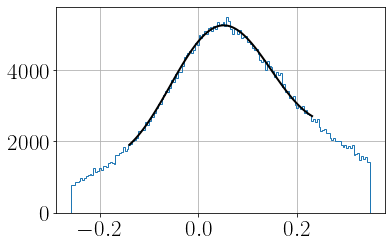

In [322]:
pi0SimInbCD.MM2_ep.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [323]:
print(loc+3*scale, loc-3*scale)

0.3852372672485799 -0.29438253290511296


In [324]:
pi0SimInbCD = pi0SimInbCD.loc[(pi0SimInbCD.MM2_ep<0.385) & (pi0SimInbCD.MM2_ep>-0.294)]

In [325]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbCD.MM2_egg, bins = np.linspace(0, 2, 101))
    else:
        dist, bins = np.histogram(pi0SimInbCD.MM2_egg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [1, 0.5, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 1447.0286631615106 95
0.00015935137333678018 152.73369348459062 95
[ 0.95086571  0.32745926  0.3801565  -1.01785134  0.6043371 ] 0.4122431480435671 1.4894882624732033 0.00015935137333678018
0.041194926428236966 120.2300776530888 95
[ 0.94663648  0.31310124  0.47668604 -1.14960249  0.6951181 ] 0.43163076869536 1.461642193935787 0.041194926428236966
0.2587358550198493 103.5005999421478 95
[ 0.94360156  0.30734511  0.54421315 -1.30007334  0.78978022] 0.4380638375857434 1.4491392863912897 0.2587358550198493
0.2942504886785591 101.95719962393296 95
[ 0.94299557  0.30537478  0.56544556 -1.33802003  0.81373984] 0.44069876167663835 1.4452923840616498 0.2942504886785591
0.5877062906115584 91.32412301619802 95
[ 0.94227918  0.30450122  0.57574101 -1.3638105   0.83105123] 0.44141924943993416 1.443139112389084 0.5877062906115584
0.46127121574118146 95.67523093551917 95
0.519311111653229 93.67098026441977 95
0.49139705216638196 94.63053074880794 95
0.28802259522467055 102.21995281363104 95


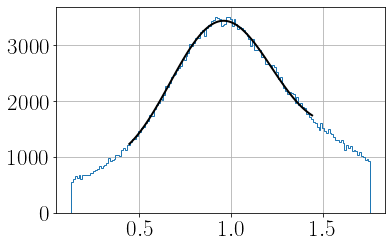

In [326]:
pi0SimInbCD.MM2_egg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [327]:
print(loc+3*scale, loc-3*scale)

1.8538361097337015 0.030692370129584146


In [328]:
pi0SimInbCD = pi0SimInbCD.loc[(pi0SimInbCD.MM2_egg<1.853) & (pi0SimInbCD.MM2_egg>0.0307)]

In [329]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbCD.ME_epgg, bins = np.linspace(-1, 1, 101))
    else:
        dist, bins = np.histogram(pi0SimInbCD.ME_epgg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.13, 0.05, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)


0.0 11349.187314132438 95
0.017030004801367404 126.4946342219161 95
[0.05614057 0.26457498 0.00682292 0.17730849 0.57465496] -0.37904655547195937 0.49132768681793637 0.017030004801367404
0.6425440309997608 89.40844551338522 95
[0.05222693 0.25455093 0.03316167 0.21448455 0.83235432] -0.36647208296779105 0.4709259465822946 0.6425440309997608
0.7915542559533342 83.62451409220596 95
[0.05154968 0.25123406 0.04556174 0.21992154 0.93362508] -0.36169356760808 0.46479292593479776 0.7915542559533342
0.707087536116808 87.05058662318865 95
0.7049550173128918 87.13114242385069 95
0.8083963918678851 82.86489648272881 95
[0.05085766 0.24914539 0.05060358 0.22629392 1.01282661] -0.3589500380925383 0.46066536096117583 0.8083963918678851
0.7180632553160686 86.63236235441487 95
0.7254678869241631 86.34656489012987 95
0.7877990838153318 83.78946008145 95


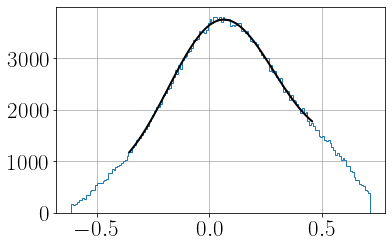

In [330]:
pi0SimInbCD.ME_epgg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [331]:
print(loc+3*scale, loc-3*scale)

0.7982744016175094 -0.6966637769819024


In [332]:
pi0SimInbCD = pi0SimInbCD.loc[(pi0SimInbCD.ME_epgg<0.798) & (pi0SimInbCD.ME_epgg>-0.697)]

In [333]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbCD.MPt, bins = np.linspace(0.005, 0.15, 101))
        params = [1, 0, 0.03, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimInbCD.MPt, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.002
    ub = loc+3*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)


0.0008578574759361413 0.002 0.2027230781305825
[ 3.20586363e+00  7.31576916e-03  6.51357697e-02 -3.95436551e+00
  1.09833421e+02 -4.88653526e+02] 0.002 0.2027230781305825 0.0008578574759361413
0.0 0.002 0.2255122584964325
0.0 0.002 0.23349299039985827
0.0 0.002 0.23595356660314712
0.0 0.002 0.23669599929879434
0.0 0.002 0.23717055290199326
0.0 0.002 0.2371586429132664
0.0 0.002 0.23716812443670796
0.0 0.002 0.2371580372389101
0.0 0.002 0.23716611734142035


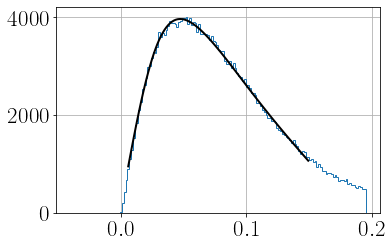

In [334]:
pi0SimInbCD.MPt.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [335]:
skewnorm.ppf(0.9974, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])


0.20346912750593618

In [336]:
pi0SimInbCD = pi0SimInbCD.loc[(pi0SimInbCD.MPt<0.203)]

In [337]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbCD.reconPi, bins = np.linspace(0.005, 2, 101))
        params = [1, 0, 0.3, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimInbCD.reconPi, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.002
    ub = loc+3*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)


3.098427477665755e-05 0.002 1.904079332211293
[ 4.23474616  0.04459929  0.61982668 -0.46694959  0.86628761 -0.28064793] 0.002 1.904079332211293 3.098427477665755e-05
3.115797943331611e-05 0.002 1.8658497694135419
[ 4.10785264  0.04270646  0.60771443 -0.4875904   0.94392388 -0.31694928] 0.002 1.8658497694135419 3.115797943331611e-05
1.4420158637729052e-05 0.002 1.8543820919681426
5.7939199501477745e-06 0.002 1.8498140469871533
0.00013240396829694578 0.002 1.8445303523610834
[ 4.02613454  0.04155375  0.6009922  -0.49835161  0.98930887 -0.33896532] 0.002 1.8445303523610834 0.00013240396829694578
0.0004686200274239827 0.002 1.842016580111157
[ 4.01952131  0.04132248  0.60023137 -0.50013099  0.99581696 -0.34213365] 0.002 1.842016580111157 0.0004686200274239827
5.9226498211106815e-05 0.002 1.8430957187376986
0.0001511415597650334 0.002 1.8431903255761233
0.0001192051618217338 0.002 1.8434888768541637
0.00019551093791825291 0.002 1.8434179287365882


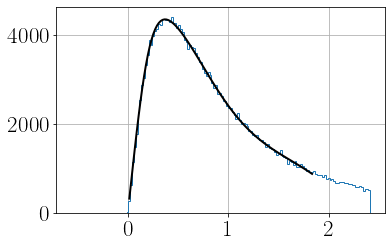

In [338]:
pi0SimInbCD.reconPi.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [339]:
skewnorm.ppf(0.9974, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

1.8488914852479368

In [340]:
pi0SimInbCD = pi0SimInbCD.loc[(pi0SimInbCD.reconPi<1.849)]

In [341]:
pi0SimInbCD.MM2_epgg.mean()+3*pi0SimInbCD.MM2_epgg.std()


0.025309637073218833

In [342]:
pi0SimInbCD.MM2_epgg.mean()-3*pi0SimInbCD.MM2_epgg.std()


-0.031887779218180215

In [343]:
pi0SimInbCD = pi0SimInbCD.loc[(pi0SimInbCD.MM2_epgg>-0.0319) & (pi0SimInbCD.MM2_epgg<0.0253)]

In [344]:
len(pi0SimInbCD)

244652

In [347]:
pi0SimInbCDFT = pi0SimInb.loc[(pi0SimInb.Ge2>0.8)&((pi0SimInb.Psector>7)&(pi0SimInb.Ptheta<60)) & (pi0SimInb.Gsector>7) ]#& (pi0SimInb.coneAngle1>12.179) & (pi0SimInb.coneAngle1<29.635) & (pi0SimInb.coneAngle2 > 12.179) & (pi0SimInb.coneAngle2 < 29.635)]

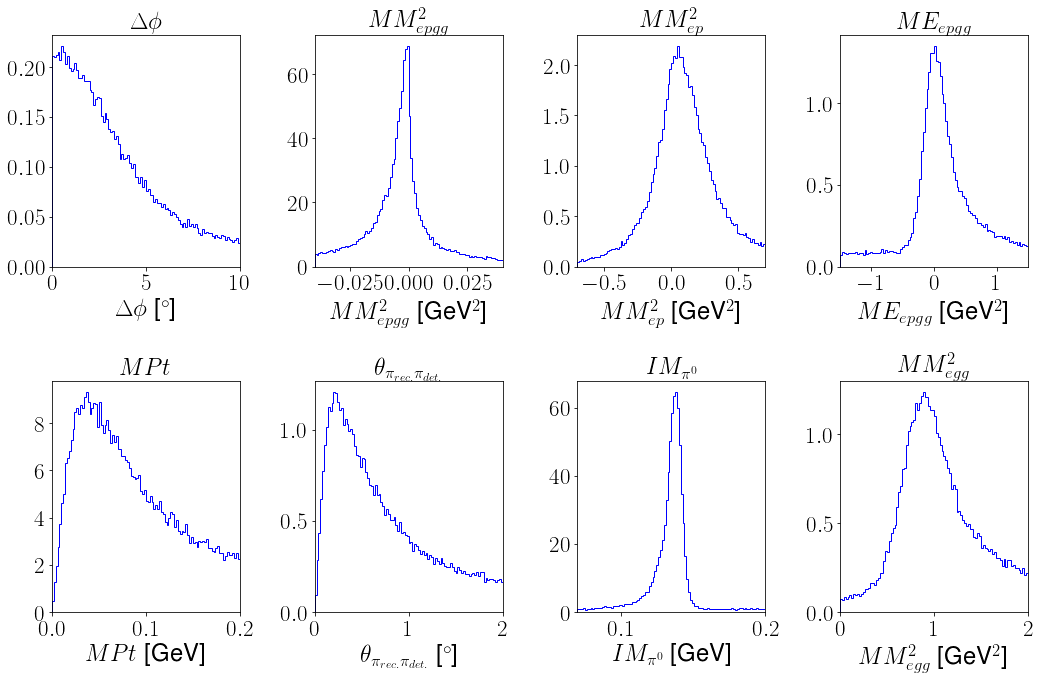

In [349]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimInbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [353]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbCDFT.Mpi0, bins = np.linspace(0.1, 0.2, 101))
    else:
        dist, bins = np.histogram(pi0SimInbCDFT.Mpi0, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.13, 0.05, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.97, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 15584.503703501918 95
9.757140650989982e-10 202.2857815538094 95
[ 1.37629993e-01  4.68537165e-03  1.67047968e+03 -2.36048621e+04
  8.30832543e+04] 0.12800741616896558 0.1464422101322292 9.757140650989982e-10
0.4371806012388605 96.52148150970484 95
[ 1.37767808e-01  4.36598217e-03  2.55030604e+03 -3.60222440e+04
  1.26984717e+05] 0.12880117641362046 0.14597931891613194 0.4371806012388605
0.11013727557109398 112.17712582816864 95
0.19026832069749855 106.8897063681629 95
0.5220335586869971 93.57764667155759 95
[ 1.37830036e-01  4.26048313e-03  2.96198868e+03 -4.17799748e+04
  1.47155977e+05] 0.12908007367569838 0.1458431257063923 0.5220335586869971
0.2507836776384774 103.86278056660163 95
0.18600365485147674 107.12570051013061 95
0.3142543143868679 101.13281557808229 95
0.21743234429959657 105.4640463637072 95


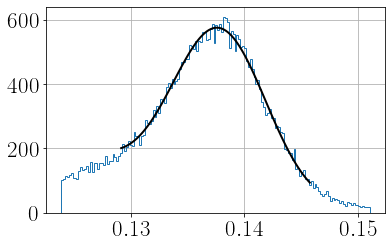

In [354]:
pi0SimInbCDFT.Mpi0.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [355]:
print(loc+5*scale, loc-5*scale)

0.15907920174092363 0.11658495440328978


In [356]:
pi0SimInbCDFT = pi0SimInbCDFT.loc[(pi0SimInbCDFT.Mpi0<0.159) & (pi0SimInbCDFT.Mpi0>0.117)]

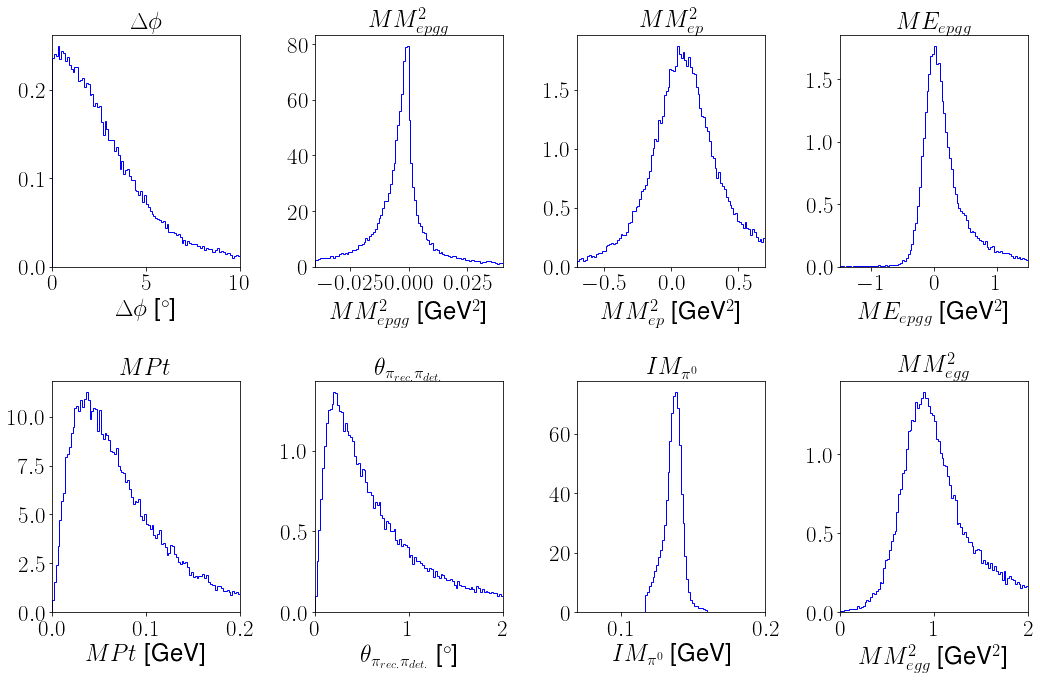

In [357]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimInbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()


In [361]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbCDFT.MM2_ep, bins = np.linspace(-0.5, 0.5, 101))
    else:
        dist, bins = np.histogram(pi0SimInbCDFT.MM2_ep, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [1, 0.5, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0003474271004693108 148.85296124442115 95
[ 0.07513489  0.20099891 -0.08436277  0.02038783  1.24486066] -0.337666400793256 0.4879361833697784 0.0003474271004693108
0.050406315185909545 118.68886061336154 95
[ 0.07788415  0.19047252 -0.07797869 -0.14998516  2.01552157] -0.31329858190611104 0.46906688924583195 0.050406315185909545
0.6294193710683641 89.87214642759515 95
[ 0.07847111  0.18684518 -0.07170668 -0.21844718  2.36721086] -0.3052619679346786 0.46220418790674617 0.6294193710683641
0.36994820363119874 98.9653222282635 95
0.55825017134126 92.3368959135249 95
0.8443185746247632 81.1111628700352 95
[ 0.07909724  0.18485408 -0.06714279 -0.27127478  2.59097883] -0.3005466308911552 0.458741106982005 0.8443185746247632
0.8220801330491984 82.22076860292921 95
0.746060600465531 85.53429667659152 95
0.8665889662354453 79.90116822235198 95
[ 0.07882237  0.18444076 -0.07013427 -0.27371926  2.66090303] -0.2999726398379166 0.4576173768691496 0.8665889662354453
0.8400836435476252 81.3292349780

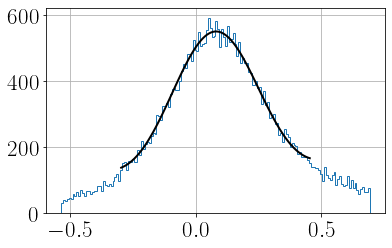

In [362]:
pi0SimInbCDFT.MM2_ep.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [363]:
print(loc+5*scale, loc-5*scale)

1.00058550065619 -0.8431189589172929


In [364]:
pi0SimInbCDFT = pi0SimInbCDFT.loc[(pi0SimInbCDFT.MM2_ep<1) & (pi0SimInbCDFT.MM2_ep>-0.843)]

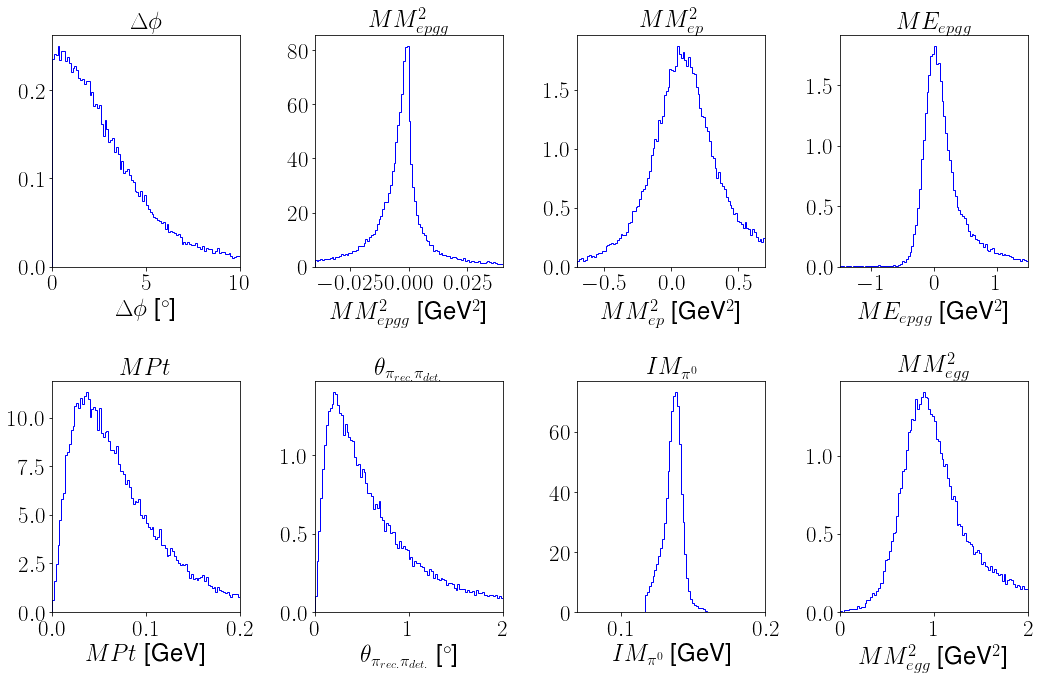

In [365]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimInbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [370]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbCDFT.MM2_egg, bins = np.linspace(0, 2, 101))
    else:
        dist, bins = np.histogram(pi0SimInbCDFT.MM2_egg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [1, 0.5, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.99, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 2209.585759328678 95
6.615924016695196e-05 156.95601804072584 95
[ 0.87016803  0.25646631 -0.3883329   0.30964682  0.10676988] 0.44831848533248025 1.4667978926325342 6.615924016695196e-05
0.14641581025581796 109.52113705772838 95
[ 0.87339156  0.24430479 -0.09301836 -0.32901371  0.45415861] 0.4715459448839147 1.4417294811619012 0.14641581025581796
0.12297801966435518 111.17055876646819 95
0.20203642052074777 106.25651268324962 95
[ 0.87019387  0.24227561 -0.18429962 -0.12495604  0.37048681] 0.47168596590689565 1.433811213169117 0.20203642052074777
0.13456208763121968 110.32863081344045 95
0.11969491976079127 111.41999717085756 95
0.09510457244817616 113.47784934468653 95
0.06871573214922999 116.22139259197948 95
0.04456564572392396 119.63509885498578 95


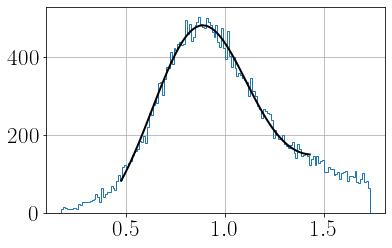

In [371]:
pi0SimInbCDFT.MM2_egg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [372]:
print(loc+5*scale, loc-5*scale)


2.0774505106513876 -0.33602743422390513


In [373]:
pi0SimInbCDFT = pi0SimInbCDFT.loc[(pi0SimInbCDFT.MM2_egg<2.077) & (pi0SimInbCDFT.MM2_egg>-0.336)]

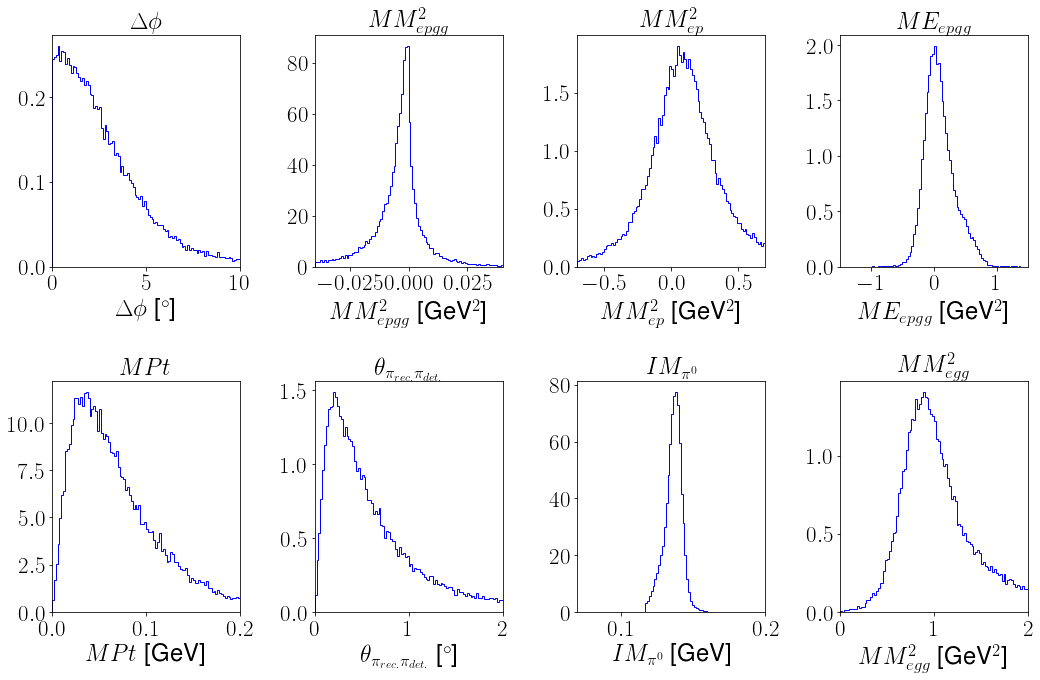

In [374]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimInbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [378]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbCDFT.ME_epgg, bins = np.linspace(-0.6, 0.6, 101))
    else:
        dist, bins = np.histogram(pi0SimInbCDFT.ME_epgg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.13, 0.05, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 551.4850811264199 95
0.002344917863890239 138.6508726256218 95
[-5.97607390e-04  1.75594873e-01 -5.19121496e-02  7.72553899e-01
  1.49767224e+00] -0.3612253858292209 0.36003017104829715 0.002344917863890239
0.09379114742104877 113.59896611541856 95
[-0.00319696  0.17180514 -0.02766539  0.89539573  1.79629911] -0.3560415842799772 0.3496476638260375 0.09379114742104877
0.12902322815650613 110.72411901237244 95
[-0.00446547  0.17097281 -0.01934284  0.95223323  1.87200733] -0.35560067981924137 0.3466697458080499 0.12902322815650613
0.03541847896708006 121.35388892241448 95
0.02193440752473974 124.76990641718571 95
0.07675132690674347 115.30729667254967 95
0.06043445310233764 117.25995799550635 95
0.06139338973301389 117.13390264531922 95
0.04294412992927765 119.91636358094888 95


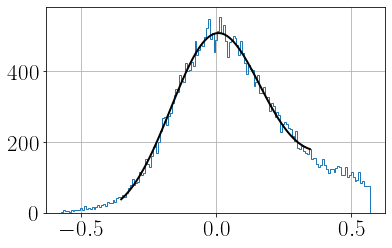

In [379]:
pi0SimInbCDFT.ME_epgg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [380]:
print(loc+5*scale, loc-5*scale)

0.8487305473678809 -0.8579728762848263


In [381]:
pi0SimInbCDFT = pi0SimInbCDFT.loc[(pi0SimInbCDFT.ME_epgg<0.849) & (pi0SimInbCDFT.ME_epgg>-0.858)]

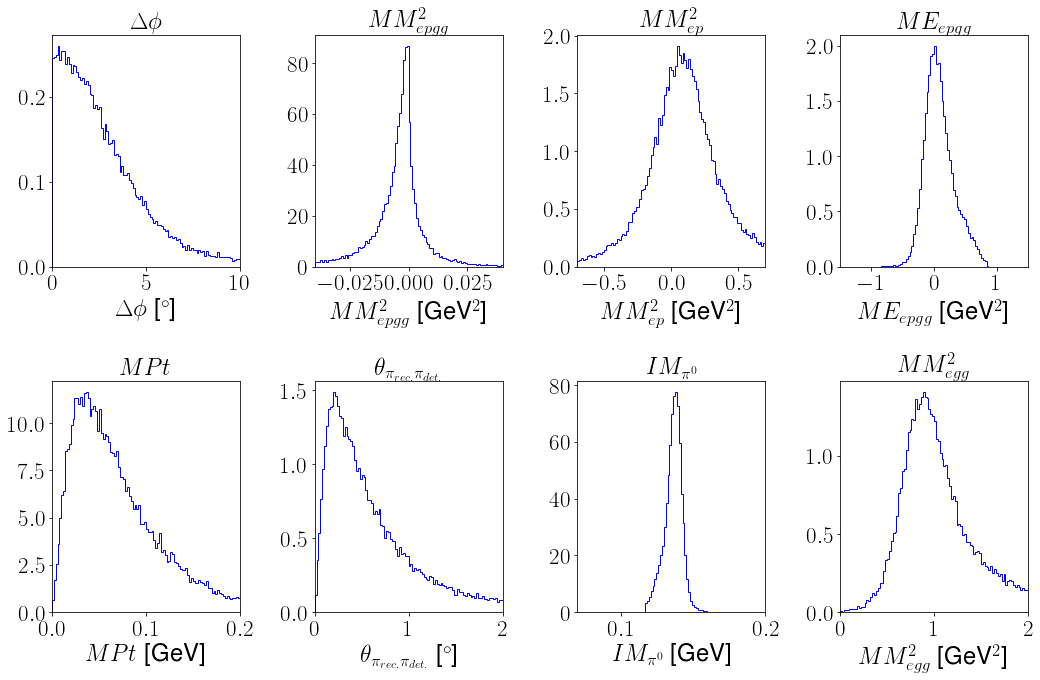

In [382]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimInbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [383]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbCDFT.MPt, bins = np.linspace(0.005, 0.15, 101))
        params = [1, 0, 0.03, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimInbCDFT.MPt, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.002
    ub = loc+3*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)


0.30354641106619495 0.002 0.15765497760194952
[ 3.88335444e+00  6.74994203e-03  5.03016785e-02 -4.86332292e+00
  1.21576189e+02 -5.24099962e+02] 0.002 0.15765497760194952 0.30354641106619495
0.027084955686550227 0.002 0.15990953190737808
0.05176206014406226 0.002 0.16104837122469662
0.20884830310560165 0.002 0.16214786392129418
0.32684913387588477 0.002 0.16270541672328942
[ 4.06716327e+00  7.02929706e-03  5.18920399e-02 -4.42634953e+00
  1.02996163e+02 -4.20848138e+02] 0.002 0.16270541672328942 0.32684913387588477
0.1382780119596454 0.002 0.16340827147131795
0.14219812623147865 0.002 0.16290487870750037
0.1231051971766065 0.002 0.16336914992244053
0.16007012237809515 0.002 0.16293010086314436
0.1330194554185713 0.002 0.16323234261498556


In [384]:
skewnorm.ppf(0.999999426696856, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

0.26648949649222825

In [385]:
pi0SimInbCDFT = pi0SimInbCDFT.loc[(pi0SimInbCDFT.MPt<0.266)]

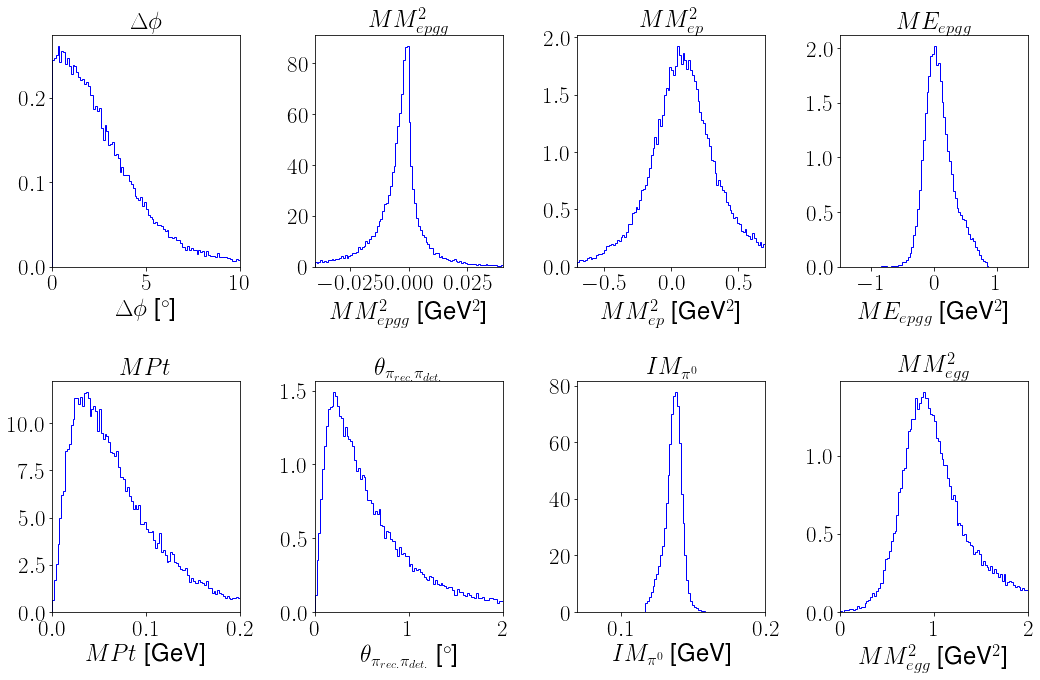

In [386]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimInbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [387]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbCDFT.reconPi, bins = np.linspace(0.005, 2, 101))
        params = [1, 0, 0.3, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimInbCDFT.reconPi, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.002
    ub = loc+3*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 0.002 1.3817722905919334
0.00520178198546406 0.002 1.1681759023013252
[ 5.03900403  0.02985214  0.37944126 -0.7543086   2.08137005 -1.0331632 ] 0.002 1.1681759023013252 0.00520178198546406
0.06579970333245688 0.002 1.059395559760044
[ 4.18587197  0.02254149  0.34561802 -0.9450313   3.05305196 -1.74443298] 0.002 1.059395559760044 0.06579970333245688
0.07164895871561316 0.002 0.9953557082402263
[ 3.73603738  0.01806521  0.3257635  -1.07514828  3.82076369 -2.3739389 ] 0.002 0.9953557082402263 0.07164895871561316
0.021786847983399582 0.002 0.988322957456081
0.0704378621816345 0.002 0.9754408789877422
0.020516301941435944 0.002 0.9690726619297411
0.058508481562530634 0.002 0.9729018592689063
0.002156813427122928 0.002 0.975839783952098
0.032061508863349464 0.002 0.9731413496957542


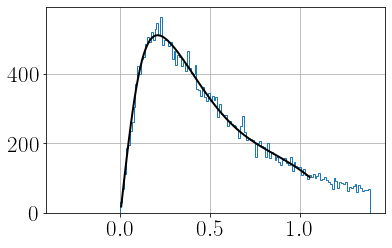

In [388]:
pi0SimInbCDFT.reconPi.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [389]:
skewnorm.ppf(0.999999426696856, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

1.6468827072112773

In [390]:
pi0SimInbCDFT = pi0SimInbCDFT.loc[(pi0SimInbCDFT.reconPi<1.647)]

In [391]:
pi0SimInbCDFT.MM2_epgg.mean()+5*pi0SimInbCDFT.MM2_epgg.std()

0.05315641219894242

In [392]:
pi0SimInbCDFT.MM2_epgg.mean()-5*pi0SimInbCDFT.MM2_epgg.std()

-0.060466989925089545

In [393]:
pi0SimInbCDFT = pi0SimInbCDFT.loc[(pi0SimInbCDFT.MM2_epgg>-0.0605) & (pi0SimInbCDFT.MM2_epgg<0.0532)]

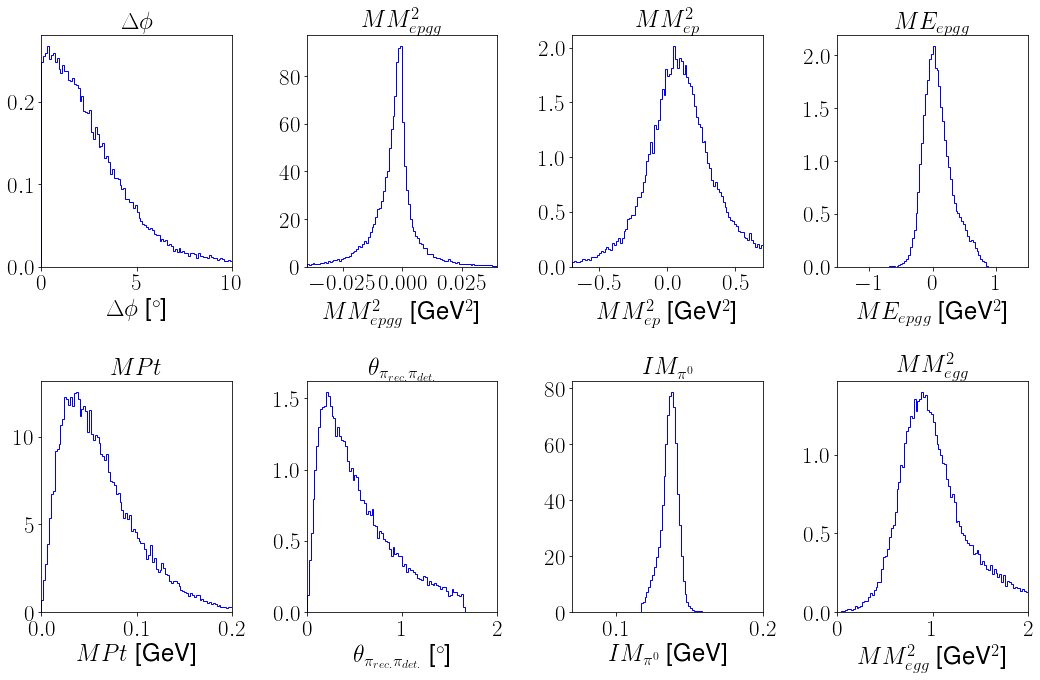

In [394]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimInbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

## DVCS overlaps

In [395]:
pi0SimInb_forDVCS = copy(pi0SimInb)

In [396]:
#common cuts
cut_xBupper = pi0SimInb_forDVCS["xB"] < 1  # xB
cut_xBlower = pi0SimInb_forDVCS["xB"] > 0  # xB
cut_Q2 = pi0SimInb_forDVCS["Q2"] > 1  # Q2
cut_W = pi0SimInb_forDVCS["W"] > 2  # W
cut_Ee = pi0SimInb_forDVCS["Ee"] > 2  # Ee
cut_Ge = pi0SimInb_forDVCS["Ge"] > 3  # Ge
cut_Esector = pi0SimInb_forDVCS["Esector"]!=pi0SimInb_forDVCS["Gsector"]
cut_Ppmax = pi0SimInb_forDVCS.Pp < 0.8  # Pp
# cut_Vz = np.abs(pi0SimInb_forDVCS["Evz"] - pi0SimInb_forDVCS["Pvz"]) < 2.5 + 2.5 / mag([pi0SimInb_forDVCS["Ppx"], pi0SimInb_forDVCS["Ppy"], pi0SimInb_forDVCS["Ppz"]])
cut_common = cut_xBupper & cut_xBlower & cut_Q2 & cut_W & cut_Ee & cut_Ge & cut_Esector & cut_Ppmax

In [397]:
pi0SimInb_forDVCS = pi0SimInb_forDVCS[cut_common]

In [398]:
cut_Pp1_CDFT = pi0SimInb_forDVCS.Pp > 0.25  # Pp
cut_Psector_CDFT = pi0SimInb_forDVCS.Psector>7
cut_Ptheta_CDFT = pi0SimInb_forDVCS.Ptheta<60
cut_Gsector_CDFT = pi0SimInb_forDVCS.Gsector>7
cut_mmep1_CDFT = pi0SimInb_forDVCS["MM2_ep"] < 0.598  # mmep
cut_mmep2_CDFT = pi0SimInb_forDVCS["MM2_ep"] > -0.526  # mmep

463265

In [399]:
cut_Pp1_CDFT = pi0SimInb_forDVCS.Pp > 0.25  # Pp
cut_Psector_CDFT = pi0SimInb_forDVCS.Psector>7
cut_Ptheta_CDFT = pi0SimInb_forDVCS.Ptheta<60
cut_Gsector_CDFT = pi0SimInb_forDVCS.Gsector>7
cut_mmep1_CDFT = pi0SimInb_forDVCS["MM2_ep"] < 0.598  # mmep
cut_mmep2_CDFT = pi0SimInb_forDVCS["MM2_ep"] > -0.526  # mmep

cut_CDFT = (cut_Pp1_CDFT & cut_Psector_CDFT & cut_Ptheta_CDFT & cut_Gsector_CDFT &
            cut_mmep1_CDFT & cut_mmep2_CDFT)

cut_Pp1_CD = pi0SimInb_forDVCS.Pp > 0.25  # Pp
cut_Psector_CD = pi0SimInb_forDVCS.Psector>7
cut_Ptheta_CD = pi0SimInb_forDVCS.Ptheta<60
cut_Gsector_CD = pi0SimInb_forDVCS.Gsector<7
cut_mmep1_CD = pi0SimInb_forDVCS["MM2_ep"] < 0.433  # mmep
cut_mmep2_CD = pi0SimInb_forDVCS["MM2_ep"] > -0.418  # mmep

cut_CD = (cut_Pp1_CD & cut_Psector_CD & cut_Ptheta_CD & cut_Gsector_CD &
            cut_mmep1_CD & cut_mmep2_CD )

cut_Pp1_FD = pi0SimInb_forDVCS.Pp > 0.35  # Pp
cut_Psector_FD = pi0SimInb_forDVCS.Psector<7
cut_Ptheta_FD = pi0SimInb_forDVCS.Ptheta>2.477
cut_Gsector_FD = pi0SimInb_forDVCS.Gsector<7
cut_mmep1_FD = pi0SimInb_forDVCS["MM2_ep"] < 0.563  # mmep
cut_mmep2_FD = pi0SimInb_forDVCS["MM2_ep"] > -0.565  # mmep

cut_FD = (cut_Pp1_FD & cut_Psector_FD & cut_Ptheta_FD & cut_Gsector_FD &
            cut_mmep1_FD & cut_mmep2_FD )

In [400]:
pi0SimInb_forDVCS.loc[:, "config" ] = 0

In [402]:
pi0SimInb_forDVCS.loc[cut_CDFT, "config"] = 3
pi0SimInb_forDVCS.loc[cut_CD, "config"] = 2
pi0SimInb_forDVCS.loc[cut_FD, "config"] = 1

In [439]:
sum(pi0SimInb_forDVCS.config==3)

31862

In [408]:
pi0SimInb_forDVCS_FD = pi0SimInb_forDVCS.loc[pi0SimInb_forDVCS.config == 1, :]

In [409]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInb_forDVCS_FD.Mpi0, bins = np.linspace(0.1, 0.2, 101))
    else:
        dist, bins = np.histogram(pi0SimInb_forDVCS_FD.Mpi0, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.13, 0.05, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 4016.00120203993 95
0.08818059427263658 114.1319468022214 95
[ 1.35625940e-01  1.12230775e-02  1.57027016e+02 -2.31657339e+03
  8.52520198e+03] 0.11716562005699908 0.15408625956139999 0.08818059427263658
0.016113889417404548 126.86495492776946 95
0.2414193373408412 104.29828143218243 95
[ 1.35412789e-01  1.07210185e-02  1.75618798e+02 -2.60129201e+03
  9.72174988e+03] 0.11777828290552195 0.15304729511636272 0.2414193373408412
0.2447688831264746 104.1413422852803 95
[ 1.35365934e-01  1.07226781e-02  1.60577795e+02 -2.38421519e+03
  8.95387739e+03] 0.11772869837539726 0.15300317034006727 0.2447688831264746
0.20434759954215298 106.13507443323016 95
0.16721261287344236 108.21247157980987 95
0.10961812820146288 112.21967313299187 95
0.07665648071322284 115.31762299765323 95
0.12007642114400052 111.39074767069638 95


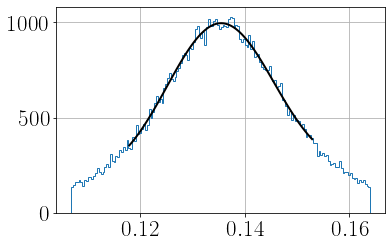

In [410]:
pi0SimInb_forDVCS_FD.Mpi0.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [412]:
print(loc+5*scale, loc-5*scale)

0.18896737717445086 0.08175845045302735


In [413]:
pi0SimInb_forDVCS_FD = pi0SimInb_forDVCS_FD.loc[(pi0SimInb_forDVCS_FD.Mpi0<0.189) & (pi0SimInb_forDVCS_FD.Mpi0>0.0818)]

In [415]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInb_forDVCS_FD.MM2_egg, bins = np.linspace(0, 2, 101))
    else:
        dist, bins = np.histogram(pi0SimInb_forDVCS_FD.MM2_egg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [1, 0.5, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 413.57477492114134 95
0.39084439122808756 98.1896767207949 95
[ 0.85692631  0.33308388  0.13785734 -0.37366124  0.27291644] 0.309052081514689 1.4048005408792372 0.39084439122808756
0.3182614753780285 100.97098915831646 95
0.25111425625929096 103.84758840759673 95
0.49264615942249246 94.58745700937803 95
[ 0.84942684  0.31643922  0.23870742 -0.57900868  0.42922479] 0.3289306365400033 1.3699230495039292 0.49264615942249246
0.45383994600922273 95.93506708455001 95
0.12071813461781045 111.34170655846319 95
0.22814809526814717 104.93371784313825 95
0.27098564637165157 102.95532246723285 95
0.2772192318067399 102.68331180579942 95


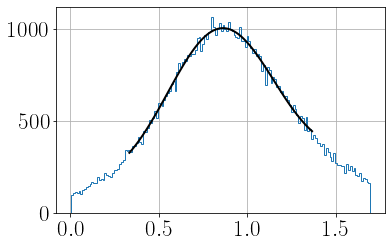

In [417]:
pi0SimInb_forDVCS_FD.MM2_egg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [418]:
print(loc+5*scale, loc-5*scale)

2.4280029228937963 -0.7304447738173111


In [419]:
pi0SimInb_forDVCS_FD = pi0SimInb_forDVCS_FD.loc[(pi0SimInb_forDVCS_FD.MM2_egg<2.43) & (pi0SimInb_forDVCS_FD.MM2_egg>-0.73)]

In [420]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInb_forDVCS_FD.ME_epgg, bins = np.linspace(-1, 1, 101))
    else:
        dist, bins = np.histogram(pi0SimInb_forDVCS_FD.ME_epgg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.13, 0.05, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 652.4712319923491 95
0.5968589341025752 91.00777827244785 95
[1.88627343e-04 2.79291244e-01 3.94753856e-02 1.58302972e-01
 2.72570744e-01] -0.459204588488604 0.4595818431744994 0.5968589341025752
0.18844805533533748 106.98998914472526 95
0.865272194374855 79.97601390139656 95
[-0.00287169  0.2696709   0.0794164   0.20386265  0.42171815] -0.4464408574315435 0.4406974683349683 0.865272194374855
0.5191820750073167 93.6754047655087 95
0.2626749833607468 103.3236403651269 95
0.460920571359699 95.6874694097059 95
0.3039739606431502 101.55290932597482 95
0.39317104149535465 98.10432967713861 95
0.4006018368589025 97.83299815341317 95


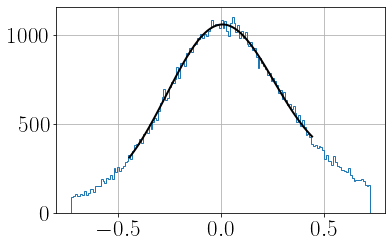

In [421]:
pi0SimInb_forDVCS_FD.ME_epgg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [422]:
print(loc+5*scale, loc-5*scale)

1.3319308259934546 -1.3427592565319475


In [423]:
pi0SimInb_forDVCS_FD = pi0SimInb_forDVCS_FD.loc[(pi0SimInb_forDVCS_FD.ME_epgg<1.332) & (pi0SimInb_forDVCS_FD.ME_epgg>-1.343)]

In [424]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInb_forDVCS_FD.MPt, bins = np.linspace(0.005, 0.15, 101))
        params = [1, 0, 0.03, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimInb_forDVCS_FD.MPt, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.002
    ub = loc+3*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)


0.06527477937579829 0.002 0.16897878919457995
[ 4.13333454e+00  4.49792048e-04  5.61763324e-02 -7.29270269e+00
  1.78117184e+02 -7.32767833e+02] 0.002 0.16897878919457995 0.06527477937579829
0.08030305340143429 0.002 0.20001629637411608
[ 5.25319312e+00  3.60154951e-03  6.54715823e-02 -4.63905570e+00
  9.51710582e+01 -3.24459411e+02] 0.002 0.20001629637411608 0.08030305340143429
0.06915281834895426 0.002 0.2043307300042295
0.09483176500938861 0.002 0.203641795208775
[ 5.24238229e+00  2.81863758e-03  6.69410525e-02 -4.91679097e+00
  9.17499241e+01 -3.03325487e+02] 0.002 0.203641795208775 0.09483176500938861
0.0007570147342089717 0.002 0.2035475063808375
0.00043515297278562404 0.002 0.2038055329622051
0.00657347975071676 0.002 0.20330435683854886
0.0013827611276797658 0.002 0.2037581077725686
0.010344082784625286 0.002 0.20324367894100862
0.0036526472132132337 0.002 0.2039428465885281


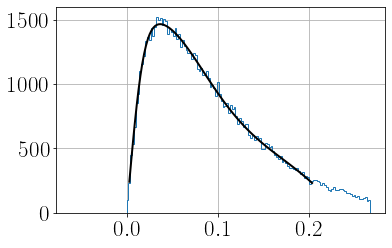

In [426]:
pi0SimInb_forDVCS_FD.MPt.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [427]:
skewnorm.ppf(0.999999426696856, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

0.33752390032929797

In [428]:
pi0SimInb_forDVCS_FD = pi0SimInb_forDVCS_FD.loc[(pi0SimInb_forDVCS_FD.MPt<0.338)]

In [430]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInb_forDVCS_FD.reconPi, bins = np.linspace(0.005, 2, 101))
        params = [1, 0, 0.3, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimInb_forDVCS_FD.reconPi, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.002
    ub = loc+3*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 0.002 1.3565704487301578
0.05695864628440073 0.002 1.2182421437654016
[ 3.86001473  0.05101579  0.38907545 -0.57002161  1.54324434 -0.72949793] 0.002 1.2182421437654016 0.05695864628440073
0.06750723917172907 0.002 1.1656344984449527
[ 3.54866854  0.04763671  0.37266593 -0.64464075  1.96313994 -1.03554551] 0.002 1.1656344984449527 0.06750723917172907
0.027104513364559435 0.002 1.1398261885450514
0.09795604835342653 0.002 1.1254519758602632
[ 3.27918853  0.04431427  0.36037923 -0.71145927  2.33833706 -1.32204714] 0.002 1.1254519758602632 0.09795604835342653
0.08265973627035694 0.002 1.1162700752425867
0.25790472183966584 0.002 1.1139205816108622
[ 3.19874609  0.04363472  0.35676196 -0.72882861  2.44647957 -1.40775707] 0.002 1.1139205816108622 0.25790472183966584
0.12533769128985006 0.002 1.1123992646195706
0.3935097450254258 0.002 1.111418101029696
[ 3.17850749  0.04340587  0.35600408 -0.73287051  2.46959111 -1.425556  ] 0.002 1.111418101029696 0.3935097450254258
0.2642435266629384 

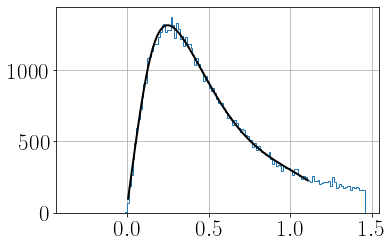

In [431]:
pi0SimInb_forDVCS_FD.reconPi.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [432]:
skewnorm.ppf(0.999999426696856, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

1.8234262535014503

In [433]:
pi0SimInb_forDVCS_FD = pi0SimInb_forDVCS_FD.loc[(pi0SimInb_forDVCS_FD.reconPi<1.823)]

In [434]:
pi0SimInb_forDVCS_FD.MM2_epgg.mean()+3*pi0SimInb_forDVCS_FD.MM2_epgg.std()


0.03604186492506594

In [435]:
pi0SimInb_forDVCS_FD.MM2_epgg.mean()-3*pi0SimInb_forDVCS_FD.MM2_epgg.std()

-0.0431681562536484

In [441]:
pi0SimInb_forDVCS_FD = pi0SimInb_forDVCS_FD.loc[(pi0SimInb_forDVCS_FD.MM2_epgg>-0.0432) & (pi0SimInb_forDVCS_FD.MM2_epgg<0.0360)]

In [442]:
len(pi0SimInb_forDVCS_FD)

81399

In [443]:
pi0SimInb_forDVCS_CD = pi0SimInb_forDVCS.loc[pi0SimInb_forDVCS.config==2]

In [444]:
pi0SimInb_forDVCS_CDFT = pi0SimInb_forDVCS.loc[pi0SimInb_forDVCS.config==3]